## Datasets & Params¶


In [1]:
# Choose alpha value between 0-1
# ALPHA = 1.0

# Choose Dataset

# Experiment 1
# DATASET_NAME ='COMPAS_RACE_AM'

# Experiment 2
#DATASET_NAME = 'COMPAS_SEX'

# Experiment 3
# DATASET_NAME = 'ADULT_RACE'

# Experiment 4
#DATASET_NAME = 'ADULT_SEX'

# Experiment 5
# DATASET_NAME='CREDIT_SEX'

# Experiment 6
# DATASET_NAME = 'BANK_AGE'

# Experiment 7
#DATASET_NAME = 'RECRUIT_AGE'

# Experiment 8
# DATASET_NAME = 'RECRUIT_SEX'

# Experiment 9
# DATASET_NAME = 'DIABETES_SEX'

# Experiment 9
# DATASET_NAME = 'NURSERY'

# Experiment 9
DATASET_NAME = 'DEFAULT_CREDIT'

In [2]:
# upload kaggle.json file using user prompt
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving default of credit card clients.csv to default of credit card clients.csv
User uploaded file "default of credit card clients.csv" with length 2897209 bytes


## Imports

In [3]:
! pip install ctgan
! pip install --upgrade category_encoders

from sklearn.preprocessing import MinMaxScaler

import time
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import category_encoders as ce
import math
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score, confusion_matrix
import os
from statistics import mean
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import StratifiedGroupKFold
from datetime import datetime
import pprint
import json



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 75.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

## Fairness metrics and functions


In [4]:
def print_metrics(y_gt, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_gt, y_pred).ravel()
    print('conf matrix:\n ', confusion_matrix(y_gt, y_pred) ,
          '\naccuracy: ', (tp+tn)/(tp+tn+fn+fp),
          'precision: ', tp/(tp+fp),
          'recall: ', tp/(tp+fn),
          'fpr: ', fp/(fp+tn),
          'tpr: ', tp /(tp + fn),
          'fn+fp', fn+fp)
    #returm fpr, tpr, accuracy
    return fp/(fp+tn), tp /(tp + fn), (tp+tn)/(tp+tn+fn+fp)

# bias metric - equal opportunity difference
def opportunity_diff_tpr(tpr1, tpr2):
    return abs(tpr1-tpr2)

# bias metric - equal opportunity difference
def opportunity_diff_fpr(fpr1, fpr2):
    return abs(fpr1-fpr2)

# bias metric - avarage absolute odds difference
def odds_diff(tpr1, tpr2, fpr1, fpr2):
    return 0.5*(abs(tpr2-tpr1) + abs(fpr2-fpr1))

# bias metric - statistical parity difference
def parity_diff(y_pred_0, y_pred_1):
    return abs(len(y_pred_0)/(len(y_pred_0)+len(y_pred_1)) - len(y_pred_1)/(len(y_pred_1)+len(y_pred_0)))


    # bias metric - Disparate impact
def disparate_impact(y_pred_0, y_pred_1):
    return 1
    #return min((len(y_pred_0)/len(y_pred_0+y_pred_1)) / (len(y_pred_1)/len(y_pred_1+len(y_pred_0)))
    #,(len(y_pred_1)/len(y_pred_0+y_pred_1)) / (len(y_pred_0)/len(y_pred_1+len(y_pred_0))))

def fairness_metrics_roc_auc_std(data , y):
    clf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=1234)

    cv = StratifiedKFold(n_splits=5, random_state=1234, shuffle=True)
    results = pd.DataFrame(columns=['training_score', 'test_score'])

    fprs, tprs, scores, op_list ,op_f_list, od_list ,par_dif_list,dis_impact_list, acc_list = [], [], [], [],[], [], [],[],[]

    start_time = datetime.now()
    for (train, test), i in zip(cv.split(data, y), range(5)):
        clf.fit(data.iloc[train], y.iloc[train])
        _, _, auc_score_train = compute_roc_auc(train,clf, data, y)
        fpr, tpr, auc_score = compute_roc_auc(test,clf, data, y)
        scores.append((auc_score_train, auc_score))
        fprs.append(fpr)
        tprs.append(tpr)
        y_pred = clf.predict(data.iloc[test])
        o_p, o_p_fpr, o_d ,par_dif, dis_impact, acc_ = calc_bias(data.iloc[test],  y.iloc[test], PRIV_FEATURE,y_pred, 'subexperiment - baseline Ensemble'+' model:'+str(i))
        acc_list.append(acc_)
        op_list.append(o_p)
        op_f_list.append(o_p_fpr)
        od_list.append(o_d)
        par_dif_list.append(par_dif)
        dis_impact_list.append(dis_impact)

    std_op = np.std(op_list)
    op_str = f"{mean(op_list):.3f} ± {std_op:.3f}"

    std_op_f = np.std(op_f_list)
    op_f_str = f"{mean(op_f_list):.3f} ± {std_op_f:.3f}"

    std_od = np.std(od_list)
    od_str = f"{mean(od_list):.3f} ± {std_od:.3f}"

    std_par_dif = np.std(par_dif_list)
    par_dif_str = f"{mean(par_dif_list):.3f} ± {std_par_dif:.3f}"

    std_dis_impact = np.std(dis_impact_list)
    dis_imp_str = f"{mean(dis_impact_list):.3f} ± {std_dis_impact:.3f}"


    std_acc = np.std(acc_list)
    acc_str = f"{mean(acc_list):.3f} ± {std_acc:.3f}"
    time_elapsed_baseline = datetime.now() - start_time
    plot_roc_curve(fprs, tprs);
    pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])
    print('Accaracy list : ', acc_list)
    print('equal opportunity for tpr : ', op_list)
    print('equal opportunity for fpr : ',op_f_list)
    print('odds difference list : ' , od_list)
    print('The mean accuracy is ', acc_str)
    print('The mean equal opportunity for tpr: (close to 0)', op_str)
    print('The mean equal opportunity for fpr: (close to 0)', op_f_str)
    print('The mean odds difference: (close to 0)',od_str)
    print('The mean parity difference: (close to 0)', par_dif_str)
    print('The mean disperate impact: (close to 1)',dis_imp_str)

    return acc_str, op_str, op_f_str ,od_str,par_dif_str , dis_imp_str

In [5]:
# calculate the bias of divided dataset by the privileged feature
def calc_bias(data,y, priv_feature,y_pred, experiment_text):
    data_full =  pd.concat([data, y], axis=1)
    data_full['y_pred'] = y_pred

    label = TARGET_COL
    # print('performance for whole ds:'+ experiment_text)
    fpr, tpr, acc = print_metrics(data_full[TARGET_COL], data_full['y_pred'] )

    feature_cat_list = list(data[priv_feature].unique())
    #print(feature_cat_list)
    valid_cat0 = data_full[data_full[priv_feature]==feature_cat_list[0]]
    valid_cat1 = data_full[data_full[priv_feature]==feature_cat_list[1]]
    # print('performance for 0 sub-group:')
    fpr_0, tpr_0 , acc_0 = print_metrics(valid_cat0[TARGET_COL], valid_cat0['y_pred'])
    # print('performance for 1 sub-group:')

    fpr_1, tpr_1, acc_1 = print_metrics(valid_cat1[TARGET_COL], valid_cat1['y_pred'])
    op_diff = opportunity_diff_tpr(tpr_0, tpr_1)
    op_diff_fpr = opportunity_diff_fpr(fpr_0, fpr_1)
    od_diff = odds_diff(tpr_0, tpr_1, fpr_0, fpr_1)
    par_diff = parity_diff(valid_cat0[valid_cat0['y_pred']==1], valid_cat1[valid_cat1['y_pred']==1])
    dis_impact = disparate_impact(valid_cat0[valid_cat0['y_pred']==1], valid_cat1[valid_cat1['y_pred']==1])
    # print('bias metrics:')
    # print('equal opportunity for tpr: (close to 0)', op_diff)
    # print('equal opportunity for fpr: (close to 0)', op_diff_fpr)
    # print('avarage absolute odds difference: (close to 0)',od_diff)
    # print('statistical parity difference: (close to 0) ',par_diff)
    # print('disparate_impact: (close to 1) ',dis_impact)


    return (op_diff,op_diff_fpr, od_diff,par_diff ,dis_impact,acc)

In [6]:
def fairness_metrics_roc_auc(data , y):
    clf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=1234)

    cv = StratifiedKFold(n_splits=5, random_state=1234, shuffle=True)
    results = pd.DataFrame(columns=['training_score', 'test_score'])

    fprs, tprs, scores, op_list ,op_f_list, od_list ,par_dif_list,dis_impact_list, acc_list = [], [], [], [],[], [], [],[],[]

    start_time = datetime.now()
    for (train, test), i in zip(cv.split(data, y), range(5)):
        clf.fit(data.iloc[train], y.iloc[train])
        _, _, auc_score_train = compute_roc_auc(train,clf, data, y)
        fpr, tpr, auc_score = compute_roc_auc(test,clf, data, y)
        scores.append((auc_score_train, auc_score))
        fprs.append(fpr)
        tprs.append(tpr)
        y_pred = clf.predict(data.iloc[test])
        o_p, o_p_fpr, o_d ,par_dif, dis_impact, acc_ = calc_bias(data.iloc[test],  y.iloc[test], PRIV_FEATURE,y_pred, 'subexperiment - baseline Ensemble'+' model:'+str(i))
        acc_list.append(acc_)
        op_list.append(o_p)
        op_f_list.append(o_p_fpr)
        od_list.append(o_d)
        par_dif_list.append(par_dif)
        dis_impact_list.append(dis_impact)

    std_op = np.std(op_list)
    op_str = f"{mean(op_list):.3f} ± {std_op:.3f}"

    std_op_f = np.std(op_f_list)
    op_f_str = f"{mean(op_f_list):.3f} ± {std_op_f:.3f}"

    std_od = np.std(od_list)
    od_str = f"{mean(od_list):.3f} ± {std_od:.3f}"

    std_par_dif = np.std(par_dif_list)
    par_dif_str = f"{mean(par_dif_list):.3f} ± {std_par_dif:.3f}"

    std_dis_impact = np.std(dis_impact_list)
    dis_imp_str = f"{mean(dis_impact_list):.3f} ± {std_dis_impact:.3f}"


    std_acc = np.std(acc_list)
    acc_str = f"{mean(acc_list):.3f} ± {std_acc:.3f}"
    time_elapsed_baseline = datetime.now() - start_time
    plot_roc_curve(fprs, tprs);
    pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])
    print('Accaracy list : ', acc_list)
    print('equal opportunity for tpr : ', op_list)
    print('equal opportunity for fpr : ',op_f_list)
    print('odds difference list : ' , od_list)
    print('The mean accuracy is ', acc_str)
    print('The mean equal opportunity for tpr: (close to 0)', op_str)
    print('The mean equal opportunity for fpr: (close to 0)', op_f_str)
    print('The mean odds difference: (close to 0)',od_str)
    print('The mean parity difference: (close to 0)', par_dif_str)
    print('The mean disperate impact: (close to 1)',dis_imp_str)

    return acc_list, op_list, op_f_list ,od_list,par_dif_list , dis_impact_list

In [7]:
def fairness_metrics_roc_auc_no_print(data , y):
    clf = RandomForestClassifier(n_estimators=10, max_depth=5,random_state=1234)

    cv = StratifiedKFold(n_splits=5, random_state=1234, shuffle=True)
    results = pd.DataFrame(columns=['training_score', 'test_score'])

    fprs, tprs, scores, op_list ,op_f_list, od_list ,par_dif_list,dis_impact_list, acc_list = [], [], [], [],[], [], [],[],[]

    start_time = datetime.now()
    for (train, test), i in zip(cv.split(data, y), range(5)):
        clf.fit(data.iloc[train], y.iloc[train])
        _, _, auc_score_train = compute_roc_auc(train,clf, data, y)
        fpr, tpr, auc_score = compute_roc_auc(test,clf, data, y)
        scores.append((auc_score_train, auc_score))
        fprs.append(fpr)
        tprs.append(tpr)
        y_pred = clf.predict(data.iloc[test])
        o_p, o_p_fpr, o_d ,par_dif, dis_impact, acc_ = calc_bias(data.iloc[test],  y.iloc[test], PRIV_FEATURE,y_pred, 'subexperiment - baseline Ensemble'+' model:'+str(i))
        acc_list.append(acc_)
        op_list.append(o_p)
        op_f_list.append(o_p_fpr)
        od_list.append(o_d)
        par_dif_list.append(par_dif)
        dis_impact_list.append(dis_impact)

    return acc_list, op_list, op_f_list ,od_list,par_dif_list , dis_impact_list

## Roc & AUC functions¶


In [8]:
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""

    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs, acc = [], []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))

    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(index,clf ,data, y):
    y_predict = clf.predict_proba(data.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

In [9]:
if DATASET_NAME == 'ADULT_SEX':
    TARGET_COL = 'income'
    PRIV_FEATURE = "sex"
    PRIV_CLASS = 1
    PRIV_VALUE_FEATURE = 1
    orig_data = pd.read_csv('/content/adult.csv')
    orig_data[TARGET_COL] = orig_data[TARGET_COL].apply(lambda x: 0 if x == '<=50K' else 1)
    orig_data['sex'] = np.where(orig_data['sex'] == 'Male', 1,0)
    orig_data.replace('?',np.nan,inplace = True)
    orig_data.dropna(how='any',inplace = True)
    orig_data.drop_duplicates()
    orig_data.reset_index(inplace=True, drop=True)

    privileged_groups = [{'sex': 1}] # Male
    unprivileged_groups = [{'sex': 0}] # Female

    feature_columns = ['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country']

    CATEGORICAL = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'native.country']


elif DATASET_NAME == 'ADULT_RACE':
    TARGET_COL = 'income'
    PRIV_FEATURE = "black"
    PRIV_CLASS = 1
    PRIV_VALUE_FEATURE = 1
    orig_data = pd.read_csv('/content/adult.csv')
    orig_data[TARGET_COL] = orig_data[TARGET_COL].apply(lambda x: 0 if x == '<=50K' else 1)
    orig_data['sex'] = np.where(orig_data['sex'] == 'Male', 1,0)
    orig_data['black'] = np.where(orig_data['race'] == 'Black', 0,1)
    orig_data.replace('?',np.nan,inplace = True)
    orig_data.dropna(how='any',inplace = True)
    orig_data.drop_duplicates()
    orig_data.reset_index(inplace=True, drop=True)

    feature_columns = ['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'black']

    CATEGORICAL = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'native.country']

elif DATASET_NAME =='COMPAS_RACE_AM':
    orig_data = pd.read_csv('/content/compas-scores-two-years_v1.csv')
    orig_data = orig_data[((orig_data['days_b_screening_arrest'] <=30) &
      (orig_data['days_b_screening_arrest'] >= -30) &
      (orig_data['is_recid'] != -1) &
      (orig_data['c_charge_degree'] != 'O') &
      (orig_data['score_text'] != 'N/A')
     )]
    TARGET_COL = 'two_year_recid'
    orig_data['sex'] = np.where(orig_data['sex'] == 'Male', 1, 0)
    orig_data['am'] = np.where(orig_data['race'] == 'African-American', 1,0)
    PRIV_FEATURE = 'am'
#     PRIV_FEATURE = 'sex'
    PRIV_CLASS = 0
    PRIV_VALUE_FEATURE = 0
    feature_columns = ['age', 'c_charge_degree', 'race', 'age_cat', 'score_text', 'sex', 'priors_count',
               'days_b_screening_arrest', 'decile_score','am']
    CATEGORICAL = [ 'age_cat', 'race', 'c_charge_degree', 'score_text']



elif DATASET_NAME =='COMPAS_SEX':
    orig_data = pd.read_csv('/content/compas-scores-two-years_v1.csv')
    orig_data = orig_data[((orig_data['days_b_screening_arrest'] <=30) &
      (orig_data['days_b_screening_arrest'] >= -30) &
      (orig_data['is_recid'] != -1) &
      (orig_data['c_charge_degree'] != 'O') &
      (orig_data['score_text'] != 'N/A')
     )]
    TARGET_COL = 'two_year_recid'
    orig_data['sex'] = np.where(orig_data['sex'] == 'Male', 1, 0)
    orig_data['am'] = np.where(orig_data['race'] == 'African-American', 1,0)
    PRIV_FEATURE = 'sex'
    PRIV_CLASS = 0
    PRIV_VALUE_FEATURE = 0
    feature_columns = ['age', 'c_charge_degree', 'race', 'age_cat', 'score_text', 'sex', 'priors_count',
               'days_b_screening_arrest', 'decile_score','am']
    CATEGORICAL = [ 'age_cat', 'race', 'c_charge_degree', 'score_text']


elif DATASET_NAME == 'CREDIT_SEX':
    orig_data = pd.read_csv('/content/german_credit_data.csv')
    TARGET_COL = 'Risk'
    PRIV_FEATURE = 'Sex'
    PRIV_CLASS = 1
    PRIV_VALUE_FEATURE = 0
    orig_data[TARGET_COL] = orig_data[TARGET_COL].apply(lambda x: 0 if x == 'bad' else 1)
    orig_data['Sex'] = np.where(orig_data['Sex'] == 'male', 0,1)
    orig_data = orig_data.drop(["Unnamed: 0"],axis=1)
    orig_data['young'] = orig_data['Age'].apply(lambda x: 0 if x < 25 else 1)
    CATEGORICAL = ['Housing', 'Saving accounts' , 'Checking account', 'Purpose']
    feature_columns = ['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account','Credit amount', 'Duration', 'Purpose']

elif DATASET_NAME =='BANK_AGE':
    orig_data = pd.read_csv('/content/bank.csv')
    TARGET_COL = 'deposit'
    orig_data[TARGET_COL] = orig_data[TARGET_COL].apply(lambda x: 0 if x == 'no' else 1)

    orig_data['age_cat'] = np.where(((pd.to_numeric(orig_data['age']) > 65) |  (pd.to_numeric(orig_data['age']) < 25)), 0,1)
    PRIV_FEATURE = 'age_cat'
    PRIV_VALUE_FEATURE = 0
    PRIV_CLASS = 1
    feature_columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'age_cat',
       'previous', 'poutcome']
    CATEGORICAL = [ 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

elif DATASET_NAME == 'RECRUIT_AGE':
    orig_data = pd.read_csv('/content/recruitmentdataset-2022-1.3.csv')
    TARGET_COL = 'decision'
    PRIV_FEATURE = 'age'
    PRIV_VALUE_FEATURE = 1
    orig_data = orig_data.drop(['Id'],axis=1)
    orig_data['age'] = np.where(((pd.to_numeric(orig_data['age']) > 32) |  (pd.to_numeric(orig_data['age']) < 25)), 0,1)


    PRIV_CLASS = 1
    orig_data['gender'] = np.where(orig_data['gender'] == 'male', 0,1)
    orig_data['decision'] = np.where(orig_data['decision'] == False, 0,1)
    CATEGORICAL = [ 'nationality', 'sport',
       'ind-debateclub', 'ind-programming_exp', 'ind-international_exp',
       'ind-entrepeneur_exp', 'ind-exact_study', 'ind-degree',
       'company']
    feature_columns = ['gender', 'age', 'nationality', 'sport', 'ind-university_grade',
       'ind-debateclub', 'ind-programming_exp', 'ind-international_exp',
       'ind-entrepeneur_exp', 'ind-languages', 'ind-exact_study', 'ind-degree',
       'company']

elif DATASET_NAME == 'RECRUIT_SEX':
    orig_data = pd.read_csv('/content/recruitmentdataset-2022-1.3.csv')
    TARGET_COL = 'decision'
    PRIV_FEATURE = 'gender'
    PRIV_VALUE_FEATURE = 0
    orig_data = orig_data.drop(['Id'],axis=1)
    orig_data['age'] = np.where(((pd.to_numeric(orig_data['age']) > 32) |  (pd.to_numeric(orig_data['age']) < 25)), 0,1)


    PRIV_CLASS = 1
    orig_data['gender'] = np.where(orig_data['gender'] == 'male', 0,1)
    orig_data['decision'] = np.where(orig_data['decision'] == False, 0,1)
    CATEGORICAL = [ 'nationality', 'sport',
       'ind-debateclub', 'ind-programming_exp', 'ind-international_exp',
       'ind-entrepeneur_exp', 'ind-exact_study', 'ind-degree',
       'company']
    feature_columns = ['gender', 'age', 'nationality', 'sport', 'ind-university_grade',
       'ind-debateclub', 'ind-programming_exp', 'ind-international_exp',
       'ind-entrepeneur_exp', 'ind-languages', 'ind-exact_study', 'ind-degree',
       'company']

elif DATASET_NAME == "DIABETES_SEX":
    orig_data = pd.read_csv('/content/diabetes_prediction_dataset.csv')
    TARGET_COL = 'diabetes'
    PRIV_FEATURE = 'gender'
    PRIV_VALUE_FEATURE = 1
    PRIV_CLASS = 0
    orig_data = orig_data[orig_data['gender'] != 'Other']
    orig_data['gender'] = np.where(orig_data['gender'] == 'Male', 0,1)

    feature_columns = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level']
    CATEGORICAL = ['hypertension', 'heart_disease', 'smoking_history']


elif DATASET_NAME == "NURSERY":
    orig_data = pd.read_csv('/content/nursery.csv')
    TARGET_COL = 'class'
    PRIV_FEATURE = 'great_pret'
    PRIV_VALUE_FEATURE = 1
    PRIV_CLASS = 0
    orig_data['class'] = np.where(orig_data['class'] == 'spec_prior', 1,0)
    orig_data['great_pret'] = np.where(orig_data['parents'] == 'great_pret', 1,0)

    feature_columns = list(orig_data.columns)
    feature_columns.remove(TARGET_COL)
    CATEGORICAL = ['has_nurs','form','children','housing','finance','social','health','parents']

elif DATASET_NAME == "DEFAULT_CREDIT":
    orig_data = pd.read_csv('/content/default of credit card clients.csv')
    TARGET_COL = 'default payment next month'
    PRIV_FEATURE = 'SEX'
    PRIV_VALUE_FEATURE = 1
    PRIV_CLASS = 0

    feature_columns = list(orig_data.columns)
    feature_columns.remove(TARGET_COL)
    CATEGORICAL = []

In [10]:
orig_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [11]:
orig_data.columns


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

## Data_Visualization

In [12]:
#Based on class
orig_data_one , orig_data_zero = [x for _, x in orig_data.groupby(orig_data[TARGET_COL] == 0)]

#Based on priv feature
orig_data_one_priv, orig_data_one_non_priv = [x for _, x in orig_data_one.groupby(orig_data_one[PRIV_FEATURE] != PRIV_VALUE_FEATURE)]
orig_data_zero_priv, orig_data_zero_non_priv = [x for _, x in orig_data_zero.groupby(orig_data_zero[PRIV_FEATURE] != PRIV_VALUE_FEATURE)]

print(orig_data_one_priv.shape,orig_data_one_non_priv.shape,orig_data_zero_priv.shape,orig_data_zero_non_priv.shape)

(2873, 25) (3763, 25) (9015, 25) (14349, 25)


In [13]:
orig_data_one_non_priv

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
21,22,120000,2,2,1,39,-1,-1,-1,-1,...,0,632,316,316,316,0,632,316,0,1
22,23,70000,2,2,2,26,2,0,0,2,...,44006,46905,46012,2007,3582,0,3601,0,1820,1
23,24,450000,2,1,1,40,-2,-2,-2,-2,...,560,0,0,19428,1473,560,0,0,1128,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29169,29170,20000,2,3,1,56,1,3,2,2,...,9376,9720,10962,0,1200,0,500,1400,0,1
29170,29171,60000,2,2,2,53,1,2,0,0,...,10226,12041,11704,0,1000,1226,2000,0,1100,1
29176,29177,240000,2,2,1,56,3,2,2,-2,...,0,0,0,0,0,0,0,0,0,1
29179,29180,500000,2,2,1,73,-2,-2,-2,-2,...,2835,8896,3850,2826,2652,2835,8896,3850,711,1


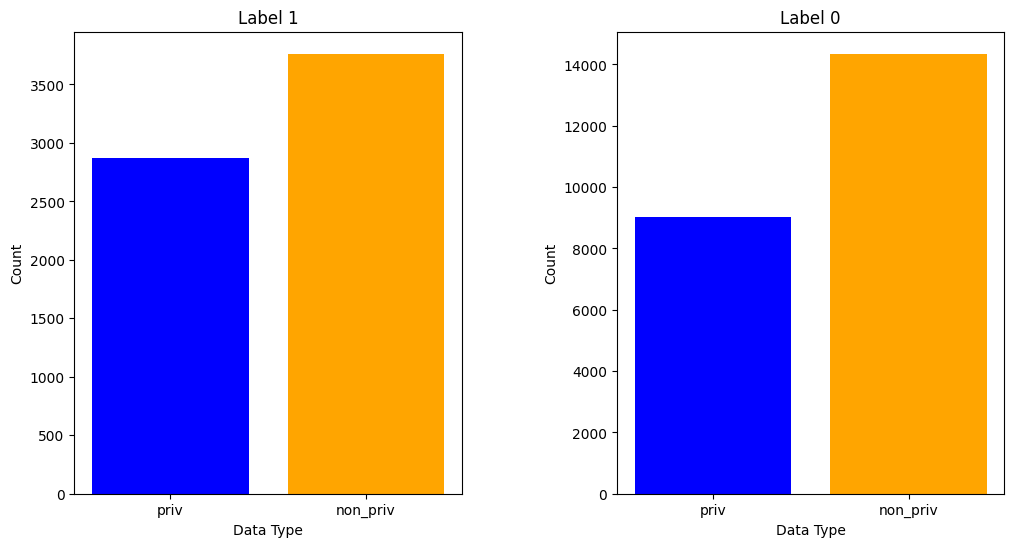

In [14]:
# Plot for orig_data_one_priv.shape[0] and orig_data_one_non_priv.shape[0]
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Bar colors
colors = ['blue', 'orange']

# Plot 1 - orig_data_one_priv and orig_data_one_non_priv
axs[0].bar(['priv', 'non_priv'], [orig_data_one_priv.shape[0], orig_data_one_non_priv.shape[0]], color=colors)
axs[0].set_xlabel('Data Type')
axs[0].set_ylabel('Count')
axs[0].set_title('Label 1')

# Plot 2 - orig_data_zero_priv and orig_data_zero_non_priv
axs[1].bar(['priv', 'non_priv'], [orig_data_zero_priv.shape[0], orig_data_zero_non_priv.shape[0]], color=colors)
axs[1].set_xlabel('Data Type')
axs[1].set_ylabel('Count')
axs[1].set_title('Label 0')


# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

plt.savefig('plot_original_ratios.jpg')


# Show the plots
plt.show()

In [15]:
orig_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [16]:
# dataset for training
orig_data.dropna(thresh=len(feature_columns)/2, inplace=True)
orig_data.reset_index(drop=True, inplace=True)

y_orig = orig_data[TARGET_COL]
# y_orig = orig_data[TARGET_COL].to_frame()

y_orig.dropna(inplace=True)

orig_data = orig_data.loc[:, feature_columns]
# data = data[feature_columns]
encoder = ce.TargetEncoder(cols=CATEGORICAL)

encoder.fit(orig_data, y_orig)
orig_data_encoded = encoder.transform(orig_data)

In [17]:
orig_dataset = pd.concat([orig_data, y_orig], axis=1)


## Acc, fairness metrics and roc & auc for original dataset

conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 1082
conf matrix:
  [[2791   98]
 [ 510  241]] 
accuracy:  0.832967032967033 precision:  0.7109144542772862 recall:  0.3209054593874834 fpr:  0.033921772239529246 tpr:  0.3209054593874834 fn+fp 608
conf matrix:
  [[1717   66]
 [ 408  169]] 
accuracy:  0.7991525423728814 precision:  0.7191489361702128 recall:  0.292894280762565 fpr:  0.03701626472237801 tpr:  0.292894280762565 fn+fp 474
conf matrix:
  [[4482  191]
 [ 923  404]] 
accuracy:  0.8143333333333334 precision:  0.6789915966386555 recall:  0.3044461190655614 fpr:  0.04087310079178258 tpr:  0.3044461190655614 fn+fp 1114
conf matrix:
  [[1716   89]
 [ 386  174]] 
accuracy:  0.7991543340380549 precision:  0.6615969581749049 recall:  0.3107142857142857 fpr:  0.049307479224376734 tpr:  0.3107142857142857 fn+fp 475
conf matrix:
  [[2766  102]
 [ 53

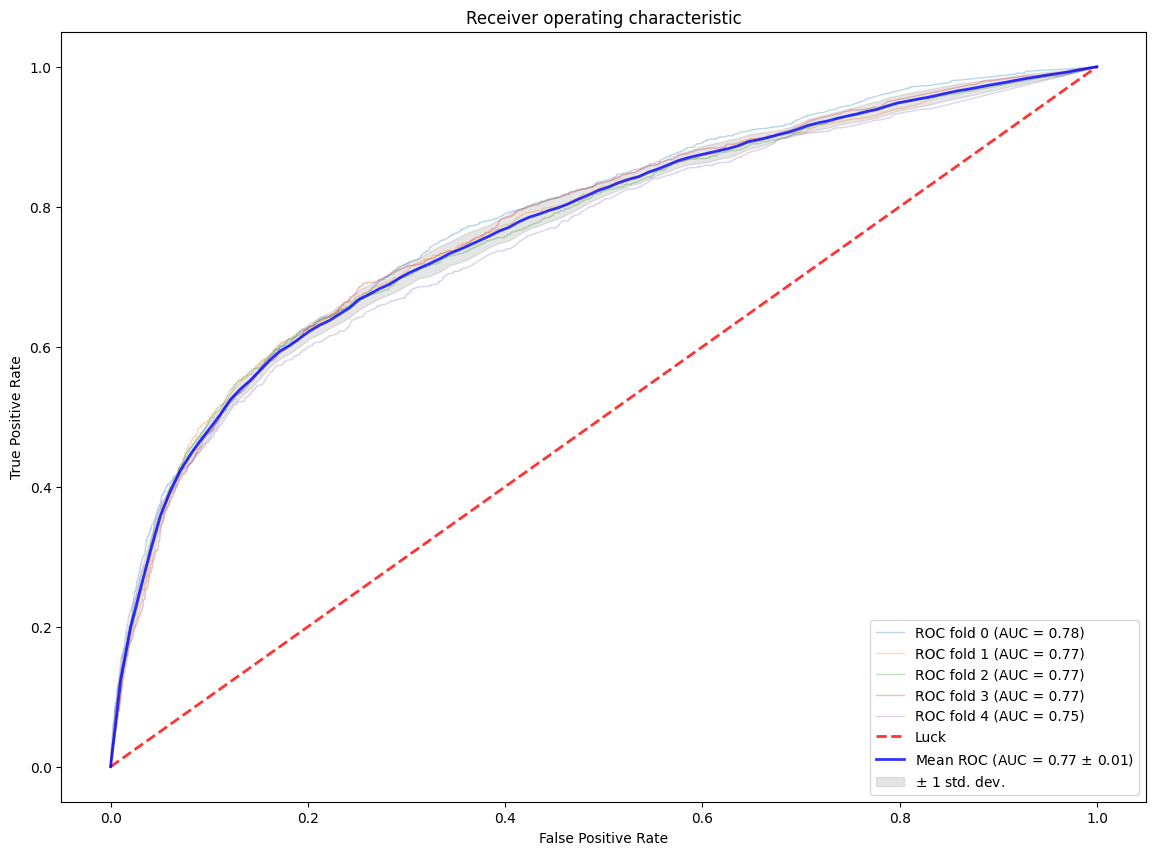

In [18]:
orig_acc ,orig_op_diff, orig_op_diff_fpr, orig_od_diff, orig_par_diff , orig_dis_impact  = fairness_metrics_roc_auc(orig_data_encoded, y_orig )

# CTGAN On Priv Target Group

In [19]:
orig_dataset[TARGET_COL] = orig_dataset[TARGET_COL].astype(int)

unprivileged_data_priv_target = orig_dataset[(orig_dataset[PRIV_FEATURE] != PRIV_VALUE_FEATURE ) & (orig_dataset[TARGET_COL] == PRIV_CLASS)]
privileged_data_priv_target = orig_dataset[(orig_dataset[PRIV_FEATURE] == PRIV_VALUE_FEATURE ) & (orig_dataset[TARGET_COL] == PRIV_CLASS)]
print(unprivileged_data_priv_target.shape[0])
print(privileged_data_priv_target.shape[0])

Accaracy list :  [0.8196666666666667, 0.8143333333333334, 0.813, 0.8103333333333333, 0.8176666666666667]
equal opportunity for tpr :  [0.028011178624918365, 0.010844663810765487, 0.045343154126798346, 0.032509783144177073, 0.0025901942645698006]
equal opportunity for fpr :  [0.003094492482848765, 0.013742625667891376, 0.011347021339599202, 0.011929758316816773, 0.009701962152741703]
odds difference list :  [0.015552835553883565, 0.012293644739328431, 0.028345087733198774, 0.022219770730496923, 0.006146078208655752]
The mean accuracy is  0.815 ± 0.003
The mean equal opportunity for tpr: (close to 0) 0.024 ± 0.015
The mean equal opportunity for fpr: (close to 0) 0.010 ± 0.004
The mean odds difference: (close to 0) 0.017 ± 0.008
The mean parity difference: (close to 0) 0.110 ± 0.049
The mean disperate impact: (close to 1) 1.000 ± 0.000
14349
9015


In [20]:
unprivileged_data_priv_target

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,11,200000,2,3,2,34,0,0,2,0,...,2513,1828,3731,2306,12,50,300,3738,66,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29178,29179,90000,2,3,2,60,-1,-1,-1,0,...,27878,27243,27799,63201,5322,26400,545,556,1274,0
29181,29182,170000,2,3,1,57,0,0,0,0,...,164366,124387,120529,7300,8000,7800,4600,5000,5100,0
29182,29183,280000,2,1,1,56,-2,-2,-2,-2,...,12492,3464,3936,4811,9957,12492,3469,3936,3845,0
29185,29186,50000,2,3,2,55,2,0,0,0,...,17087,17119,17602,1243,1267,1580,612,758,700,0


In [21]:
from ctgan import CTGAN
if unprivileged_data_priv_target.shape[0] < privileged_data_priv_target.shape[0]:
    ctgan_priv_target = CTGAN(verbose=True)
    # Fit the synthesizer to the unprivileged features
    ctgan_priv_target.fit(unprivileged_data_priv_target , CATEGORICAL, epochs = 200)
else:
    ctgan_priv_target = CTGAN(verbose=True)
    # Fit the synthesizer to the unprivileged features
    ctgan_priv_target.fit(privileged_data_priv_target , CATEGORICAL, epochs = 200)


# from ctgan import CTGAN

# if unprivileged_data_priv_target.shape[0] < privileged_data_priv_target.shape[0]:
#     ctgan_priv_target = CTGAN(verbose=True)
#     # Fit the synthesizer to the unprivileged features
#     ctgan_priv_target.fit(unprivileged_data_priv_target , CATEGORICAL, epochs = 200)


Gen. (-0.30) | Discrim. (-0.02): 100%|██████████| 200/200 [09:31<00:00,  2.86s/it]


# CTGAN On Unpriv Target Group

In [22]:
unprivileged_data_unpriv_target = orig_dataset[(orig_dataset[PRIV_FEATURE] != PRIV_VALUE_FEATURE ) & (orig_dataset[TARGET_COL] != PRIV_CLASS)]
privileged_data_unpriv_target = orig_dataset[(orig_dataset[PRIV_FEATURE] == PRIV_VALUE_FEATURE ) & (orig_dataset[TARGET_COL] != PRIV_CLASS)]

print(unprivileged_data_unpriv_target.shape[0])
print(privileged_data_unpriv_target.shape[0])
print(privileged_data_unpriv_target.shape[0]-unprivileged_data_unpriv_target.shape[0])

3763
2873
-890


In [23]:
from ctgan import CTGAN
if unprivileged_data_unpriv_target.shape[0] <= privileged_data_unpriv_target.shape[0]:
    ctgan_unpriv_target = CTGAN(verbose=True)
    # Fit the synthesizer to the unprivileged features
    ctgan_unpriv_target.fit(unprivileged_data_unpriv_target , CATEGORICAL, epochs = 200)

if unprivileged_data_unpriv_target.shape[0] > privileged_data_unpriv_target.shape[0]:
    ctgan_unpriv_target = CTGAN(verbose=True)
    # Fit the synthesizer to the unprivileged features
    ctgan_unpriv_target.fit(privileged_data_unpriv_target , CATEGORICAL, epochs = 200)


Gen. (0.50) | Discrim. (-0.50): 100%|██████████| 200/200 [02:16<00:00,  1.46it/s]


In [24]:
orig_dataset = pd.concat([orig_data_encoded, y_orig], axis=1)
orig_dataset

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [25]:
print(DATASET_NAME)

DEFAULT_CREDIT


Optuna FairUS

In [26]:
def Upsampling_Dataset(lambda_0, lambda_1):
    priv_target_samples = ctgan_priv_target.sample(math.floor(lambda_0 * (abs(privileged_data_priv_target.shape[0] - unprivileged_data_priv_target.shape[0]))))
    #print(priv_target_samples)
    # print('number of samples i added(lambda_0)', len(priv_target_samples))
    y_priv = priv_target_samples[TARGET_COL]
    priv_target_samples = priv_target_samples.loc[:, feature_columns]

    priv_target_samples = encoder.transform(priv_target_samples)
    priv_target_samples = pd.concat([priv_target_samples, y_priv], axis=1)

    unpriv_target_samples = ctgan_unpriv_target.sample(math.floor(lambda_1 * (abs(privileged_data_unpriv_target.shape[0] - unprivileged_data_unpriv_target.shape[0]))))
    # print('number of samples i added(lambda_1)', len(unpriv_target_samples))
    y_unpriv = unpriv_target_samples[TARGET_COL]
    unpriv_target_samples = unpriv_target_samples.loc[:, feature_columns]

    unpriv_target_samples = encoder.transform(unpriv_target_samples)
    unpriv_target_samples = pd.concat([unpriv_target_samples, y_unpriv], axis=1)

    if len((priv_target_samples)>0) and (len(unpriv_target_samples)==0):
        df_list = [orig_dataset, priv_target_samples]  # List of your dataframes
        upsampled_df = pd.concat(df_list)
        y_upsampled = upsampled_df[TARGET_COL]
        upsampled_df_features = upsampled_df.loc[:, feature_columns]

    if (len(unpriv_target_samples)>0) and (len(priv_target_samples)==0):
        df_list = [orig_dataset, unpriv_target_samples]  # List of your dataframes
        upsampled_df = pd.concat(df_list)
        y_debias = upsampled_df[TARGET_COL]
        upsampled_df_features = upsampled_df.loc[:, feature_columns]

    if (len(priv_target_samples)>0) and (len(unpriv_target_samples)>0):
        df_list = [orig_dataset, priv_target_samples, unpriv_target_samples]  # List of your dataframes
        upsampled_df = pd.concat(df_list)
        y_upsampled = upsampled_df[TARGET_COL]
        upsampled_df_features = upsampled_df.loc[:, feature_columns]

    if (len(priv_target_samples)==0) and (len(unpriv_target_samples)==0):
        upsampled_df = orig_dataset
        y_upsampled = upsampled_df[TARGET_COL]
        upsampled_df_features = upsampled_df.loc[:, feature_columns]

    return upsampled_df


In [27]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 5.0 MB/s eta 0:00:00


In [28]:
!pip install cmaes


In [29]:
import optuna


In [30]:
all_upsampled_acc = []
all_upsampled_op_diff = []

def FairUS_Finding_Optimal_Lambdas_Optuna(trial):

    # Initialize original Equalized odds and Accuracy Scores
    orig_acc ,orig_op_diff, orig_op_diff_fpr, orig_od_diff, orig_par_diff , orig_dis_impact = fairness_metrics_roc_auc_no_print(orig_data_encoded, y_orig)

    OrigFair_score = mean(orig_od_diff)
    OrigAcc_score = mean(orig_acc)

    # Initialize matrices to store Fairness and Accuracy results
    #Fairness_Matrix = np.zeros((num_steps, num_steps))
    #Accuracy_Matrix = np.zeros((num_steps, num_steps))

    lambda_0 =  trial.suggest_float("lambda_0", 0, 2)
    lambda_1 =  trial.suggest_float("lambda_1", 0, 2)

    upsampled_df = Upsampling_Dataset(lambda_0, lambda_1)
    y_debias = upsampled_df[TARGET_COL]
    upsampled_df_features = upsampled_df.loc[:, feature_columns]

    upsampled_acc ,upsampled_op_diff, upsampled_op_diff_fpr, upsampled_od_diff, upsampled_par_diff , upsampled_dis_impact = fairness_metrics_roc_auc_no_print(upsampled_df_features, y_debias)

    CurrFair_score = mean(upsampled_od_diff)
    CurrAcc_score = mean(upsampled_acc)
    # if ALPHA == 1:
    #   optimization_objective = CurrFair_score/mean(orig_od_diff)
    # else:
      # optimization_objective = (ALPHA*CurrFair_score/mean(orig_od_diff)) - ((1-ALPHA)*CurrAcc_score/mean(orig_acc))
    optimization_objective = (CurrFair_score/mean(orig_od_diff)) - (CurrAcc_score/mean(orig_acc))
    # optimization_objective = (CurrFair_score) - (CurrAcc_score)

    # Update fairness matrix with Equalized odds subtraction
    #Fairness_Matrix[i, j] = -(CurrFair_score - OrigFair_score)
    # Update accuracy matrix with Minos accuracy subtraction
    #Accuracy_Matrix[i, j] = (CurrAcc_score - OrigAcc_score)


    #fairness_delta = np.max(Fairness_Matrix)-np.min(Fairness_Matrix)
    #acc_delta = np.max(Accuracy_Matrix)-np.min(Accuracy_Matrix)
    #fairness_factor = acc_delta / fairness_delta
    #scaled_fairness_matrix = fairness_factor * Fairness_Matrix


    #Accuracy_Matrix = -(Accuracy_Matrix)
    #scaled_fairness_matrix= -(scaled_fairness_matrix)
    print ('lambda_0:',lambda_0)
    print ('lambda_1:',lambda_1)
    #print ('fairness matrix before scaling: ',Fairness_Matrix)
    #print ('fairness matrix after scaling: ',scaled_fairness_matrix)
    #print ('acc matrix is: ', Accuracy_Matrix)

    # Save upsampled_acc and upsampled_op_diff as trial attributes
    upsampled_acc = mean(upsampled_acc)
    upsampled_op_diff = mean(upsampled_op_diff)
    trial.set_user_attr('upsampled_acc', upsampled_acc)
    trial.set_user_attr('upsampled_op_diff', upsampled_op_diff)
    print('---------------------------------------trail upsampled_acc is : ', trial.user_attrs.get('upsampled_acc'))
    print('---------------------------------------trail upsampled_op_diff is : ', trial.user_attrs.get('upsampled_op_diff'))
    all_upsampled_acc.append(upsampled_acc)
    all_upsampled_op_diff.append(upsampled_op_diff)

    # Return optimal dataset upsampled with lambda_0, lambda_1 values
    # return optimization_objective #scaled_fairness_matrix
    return CurrFair_score, CurrAcc_score #for multi objective


In [31]:
# Record the start time
start_time = time.time()

In [32]:
CME_flag = False

if CME_flag:
  from optuna.samplers import CmaEsSampler

  # Create an instance of CmaEsSampler
  # Create an instance of CmaEsSampler with specified parameters
  cma_es_sampler = CmaEsSampler(
      sigma0=0.01,  # Initial standard deviation of the distribution.
      n_startup_trials=10,  # The number of trials before using CMA-ES.
      independent_sampler=optuna.samplers.RandomSampler(seed=0)  # Sampler used for the first `n_startup_trials`.
  )


  # Pass the instance of CmaEsSampler to create_study
  # study = optuna.create_study(sampler=cma_es_sampler, direction='minimize')
  study = optuna.create_study(sampler=tpe_sampler, directions=['minimize', 'maximize']) #

  study.optimize(FairUS_Finding_Optimal_Lambdas_Optuna, n_trials=400)
else:
  from optuna.samplers import TPESampler

  # Create an instance of TPESampler with custom parameters
  # You can adjust parameters like n_startup_trials, n_ei_candidates, etc.
  tpe_sampler = TPESampler(n_startup_trials=20, n_ei_candidates=24, multivariate=True)

  # Pass the instance of TPESampler to create_study
  # study = optuna.create_study(sampler=tpe_sampler, direction='minimize') #directions=['minimize', 'maximize']
  study = optuna.create_study(sampler=tpe_sampler, directions=['minimize', 'maximize']) #

  study.optimize(FairUS_Finding_Optimal_Lambdas_Optuna, n_trials=200)

/usr/local/lib/python3.10/dist-packages/optuna/samplers/_tpe/sampler.py:319: ExperimentalWarning: ``multivariate`` option is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2024-04-02 19:41:12,439] A new study created in memory with name: no-name-eee6e7a0-163c-481d-9ea2-a21b72d4b7ce


conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 1082
conf matrix:
  [[2791   98]
 [ 510  241]] 
accuracy:  0.832967032967033 precision:  0.7109144542772862 recall:  0.3209054593874834 fpr:  0.033921772239529246 tpr:  0.3209054593874834 fn+fp 608
conf matrix:
  [[1717   66]
 [ 408  169]] 
accuracy:  0.7991525423728814 precision:  0.7191489361702128 recall:  0.292894280762565 fpr:  0.03701626472237801 tpr:  0.292894280762565 fn+fp 474
conf matrix:
  [[4482  191]
 [ 923  404]] 
accuracy:  0.8143333333333334 precision:  0.6789915966386555 recall:  0.3044461190655614 fpr:  0.04087310079178258 tpr:  0.3044461190655614 fn+fp 1114
conf matrix:
  [[1716   89]
 [ 386  174]] 
accuracy:  0.7991543340380549 precision:  0.6615969581749049 recall:  0.3107142857142857 fpr:  0.049307479224376734 tpr:  0.3107142857142857 fn+fp 475
conf matrix:
  [[2766  102]
 [ 53

[I 2024-04-02 19:41:19,858] Trial 0 finished with values: [0.0425856866915431, 0.8368429291448285] and parameters: {'lambda_0': 1.0907672497506253, 'lambda_1': 1.0544325379494761}. 


conf matrix:
  [[5665  172]
 [1035  479]] 
accuracy:  0.8358046524282411 precision:  0.7357910906298003 recall:  0.31638044914134744 fpr:  0.02946719205071098 tpr:  0.31638044914134744 fn+fp 1207
conf matrix:
  [[2873   76]
 [ 465  275]] 
accuracy:  0.8533477907291949 precision:  0.7834757834757835 recall:  0.3716216216216216 fpr:  0.025771447948457104 tpr:  0.3716216216216216 fn+fp 541
conf matrix:
  [[2792   96]
 [ 570  204]] 
accuracy:  0.8181321682140906 precision:  0.68 recall:  0.26356589147286824 fpr:  0.0332409972299169 tpr:  0.26356589147286824 fn+fp 666
lambda_0: 1.0907672497506253
lambda_1: 1.0544325379494761
---------------------------------------trail upsampled_acc is :  0.8368429291448285
---------------------------------------trail upsampled_op_diff is :  0.0802307662167182
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 1082
conf 

[I 2024-04-02 19:41:31,171] Trial 1 finished with values: [0.06703155834449599, 0.831315198872128] and parameters: {'lambda_0': 0.8223656290553643, 'lambda_1': 1.636079582902054}. 


conf matrix:
  [[5353  197]
 [ 993  625]] 
accuracy:  0.833984375 precision:  0.7603406326034063 recall:  0.3862793572311496 fpr:  0.035495495495495494 tpr:  0.3862793572311496 fn+fp 1190
conf matrix:
  [[2796   80]
 [ 512  231]] 
accuracy:  0.8364189002486875 precision:  0.7427652733118971 recall:  0.31090174966352624 fpr:  0.027816411682892908 tpr:  0.31090174966352624 fn+fp 592
conf matrix:
  [[2557  117]
 [ 481  394]] 
accuracy:  0.8315018315018315 precision:  0.7710371819960861 recall:  0.4502857142857143 fpr:  0.043754674644727 tpr:  0.4502857142857143 fn+fp 598
lambda_0: 0.8223656290553643
lambda_1: 1.636079582902054
---------------------------------------trail upsampled_acc is :  0.831315198872128
---------------------------------------trail upsampled_op_diff is :  0.1265635443191222
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 1082
co

[I 2024-04-02 19:41:42,130] Trial 2 finished with values: [0.07068037303523345, 0.8246142225294043] and parameters: {'lambda_0': 0.5266224927579479, 'lambda_1': 1.5179112171563038}. 


conf matrix:
  [[5023  211]
 [1006  591]] 
accuracy:  0.8218416044503001 precision:  0.7369077306733167 recall:  0.37006887914840325 fpr:  0.04031333588077952 tpr:  0.37006887914840325 fn+fp 1217
conf matrix:
  [[2255   99]
 [ 476  364]] 
accuracy:  0.8199749530369442 precision:  0.7861771058315334 recall:  0.43333333333333335 fpr:  0.04205607476635514 tpr:  0.43333333333333335 fn+fp 575
conf matrix:
  [[2768  112]
 [ 530  227]] 
accuracy:  0.8234808908441023 precision:  0.6696165191740413 recall:  0.2998678996036988 fpr:  0.03888888888888889 tpr:  0.2998678996036988 fn+fp 642
lambda_0: 0.5266224927579479
lambda_1: 1.5179112171563038
---------------------------------------trail upsampled_acc is :  0.8246142225294043
---------------------------------------trail upsampled_op_diff is :  0.13417922451453296
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 f

[I 2024-04-02 19:41:52,574] Trial 3 finished with values: [0.07200987755560687, 0.8201854204750291] and parameters: {'lambda_0': 0.2825487199163297, 'lambda_1': 1.4601515720119909}. 


conf matrix:
  [[4723  251]
 [ 953  634]] 
accuracy:  0.8164913885078494 precision:  0.7163841807909604 recall:  0.39949590422180214 fpr:  0.050462404503417775 tpr:  0.39949590422180214 fn+fp 1204
conf matrix:
  [[2774  124]
 [ 513  257]] 
accuracy:  0.8263358778625954 precision:  0.6745406824146981 recall:  0.33376623376623377 fpr:  0.04278812974465148 tpr:  0.33376623376623377 fn+fp 637
conf matrix:
  [[1949  127]
 [ 440  377]] 
accuracy:  0.8040096785343933 precision:  0.748015873015873 recall:  0.4614443084455324 fpr:  0.06117533718689788 tpr:  0.4614443084455324 fn+fp 567
lambda_0: 0.2825487199163297
lambda_1: 1.4601515720119909
---------------------------------------trail upsampled_acc is :  0.8201854204750291
---------------------------------------trail upsampled_op_diff is :  0.13120210723970305
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 f

[I 2024-04-02 19:42:01,110] Trial 4 finished with values: [0.014459554540453235, 0.8372112795805583] and parameters: {'lambda_0': 0.9666062282005639, 'lambda_1': 0.14639942099211511}. 


conf matrix:
  [[5505  199]
 [ 958  395]] 
accuracy:  0.8360493127391243 precision:  0.664983164983165 recall:  0.29194382852919437 fpr:  0.03488779803646564 tpr:  0.29194382852919437 fn+fp 1157
conf matrix:
  [[2804  108]
 [ 520  220]] 
accuracy:  0.828039430449069 precision:  0.6707317073170732 recall:  0.2972972972972973 fpr:  0.03708791208791209 tpr:  0.2972972972972973 fn+fp 628
conf matrix:
  [[2701   91]
 [ 438  175]] 
accuracy:  0.844640234948605 precision:  0.6578947368421053 recall:  0.28548123980424145 fpr:  0.03259312320916905 tpr:  0.28548123980424145 fn+fp 529
lambda_0: 0.9666062282005639
lambda_1: 0.14639942099211511
---------------------------------------trail upsampled_acc is :  0.8372112795805583
---------------------------------------trail upsampled_op_diff is :  0.02322707912977521
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+

[I 2024-04-02 19:42:05,705] Trial 5 finished with values: [0.025324904823059092, 0.8238402314495783] and parameters: {'lambda_0': 0.4895239593033851, 'lambda_1': 0.5821857128455568}. 


conf matrix:
  [[5042  153]
 [ 994  436]] 
accuracy:  0.8268679245283019 precision:  0.7402376910016978 recall:  0.3048951048951049 fpr:  0.029451395572666024 tpr:  0.3048951048951049 fn+fp 1147
conf matrix:
  [[2755   82]
 [ 554  223]] 
accuracy:  0.8240177089097952 precision:  0.7311475409836066 recall:  0.287001287001287 fpr:  0.028903771589707437 tpr:  0.287001287001287 fn+fp 636
conf matrix:
  [[2287   71]
 [ 440  213]] 
accuracy:  0.8302889405513119 precision:  0.75 recall:  0.32618683001531396 fpr:  0.030110262934690414 tpr:  0.32618683001531396 fn+fp 511
lambda_0: 0.4895239593033851
lambda_1: 0.5821857128455568
---------------------------------------trail upsampled_acc is :  0.8238402314495783
---------------------------------------trail upsampled_op_diff is :  0.04660087811860479
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 1082
conf 

[I 2024-04-02 19:42:10,861] Trial 6 finished with values: [0.030572164989322033, 0.846946330818234] and parameters: {'lambda_0': 1.5565793758442485, 'lambda_1': 0.8060340301635678}. 


conf matrix:
  [[6162  171]
 [1032  438]] 
accuracy:  0.8458285274894272 precision:  0.7192118226600985 recall:  0.2979591836734694 fpr:  0.02700142112742776 tpr:  0.2979591836734694 fn+fp 1203
conf matrix:
  [[2764   97]
 [ 534  197]] 
accuracy:  0.8243318485523385 precision:  0.6700680272108843 recall:  0.2694938440492476 fpr:  0.03390422929045788 tpr:  0.2694938440492476 fn+fp 631
conf matrix:
  [[3398   74]
 [ 498  241]] 
accuracy:  0.8641652814058418 precision:  0.765079365079365 recall:  0.3261163734776725 fpr:  0.02131336405529954 tpr:  0.3261163734776725 fn+fp 572
lambda_0: 1.5565793758442485
lambda_1: 0.8060340301635678
---------------------------------------trail upsampled_acc is :  0.846946330818234
---------------------------------------trail upsampled_op_diff is :  0.050887681904698064
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 

[I 2024-04-02 19:42:15,755] Trial 7 finished with values: [0.07406604779049877, 0.8221162511431797] and parameters: {'lambda_0': 0.45592236509458517, 'lambda_1': 1.592580068679723}. 


conf matrix:
  [[4895  264]
 [ 951  659]] 
accuracy:  0.8205052444969715 precision:  0.71397616468039 recall:  0.4093167701863354 fpr:  0.0511727078891258 tpr:  0.4093167701863354 fn+fp 1215
conf matrix:
  [[2716  133]
 [ 494  273]] 
accuracy:  0.8266039823008849 precision:  0.6724137931034483 recall:  0.3559322033898305 fpr:  0.04668304668304668 tpr:  0.3559322033898305 fn+fp 627
conf matrix:
  [[2179  131]
 [ 457  386]] 
accuracy:  0.813510941960038 precision:  0.746615087040619 recall:  0.4578884934756821 fpr:  0.05670995670995671 tpr:  0.4578884934756821 fn+fp 588
lambda_0: 0.45592236509458517
lambda_1: 1.592580068679723
---------------------------------------trail upsampled_acc is :  0.8221162511431797
---------------------------------------trail upsampled_op_diff is :  0.1376353366140357
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 1082


[I 2024-04-02 19:42:20,193] Trial 8 finished with values: [0.033446183131304194, 0.8303298802920195] and parameters: {'lambda_0': 0.7394133801018952, 'lambda_1': 0.7666146873974433}. 


conf matrix:
  [[5290  172]
 [1007  456]] 
accuracy:  0.8297472924187725 precision:  0.7261146496815286 recall:  0.3116883116883117 fpr:  0.03149029659465397 tpr:  0.3116883116883117 fn+fp 1179
conf matrix:
  [[2740   89]
 [ 505  196]] 
accuracy:  0.831728045325779 precision:  0.6877192982456141 recall:  0.2796005706134094 fpr:  0.031459879816189466 tpr:  0.2796005706134094 fn+fp 594
conf matrix:
  [[2550   83]
 [ 502  260]] 
accuracy:  0.8276877761413843 precision:  0.7580174927113703 recall:  0.34120734908136485 fpr:  0.031522977592100265 tpr:  0.34120734908136485 fn+fp 585
lambda_0: 0.7394133801018952
lambda_1: 0.7666146873974433
---------------------------------------trail upsampled_acc is :  0.8303298802920195
---------------------------------------trail upsampled_op_diff is :  0.06510294636696325
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn

[I 2024-04-02 19:42:25,447] Trial 9 finished with values: [0.026766010650176024, 0.8306426521554908] and parameters: {'lambda_0': 0.8391326985029759, 'lambda_1': 0.6595751090508966}. 


conf matrix:
  [[5402  166]
 [1044  400]] 
accuracy:  0.827438676554478 precision:  0.7067137809187279 recall:  0.2770083102493075 fpr:  0.029813218390804596 tpr:  0.2770083102493075 fn+fp 1210
conf matrix:
  [[2750   92]
 [ 576  186]] 
accuracy:  0.8146503884572697 precision:  0.6690647482014388 recall:  0.2440944881889764 fpr:  0.03237156931738212 tpr:  0.2440944881889764 fn+fp 668
conf matrix:
  [[2652   74]
 [ 468  214]] 
accuracy:  0.840962441314554 precision:  0.7430555555555556 recall:  0.31378299120234604 fpr:  0.02714600146735143 tpr:  0.31378299120234604 fn+fp 542
lambda_0: 0.8391326985029759
lambda_1: 0.6595751090508966
---------------------------------------trail upsampled_acc is :  0.8306426521554908
---------------------------------------trail upsampled_op_diff is :  0.04868344655592142
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+f

[I 2024-04-02 19:42:30,899] Trial 10 finished with values: [0.0505043589164741, 0.8491150658442748] and parameters: {'lambda_0': 1.7475941028090214, 'lambda_1': 1.2663279406889718}. 


conf matrix:
  [[6395  142]
 [1066  486]] 
accuracy:  0.8506613920138459 precision:  0.7738853503184714 recall:  0.3131443298969072 fpr:  0.021722502677068992 tpr:  0.3131443298969072 fn+fp 1208
conf matrix:
  [[2813   79]
 [ 562  206]] 
accuracy:  0.8248633879781421 precision:  0.7228070175438597 recall:  0.2682291666666667 fpr:  0.02731673582295989 tpr:  0.2682291666666667 fn+fp 641
conf matrix:
  [[3582   63]
 [ 504  280]] 
accuracy:  0.8719801309550689 precision:  0.8163265306122449 recall:  0.35714285714285715 fpr:  0.01728395061728395 tpr:  0.35714285714285715 fn+fp 567
lambda_0: 1.7475941028090214
lambda_1: 1.2663279406889718
---------------------------------------trail upsampled_acc is :  0.8491150658442748
---------------------------------------trail upsampled_op_diff is :  0.09312455307023652
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn

[I 2024-04-02 19:42:36,541] Trial 11 finished with values: [0.07668875445962169, 0.8346294433364383] and parameters: {'lambda_0': 1.1223309457450275, 'lambda_1': 1.753282067645707}. 


conf matrix:
  [[5684  186]
 [1065  574]] 
accuracy:  0.8333999200958849 precision:  0.7552631578947369 recall:  0.3502135448444173 fpr:  0.031686541737649065 tpr:  0.3502135448444173 fn+fp 1251
conf matrix:
  [[2721   93]
 [ 550  196]] 
accuracy:  0.8193820224719102 precision:  0.6782006920415224 recall:  0.26273458445040215 fpr:  0.03304904051172708 tpr:  0.26273458445040215 fn+fp 643
conf matrix:
  [[2963   93]
 [ 515  378]] 
accuracy:  0.8460369713851608 precision:  0.802547770700637 recall:  0.4232922732362822 fpr:  0.03043193717277487 tpr:  0.4232922732362822 fn+fp 608
lambda_0: 1.1223309457450275
lambda_1: 1.753282067645707
---------------------------------------trail upsampled_acc is :  0.8346294433364383
---------------------------------------trail upsampled_op_diff is :  0.14842781950655562
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+f

[I 2024-04-02 19:42:42,329] Trial 12 finished with values: [0.07101184733969598, 0.8393752460952881] and parameters: {'lambda_0': 1.228313119483492, 'lambda_1': 1.7358491229661952}. 


conf matrix:
  [[5829  154]
 [1069  567]] 
accuracy:  0.8394802467515422 precision:  0.7864077669902912 recall:  0.3465770171149144 fpr:  0.02573959552064182 tpr:  0.3465770171149144 fn+fp 1223
conf matrix:
  [[2738   77]
 [ 543  207]] 
accuracy:  0.8260869565217391 precision:  0.7288732394366197 recall:  0.276 fpr:  0.027353463587921848 tpr:  0.276 fn+fp 620
conf matrix:
  [[3091   77]
 [ 526  360]] 
accuracy:  0.851258016773557 precision:  0.8237986270022883 recall:  0.40632054176072235 fpr:  0.024305555555555556 tpr:  0.40632054176072235 fn+fp 603
lambda_0: 1.228313119483492
lambda_1: 1.7358491229661952
---------------------------------------trail upsampled_acc is :  0.8393752460952881
---------------------------------------trail upsampled_op_diff is :  0.1383977740046128
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 1082
conf matrix:
  [[27

[I 2024-04-02 19:42:47,814] Trial 13 finished with values: [0.01962957314993089, 0.8495692301893909] and parameters: {'lambda_0': 1.752019290237429, 'lambda_1': 0.6601803757094278}. 


conf matrix:
  [[6357  185]
 [1024  420]] 
accuracy:  0.8486100676183321 precision:  0.6942148760330579 recall:  0.29085872576177285 fpr:  0.028278813818404157 tpr:  0.29085872576177285 fn+fp 1209
conf matrix:
  [[3600   87]
 [ 466  216]] 
accuracy:  0.8734264133669032 precision:  0.7128712871287128 recall:  0.31671554252199413 fpr:  0.023596419853539462 tpr:  0.31671554252199413 fn+fp 553
conf matrix:
  [[2757   98]
 [ 558  204]] 
accuracy:  0.8186342272601603 precision:  0.6754966887417219 recall:  0.2677165354330709 fpr:  0.034325744308231175 tpr:  0.2677165354330709 fn+fp 656
lambda_0: 1.752019290237429
lambda_1: 0.6601803757094278
---------------------------------------trail upsampled_acc is :  0.8495692301893909
---------------------------------------trail upsampled_op_diff is :  0.02831514890106516
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615

[I 2024-04-02 19:42:52,971] Trial 14 finished with values: [0.08524556818314254, 0.821848776455989] and parameters: {'lambda_0': 0.22615485749780206, 'lambda_1': 1.9030074289622743}. 


conf matrix:
  [[4670  244]
 [ 909  756]] 
accuracy:  0.8247454020367837 precision:  0.756 recall:  0.4540540540540541 fpr:  0.04965404965404965 tpr:  0.4540540540540541 fn+fp 1153
conf matrix:
  [[2735  127]
 [ 472  260]] 
accuracy:  0.8333333333333334 precision:  0.6718346253229974 recall:  0.3551912568306011 fpr:  0.04437456324248777 tpr:  0.3551912568306011 fn+fp 599
conf matrix:
  [[1935  117]
 [ 437  496]] 
accuracy:  0.8144053601340033 precision:  0.8091353996737357 recall:  0.5316184351554126 fpr:  0.05701754385964912 tpr:  0.5316184351554126 fn+fp 554
lambda_0: 0.22615485749780206
lambda_1: 1.9030074289622743
---------------------------------------trail upsampled_acc is :  0.821848776455989
---------------------------------------trail upsampled_op_diff is :  0.15679185136537968
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 1082
conf ma

[I 2024-04-02 19:42:57,692] Trial 15 finished with values: [0.06477628886249732, 0.8369741624501582] and parameters: {'lambda_0': 1.1534653368800196, 'lambda_1': 1.6086865690689223}. 


conf matrix:
  [[5746  157]
 [1053  560]] 
accuracy:  0.8390101117615754 precision:  0.7810320781032078 recall:  0.347179169249845 fpr:  0.026596645773335592 tpr:  0.347179169249845 fn+fp 1210
conf matrix:
  [[2797   85]
 [ 520  202]] 
accuracy:  0.8321309655937846 precision:  0.7038327526132404 recall:  0.27977839335180055 fpr:  0.029493407356002775 tpr:  0.27977839335180055 fn+fp 605
conf matrix:
  [[2949   72]
 [ 533  358]] 
accuracy:  0.8453476482617587 precision:  0.8325581395348837 recall:  0.40179573512906847 fpr:  0.023833167825223437 tpr:  0.40179573512906847 fn+fp 605
lambda_0: 1.1534653368800196
lambda_1: 1.6086865690689223
---------------------------------------trail upsampled_acc is :  0.8369741624501582
---------------------------------------trail upsampled_op_diff is :  0.12449012673808958
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 

[I 2024-04-02 19:43:03,578] Trial 16 finished with values: [0.039565278675853646, 0.847252405857276] and parameters: {'lambda_0': 1.5804503781382127, 'lambda_1': 1.1102034483833367}. 


conf matrix:
  [[6171  188]
 [1030  494]] 
accuracy:  0.8454902955727515 precision:  0.7243401759530792 recall:  0.3241469816272966 fpr:  0.029564396917754365 tpr:  0.3241469816272966 fn+fp 1218
conf matrix:
  [[3453   73]
 [ 500  270]] 
accuracy:  0.8666201117318436 precision:  0.7871720116618076 recall:  0.35064935064935066 fpr:  0.020703346568349403 tpr:  0.35064935064935066 fn+fp 573
conf matrix:
  [[2718  115]
 [ 530  224]] 
accuracy:  0.820183997769724 precision:  0.6607669616519174 recall:  0.29708222811671087 fpr:  0.04059301094246382 tpr:  0.29708222811671087 fn+fp 645
lambda_0: 1.5804503781382127
lambda_1: 1.1102034483833367
---------------------------------------trail upsampled_acc is :  0.847252405857276
---------------------------------------trail upsampled_op_diff is :  0.0701222525272197
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn

[I 2024-04-02 19:43:09,995] Trial 17 finished with values: [0.015740217508278503, 0.8419253261570626] and parameters: {'lambda_0': 1.0625523785665723, 'lambda_1': 0.007215552815482917}. 


conf matrix:
  [[5637  169]
 [ 976  352]] 
accuracy:  0.8395009812167087 precision:  0.6756238003838771 recall:  0.26506024096385544 fpr:  0.029107819497071995 tpr:  0.26506024096385544 fn+fp 1145
conf matrix:
  [[2816   95]
 [ 571  195]] 
accuracy:  0.8188740821321729 precision:  0.6724137931034483 recall:  0.2545691906005222 fpr:  0.032634833390587425 tpr:  0.2545691906005222 fn+fp 666
conf matrix:
  [[2821   74]
 [ 405  157]] 
accuracy:  0.861440555394851 precision:  0.6796536796536796 recall:  0.2793594306049822 fpr:  0.025561312607944732 tpr:  0.2793594306049822 fn+fp 479
lambda_0: 1.0625523785665723
lambda_1: 0.007215552815482917
---------------------------------------trail upsampled_acc is :  0.8419253261570626
---------------------------------------trail upsampled_op_diff is :  0.02471345110849175
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615

[I 2024-04-02 19:43:14,213] Trial 18 finished with values: [0.08486387437860099, 0.8192793723005075] and parameters: {'lambda_0': 0.11247284864630513, 'lambda_1': 1.5428306645179746}. 


conf matrix:
  [[4615  178]
 [1010  591]] 
accuracy:  0.8142008132624335 precision:  0.7685305591677504 recall:  0.36914428482198625 fpr:  0.03713749217609013 tpr:  0.36914428482198625 fn+fp 1188
conf matrix:
  [[2789   95]
 [ 561  209]] 
accuracy:  0.8204707170224411 precision:  0.6875 recall:  0.2714285714285714 fpr:  0.03294036061026352 tpr:  0.2714285714285714 fn+fp 656
conf matrix:
  [[1826   83]
 [ 449  382]] 
accuracy:  0.8058394160583942 precision:  0.821505376344086 recall:  0.45968712394705175 fpr:  0.043478260869565216 tpr:  0.45968712394705175 fn+fp 532
lambda_0: 0.11247284864630513
lambda_1: 1.5428306645179746
---------------------------------------trail upsampled_acc is :  0.8192793723005075
---------------------------------------trail upsampled_op_diff is :  0.15435845863966619
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 1082
c

[I 2024-04-02 19:43:19,210] Trial 19 finished with values: [0.0934703038407627, 0.8161784553974216] and parameters: {'lambda_0': 0.048694323212261637, 'lambda_1': 1.8938356154661495}. 


conf matrix:
  [[4523  201]
 [ 944  720]] 
accuracy:  0.8207576706324358 precision:  0.7817589576547231 recall:  0.4326923076923077 fpr:  0.04254868755292125 tpr:  0.4326923076923077 fn+fp 1145
conf matrix:
  [[1765  101]
 [ 440  463]] 
accuracy:  0.8046226074395089 precision:  0.8209219858156028 recall:  0.512735326688815 fpr:  0.05412647374062165 tpr:  0.512735326688815 fn+fp 541
conf matrix:
  [[2758  100]
 [ 504  257]] 
accuracy:  0.8331030671456203 precision:  0.7198879551820728 recall:  0.33771353482260186 fpr:  0.03498950314905528 tpr:  0.33771353482260186 fn+fp 604
lambda_0: 0.048694323212261637
lambda_1: 1.8938356154661495
---------------------------------------trail upsampled_acc is :  0.8161784553974216
---------------------------------------trail upsampled_op_diff is :  0.17185479682856283
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+

[I 2024-04-02 19:43:23,834] Trial 20 finished with values: [0.016448643677214648, 0.8451392681594757] and parameters: {'lambda_0': 1.2309902642421249, 'lambda_1': 0.06136164017680451}. 


conf matrix:
  [[5810  176]
 [ 967  371]] 
accuracy:  0.8439377389404696 precision:  0.6782449725776966 recall:  0.2772795216741405 fpr:  0.029401937854994988 tpr:  0.2772795216741405 fn+fp 1143
conf matrix:
  [[3033   75]
 [ 404  162]] 
accuracy:  0.8696243875884594 precision:  0.6835443037974683 recall:  0.2862190812720848 fpr:  0.02413127413127413 tpr:  0.2862190812720848 fn+fp 479
conf matrix:
  [[2777  101]
 [ 563  209]] 
accuracy:  0.8180821917808219 precision:  0.6741935483870968 recall:  0.2707253886010363 fpr:  0.03509381514940931 tpr:  0.2707253886010363 fn+fp 664
lambda_0: 1.2309902642421249
lambda_1: 0.06136164017680451
---------------------------------------trail upsampled_acc is :  0.8451392681594757
---------------------------------------trail upsampled_op_diff is :  0.025093004693105898
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn

[I 2024-04-02 19:43:29,572] Trial 21 finished with values: [0.01588803354443808, 0.8543376441191202] and parameters: {'lambda_0': 1.8296858872865958, 'lambda_1': 0.24385079018376798}. 


conf matrix:
  [[6449  176]
 [1018  352]] 
accuracy:  0.850656660412758 precision:  0.6666666666666666 recall:  0.2569343065693431 fpr:  0.026566037735849056 tpr:  0.2569343065693431 fn+fp 1194
conf matrix:
  [[2763   89]
 [ 574  190]] 
accuracy:  0.8166482300884956 precision:  0.6810035842293907 recall:  0.2486910994764398 fpr:  0.03120617110799439 tpr:  0.2486910994764398 fn+fp 663
conf matrix:
  [[3686   87]
 [ 444  162]] 
accuracy:  0.8787394382279059 precision:  0.6506024096385542 recall:  0.26732673267326734 fpr:  0.023058574078982243 tpr:  0.26732673267326734 fn+fp 531
lambda_0: 1.8296858872865958
lambda_1: 0.24385079018376798
---------------------------------------trail upsampled_acc is :  0.8543376441191202
---------------------------------------trail upsampled_op_diff is :  0.021235399600297123
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 

[I 2024-04-02 19:43:34,155] Trial 22 finished with values: [0.009840791378576554, 0.837055179368967] and parameters: {'lambda_0': 0.8777920231512, 'lambda_1': 0.026258188565863344}. 


conf matrix:
  [[5435  175]
 [ 934  397]] 
accuracy:  0.8402247514767325 precision:  0.6940559440559441 recall:  0.29827197595792637 fpr:  0.031194295900178252 tpr:  0.29827197595792637 fn+fp 1109
conf matrix:
  [[2764   98]
 [ 546  235]] 
accuracy:  0.8232226187208345 precision:  0.7057057057057057 recall:  0.30089628681177977 fpr:  0.03424178895877009 tpr:  0.30089628681177977 fn+fp 644
conf matrix:
  [[2671   77]
 [ 388  162]] 
accuracy:  0.8590054578532443 precision:  0.6778242677824268 recall:  0.29454545454545455 fpr:  0.02802037845705968 tpr:  0.29454545454545455 fn+fp 465
lambda_0: 0.8777920231512
lambda_1: 0.026258188565863344
---------------------------------------trail upsampled_acc is :  0.837055179368967
---------------------------------------trail upsampled_op_diff is :  0.014088673338640157
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615

[I 2024-04-02 19:43:39,771] Trial 23 finished with values: [0.01074245168718374, 0.8241695665928503] and parameters: {'lambda_0': 0.2988283316680751, 'lambda_1': 0.020089971185539134}. 


conf matrix:
  [[4813  179]
 [ 907  423]] 
accuracy:  0.8282189180639038 precision:  0.7026578073089701 recall:  0.3180451127819549 fpr:  0.03585737179487179 tpr:  0.3180451127819549 fn+fp 1086
conf matrix:
  [[2040   78]
 [ 386  178]] 
accuracy:  0.8269947800149142 precision:  0.6953125 recall:  0.31560283687943264 fpr:  0.036827195467422094 tpr:  0.31560283687943264 fn+fp 464
conf matrix:
  [[2773  101]
 [ 521  245]] 
accuracy:  0.8291208791208792 precision:  0.708092485549133 recall:  0.3198433420365535 fpr:  0.03514265831593598 tpr:  0.3198433420365535 fn+fp 622
lambda_0: 0.2988283316680751
lambda_1: 0.020089971185539134
---------------------------------------trail upsampled_acc is :  0.8241695665928503
---------------------------------------trail upsampled_op_diff is :  0.016819333231946176
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 108

[I 2024-04-02 19:43:45,643] Trial 24 finished with values: [0.014068200526952662, 0.8580183308809007] and parameters: {'lambda_0': 1.9905177072123599, 'lambda_1': 0.1998328818811832}. 


conf matrix:
  [[6660  136]
 [1024  338]] 
accuracy:  0.8578082863446923 precision:  0.7130801687763713 recall:  0.24816446402349487 fpr:  0.020011771630370805 tpr:  0.24816446402349487 fn+fp 1160
conf matrix:
  [[2801   78]
 [ 554  193]] 
accuracy:  0.8257032542746828 precision:  0.7121771217712177 recall:  0.2583668005354752 fpr:  0.027092740534907955 tpr:  0.2583668005354752 fn+fp 632
conf matrix:
  [[3859   58]
 [ 470  145]] 
accuracy:  0.883495145631068 precision:  0.7142857142857143 recall:  0.23577235772357724 fpr:  0.014807250446770488 tpr:  0.23577235772357724 fn+fp 528
lambda_0: 1.9905177072123599
lambda_1: 0.1998328818811832
---------------------------------------trail upsampled_acc is :  0.8580183308809007
---------------------------------------trail upsampled_op_diff is :  0.016116776109142705
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.3087349397590361

[I 2024-04-02 19:43:49,854] Trial 25 finished with values: [0.011952759332831606, 0.8180748498583309] and parameters: {'lambda_0': 0.10389980411475874, 'lambda_1': 0.0716181421453046}. 


conf matrix:
  [[4594  190]
 [ 925  414]] 
accuracy:  0.8178997223583211 precision:  0.6854304635761589 recall:  0.30918595967139656 fpr:  0.03971571906354515 tpr:  0.30918595967139656 fn+fp 1115
conf matrix:
  [[2777   94]
 [ 524  227]] 
accuracy:  0.8293760353395914 precision:  0.7071651090342679 recall:  0.3022636484687084 fpr:  0.03274120515499826 tpr:  0.3022636484687084 fn+fp 618
conf matrix:
  [[1817   96]
 [ 401  187]] 
accuracy:  0.8012794882047181 precision:  0.6607773851590106 recall:  0.31802721088435376 fpr:  0.0501829587036069 tpr:  0.31802721088435376 fn+fp 497
lambda_0: 0.10389980411475874
lambda_1: 0.0716181421453046
---------------------------------------trail upsampled_acc is :  0.8180748498583309
---------------------------------------trail upsampled_op_diff is :  0.014081957249350985
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 

[I 2024-04-02 19:43:54,953] Trial 26 finished with values: [0.010863238929402263, 0.8317669758883298] and parameters: {'lambda_0': 0.6294113635502758, 'lambda_1': 0.1829764271052432}. 


conf matrix:
  [[5175  169]
 [ 977  382]] 
accuracy:  0.8290317768163509 precision:  0.6932849364791288 recall:  0.28108903605592345 fpr:  0.03162425149700599 tpr:  0.28108903605592345 fn+fp 1146
conf matrix:
  [[2752   95]
 [ 529  211]] 
accuracy:  0.8260384722609423 precision:  0.6895424836601307 recall:  0.2851351351351351 fpr:  0.033368458025992274 tpr:  0.2851351351351351 fn+fp 624
conf matrix:
  [[2423   74]
 [ 448  171]] 
accuracy:  0.8324775353016688 precision:  0.6979591836734694 recall:  0.2762520193861066 fpr:  0.029635562675210253 tpr:  0.2762520193861066 fn+fp 522
lambda_0: 0.6294113635502758
lambda_1: 0.1829764271052432
---------------------------------------trail upsampled_acc is :  0.8317669758883298
---------------------------------------trail upsampled_op_diff is :  0.015985563538565273
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 

[I 2024-04-02 19:43:59,493] Trial 27 finished with values: [0.010070761732252525, 0.8288087338447961] and parameters: {'lambda_0': 0.6385369836793523, 'lambda_1': 0.21263935971834}. 


conf matrix:
  [[5179  174]
 [ 972  393]] 
accuracy:  0.8294135159273593 precision:  0.6931216931216931 recall:  0.2879120879120879 fpr:  0.03250513730618345 tpr:  0.2879120879120879 fn+fp 1146
conf matrix:
  [[2438   86]
 [ 433  182]] 
accuracy:  0.8346607199745142 precision:  0.6791044776119403 recall:  0.2959349593495935 fpr:  0.03407290015847861 tpr:  0.2959349593495935 fn+fp 519
conf matrix:
  [[2741   88]
 [ 539  211]] 
accuracy:  0.8248113998323554 precision:  0.705685618729097 recall:  0.2813333333333333 fpr:  0.031106398020501944 tpr:  0.2813333333333333 fn+fp 627
lambda_0: 0.6385369836793523
lambda_1: 0.21263935971834
---------------------------------------trail upsampled_acc is :  0.8288087338447961
---------------------------------------trail upsampled_op_diff is :  0.017225351065626206
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 

[I 2024-04-02 19:44:04,542] Trial 28 finished with values: [0.012964281800565547, 0.8547764380252725] and parameters: {'lambda_0': 1.8367962995880356, 'lambda_1': 0.12051070764600369}. 


conf matrix:
  [[6499  133]
 [1034  314]] 
accuracy:  0.8537593984962406 precision:  0.7024608501118568 recall:  0.23293768545994065 fpr:  0.02005428226779252 tpr:  0.23293768545994065 fn+fp 1167
conf matrix:
  [[2817   64]
 [ 562  174]] 
accuracy:  0.8269283936964336 precision:  0.7310924369747899 recall:  0.23641304347826086 fpr:  0.02221450885109337 tpr:  0.23641304347826086 fn+fp 626
conf matrix:
  [[3682   69]
 [ 472  140]] 
accuracy:  0.8760027504011002 precision:  0.6698564593301436 recall:  0.22875816993464052 fpr:  0.018395094641428952 tpr:  0.22875816993464052 fn+fp 541
lambda_0: 1.8367962995880356
lambda_1: 0.12051070764600369
---------------------------------------trail upsampled_acc is :  0.8547764380252725
---------------------------------------trail upsampled_op_diff is :  0.013895899071415474
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903

[I 2024-04-02 19:44:10,155] Trial 29 finished with values: [0.017240969428317546, 0.8448762227702205] and parameters: {'lambda_0': 1.4400559975948228, 'lambda_1': 0.34696272592512734}. 


conf matrix:
  [[6051  158]
 [ 999  389]] 
accuracy:  0.8477030406739502 precision:  0.7111517367458866 recall:  0.2802593659942363 fpr:  0.025446931873087452 tpr:  0.2802593659942363 fn+fp 1157
conf matrix:
  [[2777   92]
 [ 560  210]] 
accuracy:  0.8208298983237153 precision:  0.695364238410596 recall:  0.2727272727272727 fpr:  0.03206692227256884 tpr:  0.2727272727272727 fn+fp 652
conf matrix:
  [[3274   66]
 [ 439  179]] 
accuracy:  0.872410308236483 precision:  0.7306122448979592 recall:  0.2896440129449838 fpr:  0.01976047904191617 tpr:  0.2896440129449838 fn+fp 505
lambda_0: 1.4400559975948228
lambda_1: 0.34696272592512734
---------------------------------------trail upsampled_acc is :  0.8448762227702205
---------------------------------------trail upsampled_op_diff is :  0.025639001744709712
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+f

[I 2024-04-02 19:44:14,331] Trial 30 finished with values: [0.043923607587546175, 0.8156245730677556] and parameters: {'lambda_0': 0.09114267766630446, 'lambda_1': 0.7388731755197382}. 


conf matrix:
  [[4584  186]
 [ 966  492]] 
accuracy:  0.815028901734104 precision:  0.7256637168141593 recall:  0.3374485596707819 fpr:  0.0389937106918239 tpr:  0.3374485596707819 fn+fp 1152
conf matrix:
  [[2748  105]
 [ 532  223]] 
accuracy:  0.8234478935698448 precision:  0.6798780487804879 recall:  0.295364238410596 fpr:  0.03680336487907466 tpr:  0.295364238410596 fn+fp 637
conf matrix:
  [[1836   81]
 [ 434  269]] 
accuracy:  0.8034351145038168 precision:  0.7685714285714286 recall:  0.38264580369843526 fpr:  0.04225352112676056 tpr:  0.38264580369843526 fn+fp 515
lambda_0: 0.09114267766630446
lambda_1: 0.7388731755197382
---------------------------------------trail upsampled_acc is :  0.8156245730677556
---------------------------------------trail upsampled_op_diff is :  0.07819004711926696
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 

[I 2024-04-02 19:44:21,987] Trial 31 finished with values: [0.07833422393294664, 0.8458477788602542] and parameters: {'lambda_0': 1.774556628916896, 'lambda_1': 1.9709327687762048}. 


conf matrix:
  [[6318  247]
 [1027  651]] 
accuracy:  0.845444619677302 precision:  0.7249443207126949 recall:  0.3879618593563766 fpr:  0.03762376237623762 tpr:  0.3879618593563766 fn+fp 1274
conf matrix:
  [[2730   96]
 [ 493  225]] 
accuracy:  0.833803611738149 precision:  0.7009345794392523 recall:  0.31337047353760444 fpr:  0.03397027600849257 tpr:  0.31337047353760444 fn+fp 589
conf matrix:
  [[3588  151]
 [ 534  426]] 
accuracy:  0.8542243030432006 precision:  0.7383015597920277 recall:  0.44375 fpr:  0.040385129713827225 tpr:  0.44375 fn+fp 685
lambda_0: 1.774556628916896
lambda_1: 1.9709327687762048
---------------------------------------trail upsampled_acc is :  0.8458477788602542
---------------------------------------trail upsampled_op_diff is :  0.14856602947837858
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 1082
conf matrix:
  [

[I 2024-04-02 19:44:26,946] Trial 32 finished with values: [0.016992372131834917, 0.8562116531859956] and parameters: {'lambda_0': 1.7901615587837638, 'lambda_1': 0.03488323432194779}. 


conf matrix:
  [[6431  151]
 [ 979  354]] 
accuracy:  0.8572331017056223 precision:  0.700990099009901 recall:  0.26556639159789946 fpr:  0.022941355211182013 tpr:  0.26556639159789946 fn+fp 1130
conf matrix:
  [[2775   89]
 [ 557  207]] 
accuracy:  0.8219404630650496 precision:  0.6993243243243243 recall:  0.2709424083769634 fpr:  0.031075418994413406 tpr:  0.2709424083769634 fn+fp 646
conf matrix:
  [[3656   62]
 [ 422  147]] 
accuracy:  0.887100536505715 precision:  0.7033492822966507 recall:  0.2583479789103691 fpr:  0.016675632060247445 tpr:  0.2583479789103691 fn+fp 484
lambda_0: 1.7901615587837638
lambda_1: 0.03488323432194779
---------------------------------------trail upsampled_acc is :  0.8562116531859956
---------------------------------------trail upsampled_op_diff is :  0.0200959781470836
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn

[I 2024-04-02 19:44:31,431] Trial 33 finished with values: [0.018881180296818772, 0.8313763175164053] and parameters: {'lambda_0': 0.6498126558838273, 'lambda_1': 0.005912832534562477}. 


conf matrix:
  [[5210  156]
 [1000  328]] 
accuracy:  0.8273080370481027 precision:  0.6776859504132231 recall:  0.2469879518072289 fpr:  0.029071934401789044 tpr:  0.2469879518072289 fn+fp 1156
conf matrix:
  [[2415   77]
 [ 450  125]] 
accuracy:  0.8281708509944571 precision:  0.6188118811881188 recall:  0.21739130434782608 fpr:  0.03089887640449438 tpr:  0.21739130434782608 fn+fp 527
conf matrix:
  [[2795   79]
 [ 550  203]] 
accuracy:  0.8265784394816653 precision:  0.7198581560283688 recall:  0.2695883134130146 fpr:  0.027487821851078637 tpr:  0.2695883134130146 fn+fp 629
lambda_0: 0.6498126558838273
lambda_1: 0.005912832534562477
---------------------------------------trail upsampled_acc is :  0.8313763175164053
---------------------------------------trail upsampled_op_diff is :  0.03496354121756022
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615

[I 2024-04-02 19:44:37,154] Trial 34 finished with values: [0.023987608146880664, 0.8586166858400892] and parameters: {'lambda_0': 1.9644485811078485, 'lambda_1': 0.15246629780525311}. 


conf matrix:
  [[6614  154]
 [ 965  389]] 
accuracy:  0.8622260526963802 precision:  0.716390423572744 recall:  0.28729689807976366 fpr:  0.022754137115839245 tpr:  0.28729689807976366 fn+fp 1119
conf matrix:
  [[2766  103]
 [ 518  222]] 
accuracy:  0.827930174563591 precision:  0.683076923076923 recall:  0.3 fpr:  0.03590101080515859 tpr:  0.3 fn+fp 621
conf matrix:
  [[3848   51]
 [ 447  167]] 
accuracy:  0.8896521161090184 precision:  0.7660550458715596 recall:  0.2719869706840391 fpr:  0.013080276994101052 tpr:  0.2719869706840391 fn+fp 498
lambda_0: 1.9644485811078485
lambda_1: 0.15246629780525311
---------------------------------------trail upsampled_acc is :  0.8586166858400892
---------------------------------------trail upsampled_op_diff is :  0.033317963005620566
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 1082
conf matrix:
  [[2791

[I 2024-04-02 19:44:41,636] Trial 35 finished with values: [0.021169328253785934, 0.8381968793792944] and parameters: {'lambda_0': 0.9214205981071134, 'lambda_1': 0.006628226204591803}. 


conf matrix:
  [[5498  157]
 [ 995  333]] 
accuracy:  0.8350279249606186 precision:  0.6795918367346939 recall:  0.2507530120481928 fpr:  0.027763041556145004 tpr:  0.2507530120481928 fn+fp 1152
conf matrix:
  [[2800   88]
 [ 545  208]] 
accuracy:  0.8261466630046691 precision:  0.7027027027027027 recall:  0.27622841965471445 fpr:  0.030470914127423823 tpr:  0.27622841965471445 fn+fp 633
conf matrix:
  [[2698   69]
 [ 450  125]] 
accuracy:  0.8447037701974865 precision:  0.6443298969072165 recall:  0.21739130434782608 fpr:  0.02493675460787857 tpr:  0.21739130434782608 fn+fp 519
lambda_0: 0.9214205981071134
lambda_1: 0.006628226204591803
---------------------------------------trail upsampled_acc is :  0.8381968793792944
---------------------------------------trail upsampled_op_diff is :  0.03335552864045373
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.308734939759036

[I 2024-04-02 19:44:47,105] Trial 36 finished with values: [0.016441569759750422, 0.8386936064212566] and parameters: {'lambda_0': 1.086355682443853, 'lambda_1': 0.3780569845580358}. 


conf matrix:
  [[5646  186]
 [ 976  418]] 
accuracy:  0.8391918073623028 precision:  0.6920529801324503 recall:  0.2998565279770445 fpr:  0.03189300411522634 tpr:  0.2998565279770445 fn+fp 1162
conf matrix:
  [[2777  106]
 [ 529  211]] 
accuracy:  0.8247308860060724 precision:  0.6656151419558359 recall:  0.2851351351351351 fpr:  0.036767256330211585 tpr:  0.2851351351351351 fn+fp 635
conf matrix:
  [[2869   80]
 [ 447  207]] 
accuracy:  0.8537330002775465 precision:  0.7212543554006968 recall:  0.3165137614678899 fpr:  0.02712783994574432 tpr:  0.3165137614678899 fn+fp 527
lambda_0: 1.086355682443853
lambda_1: 0.3780569845580358
---------------------------------------trail upsampled_acc is :  0.8386936064212566
---------------------------------------trail upsampled_op_diff is :  0.02649656217871199
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp

[I 2024-04-02 19:44:52,600] Trial 37 finished with values: [0.02367994463738556, 0.855626642621948] and parameters: {'lambda_0': 1.9988426466256781, 'lambda_1': 0.5741135889507939}. 


conf matrix:
  [[6654  151]
 [1032  397]] 
accuracy:  0.8563274228807384 precision:  0.7244525547445255 recall:  0.27781665500349895 fpr:  0.0221895664952241 tpr:  0.27781665500349895 fn+fp 1183
conf matrix:
  [[2759   82]
 [ 574  214]] 
accuracy:  0.819233948746211 precision:  0.722972972972973 recall:  0.2715736040609137 fpr:  0.028863076381555792 tpr:  0.2715736040609137 fn+fp 656
conf matrix:
  [[3895   69]
 [ 458  183]] 
accuracy:  0.8855591748099891 precision:  0.7261904761904762 recall:  0.28549141965678626 fpr:  0.017406659939455095 tpr:  0.28549141965678626 fn+fp 527
lambda_0: 1.9988426466256781
lambda_1: 0.5741135889507939
---------------------------------------trail upsampled_acc is :  0.855626642621948
---------------------------------------trail upsampled_op_diff is :  0.03358767634447933
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+

[I 2024-04-02 19:44:57,757] Trial 38 finished with values: [0.04800887380350421, 0.8318890952397062] and parameters: {'lambda_0': 0.8565636152903908, 'lambda_1': 1.1016708307501746}. 


conf matrix:
  [[5394  192]
 [1015  508]] 
accuracy:  0.8302152201434801 precision:  0.7257142857142858 recall:  0.3335521996060407 fpr:  0.034371643394199784 tpr:  0.3335521996060407 fn+fp 1207
conf matrix:
  [[2766  109]
 [ 512  218]] 
accuracy:  0.827739251040222 precision:  0.6666666666666666 recall:  0.29863013698630136 fpr:  0.03791304347826087 tpr:  0.29863013698630136 fn+fp 621
conf matrix:
  [[2628   83]
 [ 503  290]] 
accuracy:  0.8327625570776256 precision:  0.7774798927613941 recall:  0.3656998738965952 fpr:  0.030616008852821838 tpr:  0.3656998738965952 fn+fp 586
lambda_0: 0.8565636152903908
lambda_1: 1.1016708307501746
---------------------------------------trail upsampled_acc is :  0.8318890952397062
---------------------------------------trail upsampled_op_diff is :  0.09068711160709475
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn

[I 2024-04-02 19:45:03,547] Trial 39 finished with values: [0.013083757463712103, 0.8340291064193885] and parameters: {'lambda_0': 0.8787064859434175, 'lambda_1': 0.3389032705289746}. 


conf matrix:
  [[5456  154]
 [ 980  407]] 
accuracy:  0.8379305416607117 precision:  0.7254901960784313 recall:  0.29343907714491707 fpr:  0.027450980392156862 tpr:  0.29343907714491707 fn+fp 1134
conf matrix:
  [[2661   72]
 [ 428  189]] 
accuracy:  0.8507462686567164 precision:  0.7241379310344828 recall:  0.3063209076175041 fpr:  0.026344676180021953 tpr:  0.3063209076175041 fn+fp 500
conf matrix:
  [[2795   82]
 [ 552  218]] 
accuracy:  0.8261584864272005 precision:  0.7266666666666667 recall:  0.2831168831168831 fpr:  0.028501911713590546 tpr:  0.2831168831168831 fn+fp 634
lambda_0: 0.8787064859434175
lambda_1: 0.3389032705289746
---------------------------------------trail upsampled_acc is :  0.8340291064193885
---------------------------------------trail upsampled_op_diff is :  0.01938670474714904
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 

[I 2024-04-02 19:45:08,164] Trial 40 finished with values: [0.012766447360415021, 0.8337845791642142] and parameters: {'lambda_0': 0.7386914911264743, 'lambda_1': 0.04534772173269763}. 


conf matrix:
  [[5262  199]
 [ 943  392]] 
accuracy:  0.8319599764567392 precision:  0.6632825719120136 recall:  0.29363295880149815 fpr:  0.03644021241530855 tpr:  0.29363295880149815 fn+fp 1142
conf matrix:
  [[2795  102]
 [ 537  228]] 
accuracy:  0.8255051884216276 precision:  0.6909090909090909 recall:  0.2980392156862745 fpr:  0.035208836727649295 tpr:  0.2980392156862745 fn+fp 639
conf matrix:
  [[2467   97]
 [ 406  164]] 
accuracy:  0.8395022335673261 precision:  0.6283524904214559 recall:  0.28771929824561404 fpr:  0.03783151326053042 tpr:  0.28771929824561404 fn+fp 503
lambda_0: 0.7386914911264743
lambda_1: 0.04534772173269763
---------------------------------------trail upsampled_acc is :  0.8337845791642142
---------------------------------------trail upsampled_op_diff is :  0.0202438967263908
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 

[I 2024-04-02 19:45:14,001] Trial 41 finished with values: [0.02225160009655741, 0.8601586710133908] and parameters: {'lambda_0': 1.9587181532413298, 'lambda_1': 0.007279642058679203}. 


conf matrix:
  [[6603  159]
 [1012  316]] 
accuracy:  0.8552533992583436 precision:  0.6652631578947369 recall:  0.23795180722891565 fpr:  0.023513753327417924 tpr:  0.23795180722891565 fn+fp 1171
conf matrix:
  [[3857   71]
 [ 425  137]] 
accuracy:  0.889532293986637 precision:  0.6586538461538461 recall:  0.24377224199288255 fpr:  0.018075356415478614 tpr:  0.24377224199288255 fn+fp 496
conf matrix:
  [[2746   88]
 [ 587  179]] 
accuracy:  0.8125 precision:  0.6704119850187266 recall:  0.23368146214099217 fpr:  0.031051517290049402 tpr:  0.23368146214099217 fn+fp 675
lambda_0: 1.9587181532413298
lambda_1: 0.007279642058679203
---------------------------------------trail upsampled_acc is :  0.8601586710133908
---------------------------------------trail upsampled_op_diff is :  0.029588873216964417
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 

[I 2024-04-02 19:45:19,240] Trial 42 finished with values: [0.022521303819456176, 0.8575246216519985] and parameters: {'lambda_0': 1.9275212957292303, 'lambda_1': 0.1574801327524497}. 


conf matrix:
  [[6567  162]
 [ 972  383]] 
accuracy:  0.8597229094507669 precision:  0.7027522935779816 recall:  0.2826568265682657 fpr:  0.024074899687917966 tpr:  0.2826568265682657 fn+fp 1134
conf matrix:
  [[2765   96]
 [ 507  223]] 
accuracy:  0.8320802005012531 precision:  0.6990595611285266 recall:  0.30547945205479454 fpr:  0.033554701153442855 tpr:  0.30547945205479454 fn+fp 603
conf matrix:
  [[3802   66]
 [ 465  160]] 
accuracy:  0.8818161584687292 precision:  0.7079646017699115 recall:  0.256 fpr:  0.017063081695966906 tpr:  0.256 fn+fp 531
lambda_0: 1.9275212957292303
lambda_1: 0.1574801327524497
---------------------------------------trail upsampled_acc is :  0.8575246216519985
---------------------------------------trail upsampled_op_diff is :  0.032536663028620086
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 1082
conf matrix:
 

[I 2024-04-02 19:45:24,936] Trial 43 finished with values: [0.016829033835121774, 0.8507887310484202] and parameters: {'lambda_0': 1.6072906046742381, 'lambda_1': 0.1843140832426745}. 


conf matrix:
  [[6217  170]
 [ 987  373]] 
accuracy:  0.8506518652381567 precision:  0.6869244935543278 recall:  0.27426470588235297 fpr:  0.02661656489744794 tpr:  0.27426470588235297 fn+fp 1157
conf matrix:
  [[2732   96]
 [ 533  218]] 
accuracy:  0.8242525845208158 precision:  0.6942675159235668 recall:  0.29027962716378164 fpr:  0.033946251768033946 tpr:  0.29027962716378164 fn+fp 629
conf matrix:
  [[3485   74]
 [ 454  155]] 
accuracy:  0.8733205374280231 precision:  0.6768558951965066 recall:  0.2545155993431856 fpr:  0.020792357403765102 tpr:  0.2545155993431856 fn+fp 528
lambda_0: 1.6072906046742381
lambda_1: 0.1843140832426745
---------------------------------------trail upsampled_acc is :  0.8507887310484202
---------------------------------------trail upsampled_op_diff is :  0.020637322047115048
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.3087349397590361

[I 2024-04-02 19:45:30,046] Trial 44 finished with values: [0.018548522581245654, 0.8579089128305583] and parameters: {'lambda_0': 1.9941689524270771, 'lambda_1': 0.2300573163893539}. 


conf matrix:
  [[6639  161]
 [ 982  386]] 
accuracy:  0.8600636630754163 precision:  0.7056672760511883 recall:  0.2821637426900585 fpr:  0.023676470588235295 tpr:  0.2821637426900585 fn+fp 1143
conf matrix:
  [[3927   72]
 [ 451  160]] 
accuracy:  0.8865509761388286 precision:  0.6896551724137931 recall:  0.2618657937806874 fpr:  0.01800450112528132 tpr:  0.2618657937806874 fn+fp 523
conf matrix:
  [[2712   89]
 [ 531  226]] 
accuracy:  0.8257448004496908 precision:  0.7174603174603175 recall:  0.2985468956406869 fpr:  0.0317743662977508 tpr:  0.2985468956406869 fn+fp 620
lambda_0: 1.9941689524270771
lambda_1: 0.2300573163893539
---------------------------------------trail upsampled_acc is :  0.8579089128305583
---------------------------------------trail upsampled_op_diff is :  0.02246645797090363
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp

[I 2024-04-02 19:45:35,320] Trial 45 finished with values: [0.022368461973254206, 0.8592004104373837] and parameters: {'lambda_0': 1.968163847569651, 'lambda_1': 0.055069488490755145}. 


conf matrix:
  [[6636  136]
 [ 975  362]] 
accuracy:  0.8629917375755334 precision:  0.7269076305220884 recall:  0.2707554225878833 fpr:  0.02008269344359126 tpr:  0.2707554225878833 fn+fp 1111
conf matrix:
  [[3854   65]
 [ 414  155]] 
accuracy:  0.893270944741533 precision:  0.7045454545454546 recall:  0.27240773286467485 fpr:  0.01658586374075019 tpr:  0.27240773286467485 fn+fp 479
conf matrix:
  [[2782   71]
 [ 561  207]] 
accuracy:  0.8254625793979564 precision:  0.7446043165467626 recall:  0.26953125 fpr:  0.02488608482299334 tpr:  0.26953125 fn+fp 632
lambda_0: 1.968163847569651
lambda_1: 0.055069488490755145
---------------------------------------trail upsampled_acc is :  0.8592004104373837
---------------------------------------trail upsampled_op_diff is :  0.03000102866916633
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 1082
conf mat

[I 2024-04-02 19:45:40,764] Trial 46 finished with values: [0.02131161158370241, 0.8498348125559784] and parameters: {'lambda_0': 1.513866271680926, 'lambda_1': 0.07207246520062538}. 


conf matrix:
  [[6160  127]
 [ 989  351]] 
accuracy:  0.8536777238757047 precision:  0.7343096234309623 recall:  0.2619402985074627 fpr:  0.020200413551773502 tpr:  0.2619402985074627 fn+fp 1116
conf matrix:
  [[2839   74]
 [ 566  185]] 
accuracy:  0.8253275109170306 precision:  0.7142857142857143 recall:  0.24633821571238348 fpr:  0.025403364229316855 tpr:  0.24633821571238348 fn+fp 640
conf matrix:
  [[3321   53]
 [ 423  166]] 
accuracy:  0.8798889730002524 precision:  0.7579908675799086 recall:  0.28183361629881154 fpr:  0.015708358032009484 tpr:  0.28183361629881154 fn+fp 476
lambda_0: 1.513866271680926
lambda_1: 0.07207246520062538
---------------------------------------trail upsampled_acc is :  0.8498348125559784
---------------------------------------trail upsampled_op_diff is :  0.0314259797974107
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615

[I 2024-04-02 19:45:45,995] Trial 47 finished with values: [0.022391820717013573, 0.8532749569001781] and parameters: {'lambda_0': 1.9487304413772912, 'lambda_1': 0.5538645294301303}. 


conf matrix:
  [[6603  149]
 [1039  386]] 
accuracy:  0.8547144429497371 precision:  0.7214953271028037 recall:  0.27087719298245616 fpr:  0.022067535545023696 tpr:  0.27087719298245616 fn+fp 1188
conf matrix:
  [[2796   85]
 [ 556  200]] 
accuracy:  0.8237558427275227 precision:  0.7017543859649122 recall:  0.26455026455026454 fpr:  0.02950364456785838 tpr:  0.26455026455026454 fn+fp 641
conf matrix:
  [[3807   64]
 [ 483  186]] 
accuracy:  0.8795154185022026 precision:  0.744 recall:  0.27802690582959644 fpr:  0.016533195556703694 tpr:  0.27802690582959644 fn+fp 547
lambda_0: 1.9487304413772912
lambda_1: 0.5538645294301303
---------------------------------------trail upsampled_acc is :  0.8532749569001781
---------------------------------------trail upsampled_op_diff is :  0.03329822617447578
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 1082

[I 2024-04-02 19:45:51,338] Trial 48 finished with values: [0.016631859130889444, 0.8416771841256486] and parameters: {'lambda_0': 1.0593091013786415, 'lambda_1': 0.0058191362803471786}. 


conf matrix:
  [[5650  153]
 [ 985  343]] 
accuracy:  0.8404150890478194 precision:  0.6915322580645161 recall:  0.2582831325301205 fpr:  0.026365672927795968 tpr:  0.2582831325301205 fn+fp 1138
conf matrix:
  [[2747   84]
 [ 539  214]] 
accuracy:  0.826171875 precision:  0.7181208053691275 recall:  0.28419654714475434 fpr:  0.02967149417167079 tpr:  0.28419654714475434 fn+fp 623
conf matrix:
  [[2903   69]
 [ 446  129]] 
accuracy:  0.8548068790527206 precision:  0.6515151515151515 recall:  0.22434782608695653 fpr:  0.023216689098250337 tpr:  0.22434782608695653 fn+fp 515
lambda_0: 1.0593091013786415
lambda_1: 0.0058191362803471786
---------------------------------------trail upsampled_acc is :  0.8416771841256486
---------------------------------------trail upsampled_op_diff is :  0.02672866571331779
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+

[I 2024-04-02 19:45:55,657] Trial 49 finished with values: [0.05563479823590323, 0.8203356607795855] and parameters: {'lambda_0': 0.27090772513533046, 'lambda_1': 1.091689458963337}. 


conf matrix:
  [[4721  241]
 [ 931  590]] 
accuracy:  0.8192194971463829 precision:  0.7099879663056559 recall:  0.3879026955950033 fpr:  0.04856912535268037 tpr:  0.3879026955950033 fn+fp 1172
conf matrix:
  [[2759  120]
 [ 511  263]] 
accuracy:  0.8272652614289625 precision:  0.6866840731070496 recall:  0.3397932816537468 fpr:  0.04168113928447378 tpr:  0.3397932816537468 fn+fp 631
conf matrix:
  [[1962  121]
 [ 420  327]] 
accuracy:  0.8088339222614841 precision:  0.7299107142857143 recall:  0.43775100401606426 fpr:  0.05808929428708593 tpr:  0.43775100401606426 fn+fp 541
lambda_0: 0.27090772513533046
lambda_1: 1.091689458963337
---------------------------------------trail upsampled_acc is :  0.8203356607795855
---------------------------------------trail upsampled_op_diff is :  0.10206299712550776
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+

[I 2024-04-02 19:46:00,989] Trial 50 finished with values: [0.015527497882390207, 0.8498248956453754] and parameters: {'lambda_0': 1.690640459670402, 'lambda_1': 0.44654140246984714}. 


conf matrix:
  [[6302  174]
 [1022  384]] 
accuracy:  0.848261862471454 precision:  0.6881720430107527 recall:  0.27311522048364156 fpr:  0.026868437306979617 tpr:  0.27311522048364156 fn+fp 1196
conf matrix:
  [[2779   94]
 [ 564  203]] 
accuracy:  0.8192307692307692 precision:  0.6835016835016835 recall:  0.2646675358539765 fpr:  0.032718412808910545 tpr:  0.2646675358539765 fn+fp 658
conf matrix:
  [[3523   80]
 [ 458  181]] 
accuracy:  0.8731730315888732 precision:  0.6934865900383141 recall:  0.28325508607198746 fpr:  0.022203719122953096 tpr:  0.28325508607198746 fn+fp 538
lambda_0: 1.690640459670402
lambda_1: 0.44654140246984714
---------------------------------------trail upsampled_acc is :  0.8498248956453754
---------------------------------------trail upsampled_op_diff is :  0.020447144553988883
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.3087349397590361

[I 2024-04-02 19:46:06,083] Trial 51 finished with values: [0.08577433216644753, 0.826844494892168] and parameters: {'lambda_0': 0.6492412319294592, 'lambda_1': 1.9969714999518438}. 


conf matrix:
  [[5116  250]
 [ 939  743]] 
accuracy:  0.8312996594778661 precision:  0.7482376636455186 recall:  0.4417360285374554 fpr:  0.04658963846440552 tpr:  0.4417360285374554 fn+fp 1189
conf matrix:
  [[2375  137]
 [ 463  485]] 
accuracy:  0.8265895953757225 precision:  0.7797427652733119 recall:  0.5116033755274262 fpr:  0.054538216560509556 tpr:  0.5116033755274262 fn+fp 600
conf matrix:
  [[2741  113]
 [ 476  258]] 
accuracy:  0.8358416945373467 precision:  0.6954177897574124 recall:  0.35149863760217986 fpr:  0.03959355290819902 tpr:  0.35149863760217986 fn+fp 589
lambda_0: 0.6492412319294592
lambda_1: 1.9969714999518438
---------------------------------------trail upsampled_acc is :  0.826844494892168
---------------------------------------trail upsampled_op_diff is :  0.1611665904111641
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+f

[I 2024-04-02 19:46:11,359] Trial 52 finished with values: [0.054773976169614845, 0.8499246184301248] and parameters: {'lambda_0': 1.9711330816118715, 'lambda_1': 1.4664371901190016}. 


conf matrix:
  [[6633  142]
 [1133  455]] 
accuracy:  0.8475427478177687 precision:  0.7621440536013401 recall:  0.2865239294710327 fpr:  0.02095940959409594 tpr:  0.2865239294710327 fn+fp 1275
conf matrix:
  [[2862   68]
 [ 601  189]] 
accuracy:  0.8201612903225807 precision:  0.7354085603112841 recall:  0.23924050632911392 fpr:  0.023208191126279865 tpr:  0.23924050632911392 fn+fp 669
conf matrix:
  [[3771   74]
 [ 532  266]] 
accuracy:  0.8694809390480293 precision:  0.7823529411764706 recall:  0.3333333333333333 fpr:  0.019245773732119636 tpr:  0.3333333333333333 fn+fp 606
lambda_0: 1.9711330816118715
lambda_1: 1.4664371901190016
---------------------------------------trail upsampled_acc is :  0.8499246184301248
---------------------------------------trail upsampled_op_diff is :  0.09971033647821013
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 f

[I 2024-04-02 19:46:17,121] Trial 53 finished with values: [0.015783985257133024, 0.8555961571549043] and parameters: {'lambda_0': 1.768102499713907, 'lambda_1': 0.007921845094906954}. 


conf matrix:
  [[6407  152]
 [1025  303]] 
accuracy:  0.8507670850767085 precision:  0.6659340659340659 recall:  0.22816265060240964 fpr:  0.023174264369568532 tpr:  0.22816265060240964 fn+fp 1177
conf matrix:
  [[3618   71]
 [ 427  136]] 
accuracy:  0.8828786453433678 precision:  0.6570048309178744 recall:  0.24156305506216696 fpr:  0.01924640824071564 tpr:  0.24156305506216696 fn+fp 498
conf matrix:
  [[2789   81]
 [ 598  167]] 
accuracy:  0.8132049518569463 precision:  0.6733870967741935 recall:  0.21830065359477124 fpr:  0.028222996515679444 tpr:  0.21830065359477124 fn+fp 679
lambda_0: 1.768102499713907
lambda_1: 0.007921845094906954
---------------------------------------trail upsampled_acc is :  0.8555961571549043
---------------------------------------trail upsampled_op_diff is :  0.019502764848465852
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.3087349397590

[I 2024-04-02 19:46:21,668] Trial 54 finished with values: [0.012990913475023307, 0.8310821829015541] and parameters: {'lambda_0': 0.797131857528387, 'lambda_1': 0.36247873481752246}. 


conf matrix:
  [[5358  165]
 [1000  391]] 
accuracy:  0.8315013017066821 precision:  0.7032374100719424 recall:  0.28109273903666426 fpr:  0.029875067897881587 tpr:  0.28109273903666426 fn+fp 1165
conf matrix:
  [[2608   82]
 [ 437  199]] 
accuracy:  0.843956704750451 precision:  0.708185053380783 recall:  0.3128930817610063 fpr:  0.030483271375464683 tpr:  0.3128930817610063 fn+fp 519
conf matrix:
  [[2750   83]
 [ 563  192]] 
accuracy:  0.8199554069119287 precision:  0.6981818181818182 recall:  0.2543046357615894 fpr:  0.02929756441934345 tpr:  0.2543046357615894 fn+fp 646
lambda_0: 0.797131857528387
lambda_1: 0.36247873481752246
---------------------------------------trail upsampled_acc is :  0.8310821829015541
---------------------------------------trail upsampled_op_diff is :  0.02370900016632336
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+

[I 2024-04-02 19:46:26,931] Trial 55 finished with values: [0.027529289872957125, 0.8399266397610801] and parameters: {'lambda_0': 1.2371827763402903, 'lambda_1': 0.6285829297578686}. 


conf matrix:
  [[5830  162]
 [1086  353]] 
accuracy:  0.83205490512717 precision:  0.6854368932038835 recall:  0.2453092425295344 fpr:  0.02703604806408545 tpr:  0.2453092425295344 fn+fp 1248
conf matrix:
  [[2744   86]
 [ 603  171]] 
accuracy:  0.8088235294117647 precision:  0.6653696498054474 recall:  0.22093023255813954 fpr:  0.0303886925795053 tpr:  0.22093023255813954 fn+fp 689
conf matrix:
  [[3086   76]
 [ 483  182]] 
accuracy:  0.8539325842696629 precision:  0.7054263565891473 recall:  0.2736842105263158 fpr:  0.02403542061986085 tpr:  0.2736842105263158 fn+fp 559
lambda_0: 1.2371827763402903
lambda_1: 0.6285829297578686
---------------------------------------trail upsampled_acc is :  0.8399266397610801
---------------------------------------trail upsampled_op_diff is :  0.04722765905652911
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 

[I 2024-04-02 19:46:31,666] Trial 56 finished with values: [0.009378679667200074, 0.8374827273168264] and parameters: {'lambda_0': 0.9325318698332354, 'lambda_1': 0.0568466194191835}. 


conf matrix:
  [[5487  180]
 [ 993  344]] 
accuracy:  0.8325242718446602 precision:  0.6564885496183206 recall:  0.2572924457741212 fpr:  0.03176283748014823 tpr:  0.2572924457741212 fn+fp 1173
conf matrix:
  [[2761   98]
 [ 554  202]] 
accuracy:  0.819640387275242 precision:  0.6733333333333333 recall:  0.2671957671957672 fpr:  0.03427771948233648 tpr:  0.2671957671957672 fn+fp 652
conf matrix:
  [[2726   82]
 [ 439  142]] 
accuracy:  0.8462673354971968 precision:  0.6339285714285714 recall:  0.24440619621342513 fpr:  0.0292022792022792 tpr:  0.24440619621342513 fn+fp 521
lambda_0: 0.9325318698332354
lambda_1: 0.0568466194191835
---------------------------------------trail upsampled_acc is :  0.8374827273168264
---------------------------------------trail upsampled_op_diff is :  0.013665413600757747
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+f

[I 2024-04-02 19:46:36,768] Trial 57 finished with values: [0.018962750556757193, 0.8578136645962733] and parameters: {'lambda_0': 1.919027415937701, 'lambda_1': 0.01597841548796379}. 


conf matrix:
  [[6595  125]
 [1032  298]] 
accuracy:  0.8562732919254659 precision:  0.7044917257683215 recall:  0.22406015037593985 fpr:  0.018601190476190476 tpr:  0.22406015037593985 fn+fp 1157
conf matrix:
  [[2740   75]
 [ 612  170]] 
accuracy:  0.8090075062552127 precision:  0.6938775510204082 recall:  0.21739130434782608 fpr:  0.02664298401420959 tpr:  0.21739130434782608 fn+fp 687
conf matrix:
  [[3855   50]
 [ 420  128]] 
accuracy:  0.8944531776330563 precision:  0.7191011235955056 recall:  0.23357664233576642 fpr:  0.012804097311139564 tpr:  0.23357664233576642 fn+fp 470
lambda_0: 1.919027415937701
lambda_1: 0.01597841548796379
---------------------------------------trail upsampled_acc is :  0.8578136645962733
---------------------------------------trail upsampled_op_diff is :  0.024064209323598283
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903

[I 2024-04-02 19:46:42,270] Trial 58 finished with values: [0.011429511124235871, 0.8404470408861948] and parameters: {'lambda_0': 1.1314125782318145, 'lambda_1': 0.34358827416134385}. 


conf matrix:
  [[5728  151]
 [ 972  416]] 
accuracy:  0.8454658043209027 precision:  0.7336860670194003 recall:  0.29971181556195964 fpr:  0.025684640244939615 tpr:  0.29971181556195964 fn+fp 1123
conf matrix:
  [[2900   72]
 [ 433  180]] 
accuracy:  0.8591352859135286 precision:  0.7142857142857143 recall:  0.2936378466557912 fpr:  0.024226110363391656 tpr:  0.2936378466557912 fn+fp 505
conf matrix:
  [[2828   79]
 [ 539  236]] 
accuracy:  0.8321564367191744 precision:  0.7492063492063492 recall:  0.30451612903225805 fpr:  0.02717578259373925 tpr:  0.30451612903225805 fn+fp 618
lambda_0: 1.1314125782318145
lambda_1: 0.34358827416134385
---------------------------------------trail upsampled_acc is :  0.8404470408861948
---------------------------------------trail upsampled_op_diff is :  0.015269554996433243
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.308734939759036

[I 2024-04-02 19:46:47,042] Trial 59 finished with values: [0.013512396103669487, 0.8461393584435436] and parameters: {'lambda_0': 1.322417527788478, 'lambda_1': 0.00012851259130250425}. 


conf matrix:
  [[5949  134]
 [ 985  342]] 
accuracy:  0.8489878542510122 precision:  0.7184873949579832 recall:  0.25772418990203466 fpr:  0.02202860430708532 tpr:  0.25772418990203466 fn+fp 1119
conf matrix:
  [[3216   69]
 [ 427  148]] 
accuracy:  0.8715025906735752 precision:  0.6820276497695853 recall:  0.2573913043478261 fpr:  0.021004566210045664 tpr:  0.2573913043478261 fn+fp 496
conf matrix:
  [[2733   65]
 [ 558  194]] 
accuracy:  0.8245070422535211 precision:  0.749034749034749 recall:  0.2579787234042553 fpr:  0.023230879199428164 tpr:  0.2579787234042553 fn+fp 623
lambda_0: 1.322417527788478
lambda_1: 0.00012851259130250425
---------------------------------------trail upsampled_acc is :  0.8461393584435436
---------------------------------------trail upsampled_op_diff is :  0.018362550351899036
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.3087349397590361

[I 2024-04-02 19:46:52,385] Trial 60 finished with values: [0.012452331082760927, 0.8384677469048926] and parameters: {'lambda_0': 1.0482748398375688, 'lambda_1': 0.16696957159823245}. 


conf matrix:
  [[5619  172]
 [ 991  365]] 
accuracy:  0.8372743808591018 precision:  0.6797020484171322 recall:  0.2691740412979351 fpr:  0.029701260576757038 tpr:  0.2691740412979351 fn+fp 1163
conf matrix:
  [[2781  100]
 [ 549  196]] 
accuracy:  0.8210148924434638 precision:  0.6621621621621622 recall:  0.26308724832214764 fpr:  0.03471017007983339 tpr:  0.26308724832214764 fn+fp 649
conf matrix:
  [[2838   72]
 [ 442  169]] 
accuracy:  0.8540187446748083 precision:  0.7012448132780082 recall:  0.2765957446808511 fpr:  0.024742268041237112 tpr:  0.2765957446808511 fn+fp 514
lambda_0: 1.0482748398375688
lambda_1: 0.16696957159823245
---------------------------------------trail upsampled_acc is :  0.8384677469048926
---------------------------------------trail upsampled_op_diff is :  0.018314388805518344
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615

[I 2024-04-02 19:46:57,344] Trial 61 finished with values: [0.047783251336326056, 0.8349130713237638] and parameters: {'lambda_0': 1.1350005317629035, 'lambda_1': 1.2183404029762261}. 


conf matrix:
  [[5717  166]
 [1030  514]] 
accuracy:  0.8389659351016561 precision:  0.7558823529411764 recall:  0.3329015544041451 fpr:  0.028216896141424443 tpr:  0.3329015544041451 fn+fp 1196
conf matrix:
  [[2773   81]
 [ 534  207]] 
accuracy:  0.8289290681502086 precision:  0.71875 recall:  0.2793522267206478 fpr:  0.028381219341275403 tpr:  0.2793522267206478 fn+fp 615
conf matrix:
  [[2944   85]
 [ 496  307]] 
accuracy:  0.8483820459290188 precision:  0.7831632653061225 recall:  0.3823163138231631 fpr:  0.02806206668867613 tpr:  0.3823163138231631 fn+fp 581
lambda_0: 1.1350005317629035
lambda_1: 1.2183404029762261
---------------------------------------trail upsampled_acc is :  0.8349130713237638
---------------------------------------trail upsampled_op_diff is :  0.09341809457499776
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 1082
con

[I 2024-04-02 19:47:02,048] Trial 62 finished with values: [0.011330465760157688, 0.836880058738559] and parameters: {'lambda_0': 0.9947488997487433, 'lambda_1': 0.2489404289759487}. 


conf matrix:
  [[5586  148]
 [1012  359]] 
accuracy:  0.8367346938775511 precision:  0.7080867850098619 recall:  0.2618526622902991 fpr:  0.025810952214858737 tpr:  0.2618526622902991 fn+fp 1160
conf matrix:
  [[2814   73]
 [ 439  160]] 
accuracy:  0.853126792885829 precision:  0.6866952789699571 recall:  0.2671118530884808 fpr:  0.025285763768617943 tpr:  0.2671118530884808 fn+fp 512
conf matrix:
  [[2772   75]
 [ 573  199]] 
accuracy:  0.8209450124343741 precision:  0.7262773722627737 recall:  0.25777202072538863 fpr:  0.026343519494204427 tpr:  0.25777202072538863 fn+fp 648
lambda_0: 0.9947488997487433
lambda_1: 0.2489404289759487
---------------------------------------trail upsampled_acc is :  0.836880058738559
---------------------------------------trail upsampled_op_diff is :  0.01792879598411945
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn

[I 2024-04-02 19:47:07,959] Trial 63 finished with values: [0.015357294732171494, 0.8498549123074488] and parameters: {'lambda_0': 1.6784569546164685, 'lambda_1': 0.39415578528417905}. 


conf matrix:
  [[6281  182]
 [1030  367]] 
accuracy:  0.8458015267175573 precision:  0.668488160291439 recall:  0.262705798138869 fpr:  0.028160297075661457 tpr:  0.262705798138869 fn+fp 1212
conf matrix:
  [[2785   98]
 [ 559  177]] 
accuracy:  0.8184581376070738 precision:  0.6436363636363637 recall:  0.24048913043478262 fpr:  0.03399236906000694 tpr:  0.24048913043478262 fn+fp 657
conf matrix:
  [[3496   84]
 [ 471  190]] 
accuracy:  0.869134638057062 precision:  0.6934306569343066 recall:  0.2874432677760968 fpr:  0.02346368715083799 tpr:  0.2874432677760968 fn+fp 555
lambda_0: 1.6784569546164685
lambda_1: 0.39415578528417905
---------------------------------------trail upsampled_acc is :  0.8498549123074488
---------------------------------------trail upsampled_op_diff is :  0.02019214277735702
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp

[I 2024-04-02 19:47:12,529] Trial 64 finished with values: [0.029736028225858007, 0.8266829572387733] and parameters: {'lambda_0': 0.5907192931562548, 'lambda_1': 0.5417768536807952}. 


conf matrix:
  [[5130  173]
 [ 993  430]] 
accuracy:  0.8266428783823967 precision:  0.7131011608623549 recall:  0.3021784961349262 fpr:  0.032623043560248914 tpr:  0.3021784961349262 fn+fp 1166
conf matrix:
  [[2768   96]
 [ 535  229]] 
accuracy:  0.8260749724366042 precision:  0.7046153846153846 recall:  0.299738219895288 fpr:  0.0335195530726257 tpr:  0.299738219895288 fn+fp 631
conf matrix:
  [[2362   77]
 [ 458  201]] 
accuracy:  0.8273079406068431 precision:  0.7230215827338129 recall:  0.30500758725341426 fpr:  0.031570315703157034 tpr:  0.30500758725341426 fn+fp 535
lambda_0: 0.5907192931562548
lambda_1: 0.5417768536807952
---------------------------------------trail upsampled_acc is :  0.8266829572387733
---------------------------------------trail upsampled_op_diff is :  0.05509701702046684
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+f

[I 2024-04-02 19:47:17,933] Trial 65 finished with values: [0.009197503620515614, 0.8363133006846167] and parameters: {'lambda_0': 0.8802048826532346, 'lambda_1': 0.041072586766630004}. 


conf matrix:
  [[5467  145]
 [ 959  375]] 
accuracy:  0.8410596026490066 precision:  0.7211538461538461 recall:  0.2811094452773613 fpr:  0.025837491090520314 tpr:  0.2811094452773613 fn+fp 1104
conf matrix:
  [[2818   79]
 [ 535  221]] 
accuracy:  0.8319189707090063 precision:  0.7366666666666667 recall:  0.2923280423280423 fpr:  0.027269589230238176 tpr:  0.2923280423280423 fn+fp 614
conf matrix:
  [[2649   66]
 [ 424  154]] 
accuracy:  0.8511995141208625 precision:  0.7 recall:  0.2664359861591695 fpr:  0.02430939226519337 tpr:  0.2664359861591695 fn+fp 490
lambda_0: 0.8802048826532346
lambda_1: 0.041072586766630004
---------------------------------------trail upsampled_acc is :  0.8363133006846167
---------------------------------------trail upsampled_op_diff is :  0.01333853240192564
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 1082
conf 

[I 2024-04-02 19:47:23,267] Trial 66 finished with values: [0.01879263791363606, 0.8549404903535781] and parameters: {'lambda_0': 1.9904190602146592, 'lambda_1': 0.4978751795551704}. 


conf matrix:
  [[6669  127]
 [1051  364]] 
accuracy:  0.8565339179149921 precision:  0.7413441955193483 recall:  0.25724381625441695 fpr:  0.01868746321365509 tpr:  0.25724381625441695 fn+fp 1178
conf matrix:
  [[2788   74]
 [ 577  209]] 
accuracy:  0.821546052631579 precision:  0.7385159010600707 recall:  0.26590330788804073 fpr:  0.02585604472396925 tpr:  0.26590330788804073 fn+fp 651
conf matrix:
  [[3881   53]
 [ 474  155]] 
accuracy:  0.8845058075827307 precision:  0.7451923076923077 recall:  0.246422893481717 fpr:  0.013472292831723437 tpr:  0.246422893481717 fn+fp 527
lambda_0: 1.9904190602146592
lambda_1: 0.4978751795551704
---------------------------------------trail upsampled_acc is :  0.8549404903535781
---------------------------------------trail upsampled_op_diff is :  0.023840212520134997
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn

[I 2024-04-02 19:47:28,540] Trial 67 finished with values: [0.01151645242343633, 0.8557495590828924] and parameters: {'lambda_0': 1.918058275291696, 'lambda_1': 0.3025841531137853}. 


conf matrix:
  [[6575  143]
 [1014  367]] 
accuracy:  0.8571428571428571 precision:  0.7196078431372549 recall:  0.2657494569152788 fpr:  0.021286097052694256 tpr:  0.2657494569152788 fn+fp 1157
conf matrix:
  [[3812   57]
 [ 442  169]] 
accuracy:  0.8886160714285715 precision:  0.7477876106194691 recall:  0.2765957446808511 fpr:  0.014732489015249418 tpr:  0.2765957446808511 fn+fp 499
conf matrix:
  [[2763   86]
 [ 572  198]] 
accuracy:  0.8181818181818182 precision:  0.6971830985915493 recall:  0.2571428571428571 fpr:  0.030186030186030187 tpr:  0.2571428571428571 fn+fp 658
lambda_0: 1.918058275291696
lambda_1: 0.3025841531137853
---------------------------------------trail upsampled_acc is :  0.8557495590828924
---------------------------------------trail upsampled_op_diff is :  0.012074539180372707
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn

[I 2024-04-02 19:47:34,333] Trial 68 finished with values: [0.016185527300176392, 0.8564236719246368] and parameters: {'lambda_0': 1.9871959788637636, 'lambda_1': 0.36803609572372453}. 


conf matrix:
  [[6636  157]
 [1048  344]] 
accuracy:  0.8527794746487477 precision:  0.6866267465069861 recall:  0.2471264367816092 fpr:  0.023112027086706906 tpr:  0.2471264367816092 fn+fp 1205
conf matrix:
  [[2712   88]
 [ 595  187]] 
accuracy:  0.809324399776661 precision:  0.68 recall:  0.2391304347826087 fpr:  0.03142857142857143 tpr:  0.2391304347826087 fn+fp 683
conf matrix:
  [[3924   69]
 [ 453  157]] 
accuracy:  0.8865956984575277 precision:  0.6946902654867256 recall:  0.2573770491803279 fpr:  0.01728024042073629 tpr:  0.2573770491803279 fn+fp 522
lambda_0: 1.9871959788637636
lambda_1: 0.36803609572372453
---------------------------------------trail upsampled_acc is :  0.8564236719246368
---------------------------------------trail upsampled_op_diff is :  0.018502703090407642
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 1082
conf m

[I 2024-04-02 19:47:39,565] Trial 69 finished with values: [0.03197075154079817, 0.8518072289156626] and parameters: {'lambda_0': 1.998454059398016, 'lambda_1': 0.9453699473346887}. 


conf matrix:
  [[6666  139]
 [1071  424]] 
accuracy:  0.8542168674698796 precision:  0.7531083481349912 recall:  0.2836120401337793 fpr:  0.020426157237325496 tpr:  0.2836120401337793 fn+fp 1210
conf matrix:
  [[2878   80]
 [ 540  187]] 
accuracy:  0.8317503392130258 precision:  0.700374531835206 recall:  0.25722145804676755 fpr:  0.027045300878972278 tpr:  0.25722145804676755 fn+fp 620
conf matrix:
  [[3788   59]
 [ 531  237]] 
accuracy:  0.8721560130010835 precision:  0.8006756756756757 recall:  0.30859375 fpr:  0.015336625942292695 tpr:  0.30859375 fn+fp 590
lambda_0: 1.998454059398016
lambda_1: 0.9453699473346887
---------------------------------------trail upsampled_acc is :  0.8518072289156626
---------------------------------------trail upsampled_op_diff is :  0.0512315675520141
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 1082
conf mat

[I 2024-04-02 19:47:45,263] Trial 70 finished with values: [0.022917078215351678, 0.8486790394124336] and parameters: {'lambda_0': 1.6029914181469698, 'lambda_1': 0.5325363364666807}. 


conf matrix:
  [[6249  134]
 [1048  373]] 
accuracy:  0.8485392106611994 precision:  0.7357001972386588 recall:  0.2624912033779029 fpr:  0.020993263355788813 tpr:  0.2624912033779029 fn+fp 1182
conf matrix:
  [[2812   73]
 [ 565  188]] 
accuracy:  0.8246289169873557 precision:  0.7203065134099617 recall:  0.249667994687915 fpr:  0.025303292894280762 tpr:  0.249667994687915 fn+fp 638
conf matrix:
  [[3437   61]
 [ 483  185]] 
accuracy:  0.8694191070571291 precision:  0.7520325203252033 recall:  0.27694610778443113 fpr:  0.017438536306460833 tpr:  0.27694610778443113 fn+fp 544
lambda_0: 1.6029914181469698
lambda_1: 0.5325363364666807
---------------------------------------trail upsampled_acc is :  0.8486790394124336
---------------------------------------trail upsampled_op_diff is :  0.03509426921843477
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn

[I 2024-04-02 19:47:50,415] Trial 71 finished with values: [0.020883089353483042, 0.8557634733140351] and parameters: {'lambda_0': 1.907761119152111, 'lambda_1': 0.3617074204206222}. 


conf matrix:
  [[6538  170]
 [ 987  404]] 
accuracy:  0.8571428571428571 precision:  0.7038327526132404 recall:  0.29043853342918763 fpr:  0.02534287418008348 tpr:  0.29043853342918763 fn+fp 1157
conf matrix:
  [[2725  103]
 [ 537  221]] 
accuracy:  0.8215281650864473 precision:  0.6820987654320988 recall:  0.29155672823219 fpr:  0.03642149929278642 tpr:  0.29155672823219 fn+fp 640
conf matrix:
  [[3813   67]
 [ 450  183]] 
accuracy:  0.8854420562818525 precision:  0.732 recall:  0.2890995260663507 fpr:  0.017268041237113403 tpr:  0.2890995260663507 fn+fp 517
lambda_0: 1.907761119152111
lambda_1: 0.3617074204206222
---------------------------------------trail upsampled_acc is :  0.8557634733140351
---------------------------------------trail upsampled_op_diff is :  0.028094007488886474
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 1082
conf mat

[I 2024-04-02 19:47:56,261] Trial 72 finished with values: [0.023892538914586446, 0.8592056426800427] and parameters: {'lambda_0': 1.970020224030755, 'lambda_1': 0.006587229236308239}. 


conf matrix:
  [[6595  179]
 [ 981  347]] 
accuracy:  0.8568254751913108 precision:  0.6596958174904943 recall:  0.26129518072289154 fpr:  0.02642456451136699 tpr:  0.26129518072289154 fn+fp 1160
conf matrix:
  [[3819   73]
 [ 450  125]] 
accuracy:  0.8829191851354377 precision:  0.6313131313131313 recall:  0.21739130434782608 fpr:  0.018756423432682426 tpr:  0.21739130434782608 fn+fp 523
conf matrix:
  [[2776  106]
 [ 531  222]] 
accuracy:  0.8247592847317744 precision:  0.676829268292683 recall:  0.2948207171314741 fpr:  0.03678001387925052 tpr:  0.2948207171314741 fn+fp 637
lambda_0: 1.970020224030755
lambda_1: 0.006587229236308239
---------------------------------------trail upsampled_acc is :  0.8592056426800427
---------------------------------------trail upsampled_op_diff is :  0.03469150484972641
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 

[I 2024-04-02 19:48:01,645] Trial 73 finished with values: [0.015781852669448346, 0.8540117170907363] and parameters: {'lambda_0': 1.9405768537837147, 'lambda_1': 0.4413248359874754}. 


conf matrix:
  [[6583  160]
 [1052  353]] 
accuracy:  0.8512518409425626 precision:  0.6881091617933723 recall:  0.2512455516014235 fpr:  0.023728310840872017 tpr:  0.2512455516014235 fn+fp 1212
conf matrix:
  [[2777   82]
 [ 571  181]] 
accuracy:  0.8191636665743561 precision:  0.688212927756654 recall:  0.24069148936170212 fpr:  0.028681357117873382 tpr:  0.24069148936170212 fn+fp 653
conf matrix:
  [[3806   78]
 [ 481  172]] 
accuracy:  0.8767908309455588 precision:  0.688 recall:  0.26339969372128635 fpr:  0.02008238928939238 tpr:  0.26339969372128635 fn+fp 559
lambda_0: 1.9405768537837147
lambda_1: 0.4413248359874754
---------------------------------------trail upsampled_acc is :  0.8540117170907363
---------------------------------------trail upsampled_op_diff is :  0.018351982125116312
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 1082
c

[I 2024-04-02 19:48:07,091] Trial 74 finished with values: [0.01939186038138646, 0.8492353348449104] and parameters: {'lambda_0': 1.657065455934279, 'lambda_1': 0.37038639243562327}. 


conf matrix:
  [[6286  154]
 [1055  338]] 
accuracy:  0.8456530065109154 precision:  0.6869918699186992 recall:  0.24264178033022255 fpr:  0.02391304347826087 tpr:  0.24264178033022255 fn+fp 1209
conf matrix:
  [[2776   79]
 [ 583  180]] 
accuracy:  0.8170259812050856 precision:  0.694980694980695 recall:  0.23591087811271297 fpr:  0.0276707530647986 tpr:  0.23591087811271297 fn+fp 662
conf matrix:
  [[3510   75]
 [ 472  158]] 
accuracy:  0.8702253855278766 precision:  0.6781115879828327 recall:  0.2507936507936508 fpr:  0.02092050209205021 tpr:  0.2507936507936508 fn+fp 547
lambda_0: 1.657065455934279
lambda_1: 0.37038639243562327
---------------------------------------trail upsampled_acc is :  0.8492353348449104
---------------------------------------trail upsampled_op_diff is :  0.029227536925621227
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn

[I 2024-04-02 19:48:12,708] Trial 75 finished with values: [0.01955812007432316, 0.8568639414276998] and parameters: {'lambda_0': 1.9907723888718156, 'lambda_1': 0.4014395415767527}. 


conf matrix:
  [[6649  148]
 [1037  361]] 
accuracy:  0.8553996339231239 precision:  0.7092337917485265 recall:  0.2582260371959943 fpr:  0.021774312196557306 tpr:  0.2582260371959943 fn+fp 1185
conf matrix:
  [[3836   66]
 [ 459  173]] 
accuracy:  0.884208204675783 precision:  0.7238493723849372 recall:  0.2737341772151899 fpr:  0.016914402870322913 tpr:  0.2737341772151899 fn+fp 525
conf matrix:
  [[2813   82]
 [ 578  188]] 
accuracy:  0.8197213875990167 precision:  0.6962962962962963 recall:  0.2454308093994778 fpr:  0.028324697754749568 tpr:  0.2454308093994778 fn+fp 660
lambda_0: 1.9907723888718156
lambda_1: 0.4014395415767527
---------------------------------------trail upsampled_acc is :  0.8568639414276998
---------------------------------------trail upsampled_op_diff is :  0.024998982060966048
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn

[I 2024-04-02 19:48:17,664] Trial 76 finished with values: [0.06217028768451631, 0.8432326256367784] and parameters: {'lambda_0': 1.4459872089660013, 'lambda_1': 1.4773664076458315}. 


conf matrix:
  [[5971  244]
 [ 952  638]] 
accuracy:  0.8467648942985266 precision:  0.7233560090702947 recall:  0.40125786163522015 fpr:  0.03925985518905873 tpr:  0.40125786163522015 fn+fp 1196
conf matrix:
  [[2684  109]
 [ 487  280]] 
accuracy:  0.8325842696629213 precision:  0.7197943444730077 recall:  0.3650586701434159 fpr:  0.039026136770497676 tpr:  0.3650586701434159 fn+fp 596
conf matrix:
  [[3287  135]
 [ 465  358]] 
accuracy:  0.8586572438162544 precision:  0.7261663286004056 recall:  0.4349939246658566 fpr:  0.03945061367621274 tpr:  0.4349939246658566 fn+fp 600
lambda_0: 1.4459872089660013
lambda_1: 1.4773664076458315
---------------------------------------trail upsampled_acc is :  0.8432326256367784
---------------------------------------trail upsampled_op_diff is :  0.12022375233626909
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn

[I 2024-04-02 19:48:23,516] Trial 77 finished with values: [0.024584376811373234, 0.8595804993181811] and parameters: {'lambda_0': 1.9819610732678483, 'lambda_1': 0.049304719544472964}. 


conf matrix:
  [[6608  179]
 [ 942  393]] 
accuracy:  0.8619798079290815 precision:  0.6870629370629371 recall:  0.2943820224719101 fpr:  0.02637395019890968 tpr:  0.2943820224719101 fn+fp 1121
conf matrix:
  [[2739  114]
 [ 489  237]] 
accuracy:  0.8315171835708298 precision:  0.6752136752136753 recall:  0.32644628099173556 fpr:  0.03995793901156677 tpr:  0.32644628099173556 fn+fp 603
conf matrix:
  [[3869   65]
 [ 453  156]] 
accuracy:  0.8859784283513097 precision:  0.7058823529411765 recall:  0.2561576354679803 fpr:  0.01652262328418912 tpr:  0.2561576354679803 fn+fp 518
lambda_0: 1.9819610732678483
lambda_1: 0.049304719544472964
---------------------------------------trail upsampled_acc is :  0.8595804993181811
---------------------------------------trail upsampled_op_diff is :  0.03454627071800923
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 f

[I 2024-04-02 19:48:28,002] Trial 78 finished with values: [0.06672681984442684, 0.830483307806539] and parameters: {'lambda_0': 0.6659302213426742, 'lambda_1': 1.5271110772150758}. 


conf matrix:
  [[5137  246]
 [ 924  675]] 
accuracy:  0.8324262389000286 precision:  0.7328990228013029 recall:  0.42213883677298314 fpr:  0.04569942411294817 tpr:  0.42213883677298314 fn+fp 1170
conf matrix:
  [[2737  115]
 [ 511  254]] 
accuracy:  0.8269283936964336 precision:  0.6883468834688347 recall:  0.33202614379084966 fpr:  0.04032258064516129 tpr:  0.33202614379084966 fn+fp 626
conf matrix:
  [[2400  131]
 [ 413  421]] 
accuracy:  0.8383358098068351 precision:  0.7626811594202898 recall:  0.5047961630695443 fpr:  0.05175819834057685 tpr:  0.5047961630695443 fn+fp 544
lambda_0: 0.6659302213426742
lambda_1: 1.5271110772150758
---------------------------------------trail upsampled_acc is :  0.830483307806539
---------------------------------------trail upsampled_op_diff is :  0.12471605470229717
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn

[I 2024-04-02 19:48:34,331] Trial 79 finished with values: [0.01784587792482856, 0.8567029206892338] and parameters: {'lambda_0': 1.9883932495956689, 'lambda_1': 0.34816635714038674}. 


conf matrix:
  [[6670  124]
 [1053  336]] 
accuracy:  0.8561652205792497 precision:  0.7304347826086957 recall:  0.24190064794816415 fpr:  0.01825139829261113 tpr:  0.24190064794816415 fn+fp 1177
conf matrix:
  [[2806   74]
 [ 568  202]] 
accuracy:  0.8241095890410959 precision:  0.7318840579710145 recall:  0.2623376623376623 fpr:  0.025694444444444443 tpr:  0.2623376623376623 fn+fp 642
conf matrix:
  [[3864   50]
 [ 485  134]] 
accuracy:  0.8819766159276418 precision:  0.7282608695652174 recall:  0.21647819063004847 fpr:  0.012774655084312723 tpr:  0.21647819063004847 fn+fp 535
lambda_0: 1.9883932495956689
lambda_1: 0.34816635714038674
---------------------------------------trail upsampled_acc is :  0.8567029206892338
---------------------------------------trail upsampled_op_diff is :  0.021659645314217456
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.308734939759036

[I 2024-04-02 19:48:39,791] Trial 80 finished with values: [0.01310206039527713, 0.8491599806987907] and parameters: {'lambda_0': 1.6039992920633435, 'lambda_1': 0.35390926401705847}. 


conf matrix:
  [[6222  161]
 [1017  373]] 
accuracy:  0.8484497619966551 precision:  0.6985018726591761 recall:  0.26834532374100717 fpr:  0.025223249255835814 tpr:  0.26834532374100717 fn+fp 1178
conf matrix:
  [[2773   90]
 [ 559  205]] 
accuracy:  0.8210642404190791 precision:  0.6949152542372882 recall:  0.2683246073298429 fpr:  0.031435557107928745 tpr:  0.2683246073298429 fn+fp 649
conf matrix:
  [[3449   71]
 [ 458  168]] 
accuracy:  0.872407139411481 precision:  0.702928870292887 recall:  0.268370607028754 fpr:  0.020170454545454547 tpr:  0.268370607028754 fn+fp 529
lambda_0: 1.6039992920633435
lambda_1: 0.35390926401705847
---------------------------------------trail upsampled_acc is :  0.8491599806987907
---------------------------------------trail upsampled_op_diff is :  0.015415866269363315
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn

[I 2024-04-02 19:48:44,896] Trial 81 finished with values: [0.020132136438106737, 0.8562028164018527] and parameters: {'lambda_0': 1.9486974876949164, 'lambda_1': 0.20730919641241974}. 


conf matrix:
  [[6595  156]
 [1022  342]] 
accuracy:  0.8548367221195318 precision:  0.6867469879518072 recall:  0.250733137829912 fpr:  0.02310768774996297 tpr:  0.250733137829912 fn+fp 1178
conf matrix:
  [[3836   64]
 [ 441  162]] 
accuracy:  0.8878525427492783 precision:  0.7168141592920354 recall:  0.26865671641791045 fpr:  0.01641025641025641 tpr:  0.26865671641791045 fn+fp 505
conf matrix:
  [[2759   92]
 [ 581  180]] 
accuracy:  0.8136766334440753 precision:  0.6617647058823529 recall:  0.23653088042049936 fpr:  0.03226937916520519 tpr:  0.23653088042049936 fn+fp 673
lambda_0: 1.9486974876949164
lambda_1: 0.20730919641241974
---------------------------------------trail upsampled_acc is :  0.8562028164018527
---------------------------------------trail upsampled_op_diff is :  0.02826726413704985
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn

[I 2024-04-02 19:48:50,212] Trial 82 finished with values: [0.009188747423630487, 0.8360531936906832] and parameters: {'lambda_0': 0.8241133238032354, 'lambda_1': 0.048740179023413197}. 


conf matrix:
  [[5379  173]
 [ 957  378]] 
accuracy:  0.8359227530129228 precision:  0.6860254083484574 recall:  0.28314606741573034 fpr:  0.03115994236311239 tpr:  0.28314606741573034 fn+fp 1130
conf matrix:
  [[2585   84]
 [ 440  169]] 
accuracy:  0.8401464307504576 precision:  0.6679841897233202 recall:  0.277504105090312 fpr:  0.03147246159610341 tpr:  0.277504105090312 fn+fp 524
conf matrix:
  [[2794   89]
 [ 517  209]] 
accuracy:  0.8320864505403158 precision:  0.7013422818791947 recall:  0.2878787878787879 fpr:  0.030870620881026708 tpr:  0.2878787878787879 fn+fp 606
lambda_0: 0.8241133238032354
lambda_1: 0.048740179023413197
---------------------------------------trail upsampled_acc is :  0.8360531936906832
---------------------------------------trail upsampled_op_diff is :  0.013149165264592982
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 f

[I 2024-04-02 19:48:55,233] Trial 83 finished with values: [0.01603559354027928, 0.8528258198334324] and parameters: {'lambda_0': 1.7002638524917162, 'lambda_1': 0.1990040642253034}. 


conf matrix:
  [[6360  127]
 [1024  338]] 
accuracy:  0.8533571155561218 precision:  0.7268817204301076 recall:  0.24816446402349487 fpr:  0.01957761677200555 tpr:  0.24816446402349487 fn+fp 1151
conf matrix:
  [[2770   76]
 [ 548  199]] 
accuracy:  0.8263289730030615 precision:  0.7236363636363636 recall:  0.26639892904953144 fpr:  0.026704146170063246 tpr:  0.26639892904953144 fn+fp 624
conf matrix:
  [[3590   51]
 [ 476  139]] 
accuracy:  0.8761748120300752 precision:  0.7315789473684211 recall:  0.22601626016260162 fpr:  0.014007140895358419 tpr:  0.22601626016260162 fn+fp 527
lambda_0: 1.7002638524917162
lambda_1: 0.1990040642253034
---------------------------------------trail upsampled_acc is :  0.8528258198334324
---------------------------------------trail upsampled_op_diff is :  0.02043263071271979
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.308734939759036

[I 2024-04-02 19:49:01,111] Trial 84 finished with values: [0.011710622701981577, 0.8558743834730942] and parameters: {'lambda_0': 1.9870481816826169, 'lambda_1': 0.3184161659013301}. 


conf matrix:
  [[6657  136]
 [1046  337]] 
accuracy:  0.8554305283757339 precision:  0.7124735729386892 recall:  0.24367317425885757 fpr:  0.020020609450905343 tpr:  0.24367317425885757 fn+fp 1182
conf matrix:
  [[2827   71]
 [ 584  188]] 
accuracy:  0.8215258855585831 precision:  0.7258687258687259 recall:  0.24352331606217617 fpr:  0.024499654934437544 tpr:  0.24352331606217617 fn+fp 655
conf matrix:
  [[3830   65]
 [ 462  149]] 
accuracy:  0.8830448291167332 precision:  0.6962616822429907 recall:  0.24386252045826515 fpr:  0.01668806161745828 tpr:  0.24386252045826515 fn+fp 527
lambda_0: 1.9870481816826169
lambda_1: 0.3184161659013301
---------------------------------------trail upsampled_acc is :  0.8558743834730942
---------------------------------------trail upsampled_op_diff is :  0.011720600586914775
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903

[I 2024-04-02 19:49:06,124] Trial 85 finished with values: [0.07780070943136674, 0.8394404884185257] and parameters: {'lambda_0': 1.456124962739639, 'lambda_1': 1.8150578443759307}. 


conf matrix:
  [[6074  152]
 [1127  523]] 
accuracy:  0.8376079228034535 precision:  0.7748148148148148 recall:  0.31696969696969696 fpr:  0.024413748795374238 tpr:  0.31696969696969696 fn+fp 1279
conf matrix:
  [[2776   70]
 [ 555  170]] 
accuracy:  0.8249789974796976 precision:  0.7083333333333334 recall:  0.23448275862068965 fpr:  0.024595924104005622 tpr:  0.23448275862068965 fn+fp 625
conf matrix:
  [[3298   82]
 [ 572  353]] 
accuracy:  0.8480836236933798 precision:  0.8114942528735632 recall:  0.3816216216216216 fpr:  0.0242603550295858 tpr:  0.3816216216216216 fn+fp 654
lambda_0: 1.456124962739639
lambda_1: 1.8150578443759307
---------------------------------------trail upsampled_acc is :  0.8394404884185257
---------------------------------------trail upsampled_op_diff is :  0.14972791002277
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+f

[I 2024-04-02 19:49:10,286] Trial 86 finished with values: [0.08054173989986685, 0.8175956028244828] and parameters: {'lambda_0': 0.07732822123444705, 'lambda_1': 1.3726613904791631}. 


conf matrix:
  [[4516  239]
 [ 917  654]] 
accuracy:  0.8172620929497313 precision:  0.7323628219484882 recall:  0.41629535327816675 fpr:  0.05026288117770768 tpr:  0.41629535327816675 fn+fp 1156
conf matrix:
  [[2773  129]
 [ 497  258]] 
accuracy:  0.828821438337435 precision:  0.6666666666666666 recall:  0.34172185430463575 fpr:  0.04445210199862164 tpr:  0.34172185430463575 fn+fp 626
conf matrix:
  [[1743  110]
 [ 420  396]] 
accuracy:  0.8014237542150618 precision:  0.782608695652174 recall:  0.4852941176470588 fpr:  0.05936319481921209 tpr:  0.4852941176470588 fn+fp 530
lambda_0: 0.07732822123444705
lambda_1: 1.3726613904791631
---------------------------------------trail upsampled_acc is :  0.8175956028244828
---------------------------------------trail upsampled_op_diff is :  0.14487176130733537
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn

[I 2024-04-02 19:49:16,138] Trial 87 finished with values: [0.03177286731682065, 0.8602302265131824] and parameters: {'lambda_0': 1.945466436155523, 'lambda_1': 0.02084353582976025}. 


conf matrix:
  [[6576  173]
 [ 927  403]] 
accuracy:  0.8638445352147543 precision:  0.6996527777777778 recall:  0.3030075187969925 fpr:  0.025633427174396206 tpr:  0.3030075187969925 fn+fp 1100
conf matrix:
  [[2737   82]
 [ 511  255]] 
accuracy:  0.8345885634588563 precision:  0.7566765578635015 recall:  0.3328981723237598 fpr:  0.02908832919474991 tpr:  0.3328981723237598 fn+fp 593
conf matrix:
  [[3839   91]
 [ 416  148]] 
accuracy:  0.8871829105473965 precision:  0.6192468619246861 recall:  0.2624113475177305 fpr:  0.023155216284987276 tpr:  0.2624113475177305 fn+fp 507
lambda_0: 1.945466436155523
lambda_1: 0.02084353582976025
---------------------------------------trail upsampled_acc is :  0.8602302265131824
---------------------------------------trail upsampled_op_diff is :  0.046800911609910165
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn

[I 2024-04-02 19:49:21,184] Trial 88 finished with values: [0.015320637509262646, 0.8561260573651259] and parameters: {'lambda_0': 1.773572126031378, 'lambda_1': 0.02239561529988516}. 


conf matrix:
  [[6424  140]
 [ 991  340]] 
accuracy:  0.8567447751741608 precision:  0.7083333333333334 recall:  0.2554470323065364 fpr:  0.021328458257160267 tpr:  0.2554470323065364 fn+fp 1131
conf matrix:
  [[3599   51]
 [ 400  136]] 
accuracy:  0.8922599139990445 precision:  0.7272727272727273 recall:  0.2537313432835821 fpr:  0.013972602739726028 tpr:  0.2537313432835821 fn+fp 451
conf matrix:
  [[2825   89]
 [ 591  204]] 
accuracy:  0.8166621730924778 precision:  0.6962457337883959 recall:  0.25660377358490566 fpr:  0.030542210020590255 tpr:  0.25660377358490566 fn+fp 680
lambda_0: 1.773572126031378
lambda_1: 0.02239561529988516
---------------------------------------trail upsampled_acc is :  0.8561260573651259
---------------------------------------trail upsampled_op_diff is :  0.01734351747077789
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 

[I 2024-04-02 19:49:27,002] Trial 89 finished with values: [0.01756586967488688, 0.8578254300837224] and parameters: {'lambda_0': 1.9036528432532471, 'lambda_1': 0.033058386265357065}. 


conf matrix:
  [[6568  135]
 [ 996  337]] 
accuracy:  0.859258337481334 precision:  0.7139830508474576 recall:  0.2528132033008252 fpr:  0.020140235715351337 tpr:  0.2528132033008252 fn+fp 1131
conf matrix:
  [[2756   67]
 [ 567  194]] 
accuracy:  0.8231026785714286 precision:  0.7432950191570882 recall:  0.25492772667542707 fpr:  0.02373361671980163 tpr:  0.25492772667542707 fn+fp 634
conf matrix:
  [[3812   68]
 [ 429  143]] 
accuracy:  0.8883647798742138 precision:  0.6777251184834123 recall:  0.25 fpr:  0.01752577319587629 tpr:  0.25 fn+fp 497
lambda_0: 1.9036528432532471
lambda_1: 0.033058386265357065
---------------------------------------trail upsampled_acc is :  0.8578254300837224
---------------------------------------trail upsampled_op_diff is :  0.021466357936534407
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 1082
conf matrix:
  [[

[I 2024-04-02 19:49:32,106] Trial 90 finished with values: [0.018370529473835457, 0.8575738991782166] and parameters: {'lambda_0': 1.9939768638000466, 'lambda_1': 0.14688208541169573}. 


conf matrix:
  [[6680  120]
 [1023  330]] 
accuracy:  0.8598062063044278 precision:  0.7333333333333333 recall:  0.24390243902439024 fpr:  0.01764705882352941 tpr:  0.24390243902439024 fn+fp 1143
conf matrix:
  [[2771   68]
 [ 553  187]] 
accuracy:  0.826487845766974 precision:  0.7333333333333333 recall:  0.2527027027027027 fpr:  0.023952095808383235 tpr:  0.2527027027027027 fn+fp 621
conf matrix:
  [[3909   52]
 [ 470  143]] 
accuracy:  0.8858766943594228 precision:  0.7333333333333333 recall:  0.233278955954323 fpr:  0.013127997980308004 tpr:  0.233278955954323 fn+fp 522
lambda_0: 1.9939768638000466
lambda_1: 0.14688208541169573
---------------------------------------trail upsampled_acc is :  0.8575738991782166
---------------------------------------trail upsampled_op_diff is :  0.023516463815045168
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn

[I 2024-04-02 19:49:37,664] Trial 91 finished with values: [0.02480024837906666, 0.8556845731785122] and parameters: {'lambda_0': 1.720844669866193, 'lambda_1': 0.008901227120469259}. 


conf matrix:
  [[6350  159]
 [ 997  331]] 
accuracy:  0.8524945770065075 precision:  0.6755102040816326 recall:  0.24924698795180722 fpr:  0.024427715470886464 tpr:  0.24924698795180722 fn+fp 1156
conf matrix:
  [[2737   87]
 [ 578  187]] 
accuracy:  0.8147116188353302 precision:  0.6824817518248175 recall:  0.24444444444444444 fpr:  0.030807365439093484 tpr:  0.24444444444444444 fn+fp 665
conf matrix:
  [[3613   72]
 [ 419  144]] 
accuracy:  0.8844161958568738 precision:  0.6666666666666666 recall:  0.2557726465364121 fpr:  0.01953867028493894 tpr:  0.2557726465364121 fn+fp 491
lambda_0: 1.720844669866193
lambda_1: 0.008901227120469259
---------------------------------------trail upsampled_acc is :  0.8556845731785122
---------------------------------------trail upsampled_op_diff is :  0.03956055881396187
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.3087349397590361

[I 2024-04-02 19:49:42,769] Trial 92 finished with values: [0.018949142749506275, 0.8580232995114618] and parameters: {'lambda_0': 1.854413569054208, 'lambda_1': 0.027231051596777467}. 


conf matrix:
  [[6473  178]
 [ 956  376]] 
accuracy:  0.8579481397970687 precision:  0.6787003610108303 recall:  0.2822822822822823 fpr:  0.026762892798075477 tpr:  0.2822822822822823 fn+fp 1134
conf matrix:
  [[2740  113]
 [ 530  218]] 
accuracy:  0.8214384893085254 precision:  0.6586102719033232 recall:  0.2914438502673797 fpr:  0.039607430774623205 tpr:  0.2914438502673797 fn+fp 643
conf matrix:
  [[3733   65]
 [ 426  158]] 
accuracy:  0.8879507074395253 precision:  0.7085201793721974 recall:  0.2705479452054795 fpr:  0.017114270668773038 tpr:  0.2705479452054795 fn+fp 491
lambda_0: 1.854413569054208
lambda_1: 0.027231051596777467
---------------------------------------trail upsampled_acc is :  0.8580232995114618
---------------------------------------trail upsampled_op_diff is :  0.023087046677117688
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 

[I 2024-04-02 19:49:46,970] Trial 93 finished with values: [0.046856742004319704, 0.8135840089833493] and parameters: {'lambda_0': 0.02940215412651348, 'lambda_1': 0.5754492418256737}. 


conf matrix:
  [[4503  201]
 [ 967  462]] 
accuracy:  0.809554867112343 precision:  0.6968325791855203 recall:  0.32330300909727083 fpr:  0.04272959183673469 tpr:  0.32330300909727083 fn+fp 1168
conf matrix:
  [[2728  104]
 [ 551  216]] 
accuracy:  0.8180050013892748 precision:  0.675 recall:  0.2816166883963494 fpr:  0.03672316384180791 tpr:  0.2816166883963494 fn+fp 655
conf matrix:
  [[1775   97]
 [ 416  246]] 
accuracy:  0.7975532754538279 precision:  0.717201166180758 recall:  0.3716012084592145 fpr:  0.05181623931623932 tpr:  0.3716012084592145 fn+fp 513
lambda_0: 0.02940215412651348
lambda_1: 0.5754492418256737
---------------------------------------trail upsampled_acc is :  0.8135840089833493
---------------------------------------trail upsampled_op_diff is :  0.08142829002189775
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 1082
conf m

[I 2024-04-02 19:49:52,854] Trial 94 finished with values: [0.03157650843865146, 0.8606316823873086] and parameters: {'lambda_0': 1.9962274927268753, 'lambda_1': 0.1059423574895172}. 


conf matrix:
  [[6679  123]
 [1011  335]] 
accuracy:  0.8608247422680413 precision:  0.7314410480349345 recall:  0.24888558692421991 fpr:  0.018082916789179653 tpr:  0.24888558692421991 fn+fp 1134
conf matrix:
  [[3903   50]
 [ 464  130]] 
accuracy:  0.886958434132395 precision:  0.7222222222222222 recall:  0.21885521885521886 fpr:  0.01264862130027827 tpr:  0.21885521885521886 fn+fp 514
conf matrix:
  [[2776   73]
 [ 547  205]] 
accuracy:  0.8278256039988892 precision:  0.737410071942446 recall:  0.2726063829787234 fpr:  0.02562302562302562 tpr:  0.2726063829787234 fn+fp 620
lambda_0: 1.9962274927268753
lambda_1: 0.1059423574895172
---------------------------------------trail upsampled_acc is :  0.8606316823873086
---------------------------------------trail upsampled_op_diff is :  0.04583262084933555
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn

[I 2024-04-02 19:49:57,747] Trial 95 finished with values: [0.03780844531256354, 0.8420827859142843] and parameters: {'lambda_0': 1.2659004947828323, 'lambda_1': 0.8700151918848924}. 


conf matrix:
  [[5855  168]
 [ 989  493]] 
accuracy:  0.845836109260493 precision:  0.745839636913767 recall:  0.33265856950067474 fpr:  0.027893076539930266 tpr:  0.33265856950067474 fn+fp 1157
conf matrix:
  [[3065   74]
 [ 482  275]] 
accuracy:  0.8572895277207392 precision:  0.7879656160458453 recall:  0.3632760898282695 fpr:  0.023574386747371775 tpr:  0.3632760898282695 fn+fp 556
conf matrix:
  [[2790   94]
 [ 507  218]] 
accuracy:  0.8334718758658908 precision:  0.6987179487179487 recall:  0.3006896551724138 fpr:  0.03259361997226075 tpr:  0.3006896551724138 fn+fp 601
lambda_0: 1.2659004947828323
lambda_1: 0.8700151918848924
---------------------------------------trail upsampled_acc is :  0.8420827859142843
---------------------------------------trail upsampled_op_diff is :  0.06986879078417066
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+

[I 2024-04-02 19:50:03,713] Trial 96 finished with values: [0.015110042796854612, 0.8574320987654321] and parameters: {'lambda_0': 1.9590644825632246, 'lambda_1': 0.057555346946315124}. 


conf matrix:
  [[6637  126]
 [1018  319]] 
accuracy:  0.8587654320987654 precision:  0.7168539325842697 recall:  0.23859386686611816 fpr:  0.018630785154517226 tpr:  0.23859386686611816 fn+fp 1144
conf matrix:
  [[2761   69]
 [ 592  187]] 
accuracy:  0.8168467719589914 precision:  0.73046875 recall:  0.24005134788189988 fpr:  0.024381625441696114 tpr:  0.24005134788189988 fn+fp 661
conf matrix:
  [[3876   57]
 [ 426  132]] 
accuracy:  0.8924515698062793 precision:  0.6984126984126984 recall:  0.23655913978494625 fpr:  0.014492753623188406 tpr:  0.23655913978494625 fn+fp 483
lambda_0: 1.9590644825632246
lambda_1: 0.057555346946315124
---------------------------------------trail upsampled_acc is :  0.8574320987654321
---------------------------------------trail upsampled_op_diff is :  0.01826897083224317
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn

[I 2024-04-02 19:50:08,809] Trial 97 finished with values: [0.018462819431729338, 0.8564807711278741] and parameters: {'lambda_0': 1.8157046745944885, 'lambda_1': 0.021163542863444587}. 


conf matrix:
  [[6477  133]
 [1011  319]] 
accuracy:  0.8559193954659949 precision:  0.7057522123893806 recall:  0.23984962406015037 fpr:  0.020121028744326776 tpr:  0.23984962406015037 fn+fp 1144
conf matrix:
  [[2795   78]
 [ 566  200]] 
accuracy:  0.8230283044792526 precision:  0.7194244604316546 recall:  0.26109660574412535 fpr:  0.027149321266968326 tpr:  0.26109660574412535 fn+fp 644
conf matrix:
  [[3682   55]
 [ 445  119]] 
accuracy:  0.8837479655893978 precision:  0.6839080459770115 recall:  0.21099290780141844 fpr:  0.014717687985014717 tpr:  0.21099290780141844 fn+fp 500
lambda_0: 1.8157046745944885
lambda_1: 0.021163542863444587
---------------------------------------trail upsampled_acc is :  0.8564807711278741
---------------------------------------trail upsampled_op_diff is :  0.022217544138889093
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975

[I 2024-04-02 19:50:14,070] Trial 98 finished with values: [0.025373759032455305, 0.8596886242773182] and parameters: {'lambda_0': 1.9374394253810037, 'lambda_1': 0.013767504067260574}. 


conf matrix:
  [[6590  150]
 [1017  312]] 
accuracy:  0.8553724129384063 precision:  0.6753246753246753 recall:  0.23476297968397292 fpr:  0.02225519287833828 tpr:  0.23476297968397292 fn+fp 1167
conf matrix:
  [[3843   72]
 [ 416  135]] 
accuracy:  0.890729959695477 precision:  0.6521739130434783 recall:  0.24500907441016334 fpr:  0.01839080459770115 tpr:  0.24500907441016334 fn+fp 488
conf matrix:
  [[2747   78]
 [ 601  177]] 
accuracy:  0.8115459339439356 precision:  0.6941176470588235 recall:  0.2275064267352185 fpr:  0.02761061946902655 tpr:  0.2275064267352185 fn+fp 679
lambda_0: 1.9374394253810037
lambda_1: 0.013767504067260574
---------------------------------------trail upsampled_acc is :  0.8596886242773182
---------------------------------------trail upsampled_op_diff is :  0.03822902669215421
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 

[I 2024-04-02 19:50:19,694] Trial 99 finished with values: [0.014153895841352805, 0.858113393175018] and parameters: {'lambda_0': 1.9790078285452384, 'lambda_1': 0.07666309487593559}. 


conf matrix:
  [[6630  154]
 [1011  329]] 
accuracy:  0.8565977351058592 precision:  0.6811594202898551 recall:  0.2455223880597015 fpr:  0.022700471698113206 tpr:  0.2455223880597015 fn+fp 1165
conf matrix:
  [[3914   68]
 [ 429  138]] 
accuracy:  0.890745218729391 precision:  0.6699029126213593 recall:  0.24338624338624337 fpr:  0.017076845806127575 tpr:  0.24338624338624337 fn+fp 497
conf matrix:
  [[2716   86]
 [ 582  191]] 
accuracy:  0.8131468531468532 precision:  0.6895306859205776 recall:  0.24708926261319533 fpr:  0.030692362598144184 tpr:  0.24708926261319533 fn+fp 668
lambda_0: 1.9790078285452384
lambda_1: 0.07666309487593559
---------------------------------------trail upsampled_acc is :  0.858113393175018
---------------------------------------trail upsampled_op_diff is :  0.015480351290354832
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.3087349397590361

[I 2024-04-02 19:50:24,932] Trial 100 finished with values: [0.07063568745813208, 0.8487976242470227] and parameters: {'lambda_0': 1.9598204717958139, 'lambda_1': 1.920295511655345}. 


conf matrix:
  [[6593  170]
 [1095  574]] 
accuracy:  0.8499762808349146 precision:  0.771505376344086 recall:  0.3439185140802876 fpr:  0.025136773621174033 tpr:  0.3439185140802876 fn+fp 1265
conf matrix:
  [[3789   75]
 [ 544  371]] 
accuracy:  0.8704749947687801 precision:  0.8318385650224215 recall:  0.4054644808743169 fpr:  0.019409937888198756 tpr:  0.4054644808743169 fn+fp 619
conf matrix:
  [[2804   95]
 [ 551  203]] 
accuracy:  0.8231590473583356 precision:  0.6812080536912751 recall:  0.2692307692307692 fpr:  0.03276992066229734 tpr:  0.2692307692307692 fn+fp 646
lambda_0: 1.9598204717958139
lambda_1: 1.920295511655345
---------------------------------------trail upsampled_acc is :  0.8487976242470227
---------------------------------------trail upsampled_op_diff is :  0.1324745716260924
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 

[I 2024-04-02 19:50:30,557] Trial 101 finished with values: [0.02018462630800717, 0.8521825044601932] and parameters: {'lambda_0': 1.607558193614571, 'lambda_1': 0.0852981997325464}. 


conf matrix:
  [[6243  144]
 [ 986  356]] 
accuracy:  0.8537973864665546 precision:  0.712 recall:  0.26527570789865873 fpr:  0.02254579614842649 tpr:  0.26527570789865873 fn+fp 1130
conf matrix:
  [[2742   69]
 [ 560  193]] 
accuracy:  0.8235129068462402 precision:  0.7366412213740458 recall:  0.25630810092961487 fpr:  0.02454642475987193 tpr:  0.25630810092961487 fn+fp 629
conf matrix:
  [[3501   75]
 [ 426  163]] 
accuracy:  0.8797118847539016 precision:  0.6848739495798319 recall:  0.2767402376910017 fpr:  0.02097315436241611 tpr:  0.2767402376910017 fn+fp 501
lambda_0: 1.607558193614571
lambda_1: 0.0852981997325464
---------------------------------------trail upsampled_acc is :  0.8521825044601932
---------------------------------------trail upsampled_op_diff is :  0.030297751437588318
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 1082
con

[I 2024-04-02 19:50:34,948] Trial 102 finished with values: [0.04682201584408076, 0.8253787473311819] and parameters: {'lambda_0': 0.6098121739767778, 'lambda_1': 1.0590741759556253}. 


conf matrix:
  [[5165  158]
 [1030  485]] 
accuracy:  0.8262649897630886 precision:  0.7542768273716952 recall:  0.3201320132013201 fpr:  0.02968250986285929 tpr:  0.3201320132013201 fn+fp 1188
conf matrix:
  [[2796   87]
 [ 551  192]] 
accuracy:  0.8240485383342526 precision:  0.6881720430107527 recall:  0.25841184387617766 fpr:  0.030176899063475548 tpr:  0.25841184387617766 fn+fp 638
conf matrix:
  [[2369   71]
 [ 479  293]] 
accuracy:  0.8287671232876712 precision:  0.804945054945055 recall:  0.3795336787564767 fpr:  0.029098360655737704 tpr:  0.3795336787564767 fn+fp 550
lambda_0: 0.6098121739767778
lambda_1: 1.0590741759556253
---------------------------------------trail upsampled_acc is :  0.8253787473311819
---------------------------------------trail upsampled_op_diff is :  0.08796941638198051
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn

[I 2024-04-02 19:50:40,647] Trial 103 finished with values: [0.05539176551955559, 0.8481730507473045] and parameters: {'lambda_0': 1.6501564165837563, 'lambda_1': 1.1770565895546825}. 


conf matrix:
  [[6266  167]
 [1036  500]] 
accuracy:  0.8490400301167023 precision:  0.7496251874062968 recall:  0.3255208333333333 fpr:  0.025959894295041194 tpr:  0.3255208333333333 fn+fp 1203
conf matrix:
  [[2772   79]
 [ 528  203]] 
accuracy:  0.8305415968732551 precision:  0.7198581560283688 recall:  0.2777017783857729 fpr:  0.027709575587513153 tpr:  0.2777017783857729 fn+fp 607
conf matrix:
  [[3494   88]
 [ 508  297]] 
accuracy:  0.8641440620013677 precision:  0.7714285714285715 recall:  0.368944099378882 fpr:  0.024567280848687884 tpr:  0.368944099378882 fn+fp 596
lambda_0: 1.6501564165837563
lambda_1: 1.1770565895546825
---------------------------------------trail upsampled_acc is :  0.8481730507473045
---------------------------------------trail upsampled_op_diff is :  0.1026378443274604
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp

[I 2024-04-02 19:50:45,339] Trial 104 finished with values: [0.06511926454659786, 0.8311398606740683] and parameters: {'lambda_0': 0.8643449820124733, 'lambda_1': 1.5827382007375848}. 


conf matrix:
  [[5345  250]
 [ 940  668]] 
accuracy:  0.8347910592808552 precision:  0.7276688453159041 recall:  0.4154228855721393 fpr:  0.044682752457551385 tpr:  0.4154228855721393 fn+fp 1190
conf matrix:
  [[2738  104]
 [ 488  273]] 
accuracy:  0.835692478490147 precision:  0.7241379310344828 recall:  0.3587385019710907 fpr:  0.036593947923997186 tpr:  0.3587385019710907 fn+fp 592
conf matrix:
  [[2607  146]
 [ 452  395]] 
accuracy:  0.8338888888888889 precision:  0.7301293900184843 recall:  0.46635182998819363 fpr:  0.05303305484925536 tpr:  0.46635182998819363 fn+fp 598
lambda_0: 0.8643449820124733
lambda_1: 1.5827382007375848
---------------------------------------trail upsampled_acc is :  0.8311398606740683
---------------------------------------trail upsampled_op_diff is :  0.1231662393297937
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+

[I 2024-04-02 19:50:50,226] Trial 105 finished with values: [0.07467604969209678, 0.8379992245056224] and parameters: {'lambda_0': 1.297962477663559, 'lambda_1': 1.98043971131638}. 


conf matrix:
  [[5885  173]
 [1079  600]] 
accuracy:  0.8381801731937444 precision:  0.7761966364812419 recall:  0.357355568790947 fpr:  0.028557279630241003 tpr:  0.357355568790947 fn+fp 1252
conf matrix:
  [[2720  100]
 [ 528  208]] 
accuracy:  0.8233970753655793 precision:  0.6753246753246753 recall:  0.2826086956521739 fpr:  0.03546099290780142 tpr:  0.2826086956521739 fn+fp 628
conf matrix:
  [[3165   73]
 [ 551  392]] 
accuracy:  0.8507534082755321 precision:  0.843010752688172 recall:  0.41569459172852596 fpr:  0.022544780728844967 tpr:  0.41569459172852596 fn+fp 624
lambda_0: 1.297962477663559
lambda_1: 1.98043971131638
---------------------------------------trail upsampled_acc is :  0.8379992245056224
---------------------------------------trail upsampled_op_diff is :  0.14356267846372237
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 1

[I 2024-04-02 19:50:56,086] Trial 106 finished with values: [0.021778654373742386, 0.8593935613815878] and parameters: {'lambda_0': 1.950148942858282, 'lambda_1': 0.03416764135256585}. 


conf matrix:
  [[6586  167]
 [ 991  342]] 
accuracy:  0.8567895127380658 precision:  0.6719056974459725 recall:  0.2565641410352588 fpr:  0.024729749740855917 tpr:  0.2565641410352588 fn+fp 1158
conf matrix:
  [[2720   81]
 [ 561  209]] 
accuracy:  0.8202184262111454 precision:  0.7206896551724138 recall:  0.2714285714285714 fpr:  0.028918243484469832 tpr:  0.2714285714285714 fn+fp 642
conf matrix:
  [[3866   86]
 [ 430  133]] 
accuracy:  0.8857142857142857 precision:  0.6073059360730594 recall:  0.23623445825932504 fpr:  0.021761133603238867 tpr:  0.23623445825932504 fn+fp 516
lambda_0: 1.950148942858282
lambda_1: 0.03416764135256585
---------------------------------------trail upsampled_acc is :  0.8593935613815878
---------------------------------------trail upsampled_op_diff is :  0.030828786439428636
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615

[I 2024-04-02 19:51:00,513] Trial 107 finished with values: [0.010539502006052472, 0.8296776093036949] and parameters: {'lambda_0': 0.7102973727585813, 'lambda_1': 0.19996989933677548}. 


conf matrix:
  [[5248  183]
 [1004  358]] 
accuracy:  0.8252612983954071 precision:  0.6617375231053605 recall:  0.26284875183553597 fpr:  0.033695452034616095 tpr:  0.26284875183553597 fn+fp 1187
conf matrix:
  [[2795   95]
 [ 545  202]] 
accuracy:  0.8240307946109431 precision:  0.6801346801346801 recall:  0.27041499330655955 fpr:  0.0328719723183391 tpr:  0.27041499330655955 fn+fp 640
conf matrix:
  [[2453   88]
 [ 459  156]] 
accuracy:  0.8266793409378961 precision:  0.639344262295082 recall:  0.25365853658536586 fpr:  0.03463203463203463 tpr:  0.25365853658536586 fn+fp 547
lambda_0: 0.7102973727585813
lambda_1: 0.19996989933677548
---------------------------------------trail upsampled_acc is :  0.8296776093036949
---------------------------------------trail upsampled_op_diff is :  0.016628791880803316
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.3087349397590361

[I 2024-04-02 19:51:05,767] Trial 108 finished with values: [0.011466708547135955, 0.8399886234357224] and parameters: {'lambda_0': 0.9612202436549921, 'lambda_1': 0.037691066792305605}. 


conf matrix:
  [[5539  160]
 [ 986  347]] 
accuracy:  0.8370307167235495 precision:  0.6844181459566075 recall:  0.2603150787696924 fpr:  0.02807510089489384 tpr:  0.2603150787696924 fn+fp 1146
conf matrix:
  [[2777   90]
 [ 541  194]] 
accuracy:  0.8248195446973904 precision:  0.6830985915492958 recall:  0.2639455782312925 fpr:  0.03139169863969306 tpr:  0.2639455782312925 fn+fp 631
conf matrix:
  [[2762   70]
 [ 445  153]] 
accuracy:  0.8498542274052479 precision:  0.6860986547085202 recall:  0.25585284280936454 fpr:  0.024717514124293787 tpr:  0.25585284280936454 fn+fp 515
lambda_0: 0.9612202436549921
lambda_1: 0.037691066792305605
---------------------------------------trail upsampled_acc is :  0.8399886234357224
---------------------------------------trail upsampled_op_diff is :  0.017407961575114372
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615

[I 2024-04-02 19:51:11,013] Trial 109 finished with values: [0.025942911755540726, 0.8601726963249104] and parameters: {'lambda_0': 1.9894435557961532, 'lambda_1': 0.03623659382507872}. 


conf matrix:
  [[6633  162]
 [ 975  358]] 
accuracy:  0.860113188976378 precision:  0.6884615384615385 recall:  0.2685671417854464 fpr:  0.02384105960264901 tpr:  0.2685671417854464 fn+fp 1137
conf matrix:
  [[2761   97]
 [ 553  211]] 
accuracy:  0.8205411374930978 precision:  0.685064935064935 recall:  0.2761780104712042 fpr:  0.033939818054583626 tpr:  0.2761780104712042 fn+fp 650
conf matrix:
  [[3872   65]
 [ 422  147]] 
accuracy:  0.8919218819351975 precision:  0.6933962264150944 recall:  0.2583479789103691 fpr:  0.01651003302006604 tpr:  0.2583479789103691 fn+fp 487
lambda_0: 1.9894435557961532
lambda_1: 0.03623659382507872
---------------------------------------trail upsampled_acc is :  0.8601726963249104
---------------------------------------trail upsampled_op_diff is :  0.037541825129672926
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+f

[I 2024-04-02 19:51:15,373] Trial 110 finished with values: [0.008307391507366481, 0.8305610460696367] and parameters: {'lambda_0': 0.539324388317366, 'lambda_1': 0.010648082951260289}. 


conf matrix:
  [[5043  205]
 [ 951  378]] 
accuracy:  0.8242359738482591 precision:  0.6483704974271012 recall:  0.28442437923250563 fpr:  0.0390625 tpr:  0.28442437923250563 fn+fp 1156
conf matrix:
  [[2229   93]
 [ 393  160]] 
accuracy:  0.8309565217391305 precision:  0.6324110671936759 recall:  0.28933092224231466 fpr:  0.040051679586563305 tpr:  0.28933092224231466 fn+fp 486
conf matrix:
  [[2814  112]
 [ 558  218]] 
accuracy:  0.8190167477039438 precision:  0.6606060606060606 recall:  0.2809278350515464 fpr:  0.03827751196172249 tpr:  0.2809278350515464 fn+fp 670
lambda_0: 0.539324388317366
lambda_1: 0.010648082951260289
---------------------------------------trail upsampled_acc is :  0.8305610460696367
---------------------------------------trail upsampled_op_diff is :  0.0120533717609973
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 1082

[I 2024-04-02 19:51:20,455] Trial 111 finished with values: [0.019825232486933304, 0.822254214256571] and parameters: {'lambda_0': 0.3526310073821139, 'lambda_1': 0.09871072581407714}. 


conf matrix:
  [[4851  198]
 [ 934  410]] 
accuracy:  0.8229313311434381 precision:  0.6743421052631579 recall:  0.30505952380952384 fpr:  0.0392156862745098 tpr:  0.30505952380952384 fn+fp 1132
conf matrix:
  [[2753  116]
 [ 517  245]] 
accuracy:  0.8256678600936381 precision:  0.6786703601108033 recall:  0.3215223097112861 fpr:  0.040432206343673754 tpr:  0.3215223097112861 fn+fp 633
conf matrix:
  [[2098   82]
 [ 417  165]] 
accuracy:  0.8193338160753078 precision:  0.6680161943319838 recall:  0.28350515463917525 fpr:  0.03761467889908257 tpr:  0.28350515463917525 fn+fp 499
lambda_0: 0.3526310073821139
lambda_1: 0.09871072581407714
---------------------------------------trail upsampled_acc is :  0.822254214256571
---------------------------------------trail upsampled_op_diff is :  0.032610327996225305
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 

[I 2024-04-02 19:51:24,830] Trial 112 finished with values: [0.009190945121380524, 0.8231070245883915] and parameters: {'lambda_0': 0.4458160857322597, 'lambda_1': 0.22742381396797257}. 


conf matrix:
  [[4963  185]
 [ 943  424]] 
accuracy:  0.8268610897927858 precision:  0.6962233169129721 recall:  0.31016825164594003 fpr:  0.035936285936285936 tpr:  0.31016825164594003 fn+fp 1128
conf matrix:
  [[2755  105]
 [ 528  229]] 
accuracy:  0.8249930881946365 precision:  0.6856287425149701 recall:  0.30250990752972257 fpr:  0.03671328671328671 tpr:  0.30250990752972257 fn+fp 633
conf matrix:
  [[2208   80]
 [ 415  195]] 
accuracy:  0.8291925465838509 precision:  0.7090909090909091 recall:  0.319672131147541 fpr:  0.03496503496503497 tpr:  0.319672131147541 fn+fp 495
lambda_0: 0.4458160857322597
lambda_1: 0.22742381396797257
---------------------------------------trail upsampled_acc is :  0.8231070245883915
---------------------------------------trail upsampled_op_diff is :  0.012047661144618116
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 

[I 2024-04-02 19:51:29,331] Trial 113 finished with values: [0.010873207936690448, 0.825861804810786] and parameters: {'lambda_0': 0.47951817761214477, 'lambda_1': 0.08851310395249926}. 


conf matrix:
  [[5020  165]
 [ 977  365]] 
accuracy:  0.8250344721924314 precision:  0.6886792452830188 recall:  0.2719821162444113 fpr:  0.03182256509161042 tpr:  0.2719821162444113 fn+fp 1142
conf matrix:
  [[2799   86]
 [ 539  216]] 
accuracy:  0.8282967032967034 precision:  0.7152317880794702 recall:  0.2860927152317881 fpr:  0.02980935875216638 tpr:  0.2860927152317881 fn+fp 625
conf matrix:
  [[2221   79]
 [ 438  149]] 
accuracy:  0.8209213716660894 precision:  0.6535087719298246 recall:  0.25383304940374785 fpr:  0.03434782608695652 tpr:  0.25383304940374785 fn+fp 517
lambda_0: 0.47951817761214477
lambda_1: 0.08851310395249926
---------------------------------------trail upsampled_acc is :  0.825861804810786
---------------------------------------trail upsampled_op_diff is :  0.017584850897093794
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 f

[I 2024-04-02 19:51:34,238] Trial 114 finished with values: [0.006817512708423351, 0.8306178073894609] and parameters: {'lambda_0': 0.5655297787668446, 'lambda_1': 0.004709797887619879}. 


conf matrix:
  [[5131  145]
 [ 950  378]] 
accuracy:  0.8341913991520291 precision:  0.722753346080306 recall:  0.28463855421686746 fpr:  0.027482941622441245 tpr:  0.28463855421686746 fn+fp 1095
conf matrix:
  [[2326   79]
 [ 424  176]] 
accuracy:  0.83261231281198 precision:  0.6901960784313725 recall:  0.29333333333333333 fpr:  0.03284823284823285 tpr:  0.29333333333333333 fn+fp 503
conf matrix:
  [[2805   66]
 [ 526  202]] 
accuracy:  0.8355098638510697 precision:  0.753731343283582 recall:  0.2774725274725275 fpr:  0.022988505747126436 tpr:  0.2774725274725275 fn+fp 592
lambda_0: 0.5655297787668446
lambda_1: 0.004709797887619879
---------------------------------------trail upsampled_acc is :  0.8306178073894609
---------------------------------------trail upsampled_op_diff is :  0.009766618938710003
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 

[I 2024-04-02 19:51:38,462] Trial 115 finished with values: [0.014932024501525903, 0.822028462401519] and parameters: {'lambda_0': 0.21893318247556592, 'lambda_1': 0.03271411939455409}. 


conf matrix:
  [[4689  217]
 [ 871  462]] 
accuracy:  0.8256130790190735 precision:  0.6804123711340206 recall:  0.34658664666166544 fpr:  0.044231553200163067 tpr:  0.34658664666166544 fn+fp 1088
conf matrix:
  [[2755  108]
 [ 500  261]] 
accuracy:  0.8322295805739515 precision:  0.7073170731707317 recall:  0.34296977660972405 fpr:  0.037722668529514496 tpr:  0.34296977660972405 fn+fp 608
conf matrix:
  [[1934  109]
 [ 371  201]] 
accuracy:  0.8164435946462715 precision:  0.6483870967741936 recall:  0.3513986013986014 fpr:  0.05335291238374939 tpr:  0.3513986013986014 fn+fp 480
lambda_0: 0.21893318247556592
lambda_1: 0.03271411939455409
---------------------------------------trail upsampled_acc is :  0.822028462401519
---------------------------------------trail upsampled_op_diff is :  0.02086489648554063
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.3087349397590361

[I 2024-04-02 19:51:43,369] Trial 116 finished with values: [0.010214207807119442, 0.8292756699788193] and parameters: {'lambda_0': 0.5803229532699643, 'lambda_1': 0.059174863334807704}. 


conf matrix:
  [[5126  166]
 [ 975  362]] 
accuracy:  0.8278775079197466 precision:  0.6856060606060606 recall:  0.2707554225878833 fpr:  0.03136810279667423 tpr:  0.2707554225878833 fn+fp 1141
conf matrix:
  [[2809   89]
 [ 580  205]] 
accuracy:  0.8183546022264458 precision:  0.6972789115646258 recall:  0.2611464968152866 fpr:  0.030710835058661144 tpr:  0.2611464968152866 fn+fp 669
conf matrix:
  [[2317   77]
 [ 395  157]] 
accuracy:  0.8397827562797013 precision:  0.6709401709401709 recall:  0.28442028985507245 fpr:  0.03216374269005848 tpr:  0.28442028985507245 fn+fp 472
lambda_0: 0.5803229532699643
lambda_1: 0.059174863334807704
---------------------------------------trail upsampled_acc is :  0.8292756699788193
---------------------------------------trail upsampled_op_diff is :  0.01803220066207282
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 

[I 2024-04-02 19:51:47,937] Trial 117 finished with values: [0.007761948932180604, 0.8293138836970333] and parameters: {'lambda_0': 0.5869425817679458, 'lambda_1': 0.04827381192403614}. 


conf matrix:
  [[5124  175]
 [ 999  336]] 
accuracy:  0.8230328610189931 precision:  0.6575342465753424 recall:  0.251685393258427 fpr:  0.03302509907529723 tpr:  0.251685393258427 fn+fp 1174
conf matrix:
  [[2799   95]
 [ 569  189]] 
accuracy:  0.8181818181818182 precision:  0.6654929577464789 recall:  0.24934036939313983 fpr:  0.03282653766413269 tpr:  0.24934036939313983 fn+fp 664
conf matrix:
  [[2325   80]
 [ 430  147]] 
accuracy:  0.8289738430583501 precision:  0.6475770925110133 recall:  0.25476603119584057 fpr:  0.033264033264033266 tpr:  0.25476603119584057 fn+fp 510
lambda_0: 0.5869425817679458
lambda_1: 0.04827381192403614
---------------------------------------trail upsampled_acc is :  0.8293138836970333
---------------------------------------trail upsampled_op_diff is :  0.011797287443652332
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 

[I 2024-04-02 19:51:52,424] Trial 118 finished with values: [0.027748007821264985, 0.8258201935759818] and parameters: {'lambda_0': 0.5775505598619948, 'lambda_1': 0.5430058160324414}. 


conf matrix:
  [[5133  156]
 [ 983  440]] 
accuracy:  0.8303039332538736 precision:  0.738255033557047 recall:  0.30920590302178497 fpr:  0.02949517867271696 tpr:  0.30920590302178497 fn+fp 1139
conf matrix:
  [[2384   74]
 [ 425  225]] 
accuracy:  0.8394465894465895 precision:  0.7525083612040134 recall:  0.34615384615384615 fpr:  0.030105777054515868 tpr:  0.34615384615384615 fn+fp 499
conf matrix:
  [[2749   82]
 [ 558  215]] 
accuracy:  0.8224195338512763 precision:  0.7239057239057239 recall:  0.278137128072445 fpr:  0.028965030024726245 tpr:  0.278137128072445 fn+fp 640
lambda_0: 0.5775505598619948
lambda_1: 0.5430058160324414
---------------------------------------trail upsampled_acc is :  0.8258201935759818
---------------------------------------trail upsampled_op_diff is :  0.05188488512316909
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn

[I 2024-04-02 19:51:57,568] Trial 119 finished with values: [0.015083271686285836, 0.8296390369243791] and parameters: {'lambda_0': 0.5647625503563615, 'lambda_1': 0.013615341528685246}. 


conf matrix:
  [[5086  189]
 [ 939  390]] 
accuracy:  0.8291944276196245 precision:  0.6735751295336787 recall:  0.29345372460496616 fpr:  0.03582938388625592 tpr:  0.29345372460496616 fn+fp 1128
conf matrix:
  [[2302   97]
 [ 379  172]] 
accuracy:  0.8386440677966102 precision:  0.6394052044609665 recall:  0.3121597096188748 fpr:  0.04043351396415173 tpr:  0.3121597096188748 fn+fp 476
conf matrix:
  [[2784   92]
 [ 560  218]] 
accuracy:  0.8215654077723044 precision:  0.7032258064516129 recall:  0.2802056555269923 fpr:  0.031988873435326845 tpr:  0.2802056555269923 fn+fp 652
lambda_0: 0.5647625503563615
lambda_1: 0.013615341528685246
---------------------------------------trail upsampled_acc is :  0.8296390369243791
---------------------------------------trail upsampled_op_diff is :  0.026858943698841536
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615

[I 2024-04-02 19:52:01,862] Trial 120 finished with values: [0.01709724208390484, 0.8230602110490378] and parameters: {'lambda_0': 0.37949858852450236, 'lambda_1': 0.22081231618721797}. 


conf matrix:
  [[4889  189]
 [ 963  403]] 
accuracy:  0.8212290502793296 precision:  0.6807432432432432 recall:  0.29502196193265007 fpr:  0.03721937770775896 tpr:  0.29502196193265007 fn+fp 1152
conf matrix:
  [[2778   96]
 [ 537  228]] 
accuracy:  0.8260511129431163 precision:  0.7037037037037037 recall:  0.2980392156862745 fpr:  0.033402922755741124 tpr:  0.2980392156862745 fn+fp 633
conf matrix:
  [[2111   93]
 [ 426  175]] 
accuracy:  0.8149732620320855 precision:  0.6529850746268657 recall:  0.2911813643926789 fpr:  0.04219600725952813 tpr:  0.2911813643926789 fn+fp 519
lambda_0: 0.37949858852450236
lambda_1: 0.22081231618721797
---------------------------------------trail upsampled_acc is :  0.8230602110490378
---------------------------------------trail upsampled_op_diff is :  0.028051648676201534
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615

[I 2024-04-02 19:52:06,727] Trial 121 finished with values: [0.008439353370488449, 0.8335755817850602] and parameters: {'lambda_0': 0.6967324528714897, 'lambda_1': 0.01262527311327459}. 


conf matrix:
  [[5253  163]
 [ 958  371]] 
accuracy:  0.8338028169014085 precision:  0.6947565543071161 recall:  0.27915726109857036 fpr:  0.030096011816838995 tpr:  0.27915726109857036 fn+fp 1121
conf matrix:
  [[2817   86]
 [ 562  213]] 
accuracy:  0.8238172920065253 precision:  0.7123745819397993 recall:  0.27483870967741936 fpr:  0.029624526352049603 tpr:  0.27483870967741936 fn+fp 648
conf matrix:
  [[2436   77]
 [ 396  158]] 
accuracy:  0.8457776328659928 precision:  0.6723404255319149 recall:  0.2851985559566787 fpr:  0.03064066852367688 tpr:  0.2851985559566787 fn+fp 473
lambda_0: 0.6967324528714897
lambda_1: 0.01262527311327459
---------------------------------------trail upsampled_acc is :  0.8335755817850602
---------------------------------------trail upsampled_op_diff is :  0.012270671085680428
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.308734939759036

[I 2024-04-02 19:52:12,149] Trial 122 finished with values: [0.012354857213049745, 0.8237907514613821] and parameters: {'lambda_0': 0.3599258362135838, 'lambda_1': 0.04924081510222962}. 


conf matrix:
  [[4868  189]
 [ 926  409]] 
accuracy:  0.8255632040050063 precision:  0.6839464882943144 recall:  0.3063670411985019 fpr:  0.037373937116867706 tpr:  0.3063670411985019 fn+fp 1115
conf matrix:
  [[2123  100]
 [ 428  181]] 
accuracy:  0.8135593220338984 precision:  0.6441281138790036 recall:  0.29720853858784896 fpr:  0.0449842555105713 tpr:  0.29720853858784896 fn+fp 528
conf matrix:
  [[2745   89]
 [ 498  228]] 
accuracy:  0.8351123595505618 precision:  0.7192429022082019 recall:  0.3140495867768595 fpr:  0.03140437544107269 tpr:  0.3140495867768595 fn+fp 587
lambda_0: 0.3599258362135838
lambda_1: 0.04924081510222962
---------------------------------------trail upsampled_acc is :  0.8237907514613821
---------------------------------------trail upsampled_op_diff is :  0.0184216558193102
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+

[I 2024-04-02 19:52:16,509] Trial 123 finished with values: [0.020423067346013683, 0.8308757551401326] and parameters: {'lambda_0': 0.5669149857944814, 'lambda_1': 0.0075700816880294895}. 


conf matrix:
  [[5098  179]
 [ 969  359]] 
accuracy:  0.8261922785768357 precision:  0.6672862453531598 recall:  0.2703313253012048 fpr:  0.03392078832670078 tpr:  0.2703313253012048 fn+fp 1148
conf matrix:
  [[2763  102]
 [ 573  193]] 
accuracy:  0.8141007986780501 precision:  0.6542372881355932 recall:  0.2519582245430809 fpr:  0.0356020942408377 tpr:  0.2519582245430809 fn+fp 675
conf matrix:
  [[2335   77]
 [ 396  166]] 
accuracy:  0.8409549428379287 precision:  0.6831275720164609 recall:  0.29537366548042704 fpr:  0.031923714759535655 tpr:  0.29537366548042704 fn+fp 473
lambda_0: 0.5669149857944814
lambda_1: 0.0075700816880294895
---------------------------------------trail upsampled_acc is :  0.8308757551401326
---------------------------------------trail upsampled_op_diff is :  0.03770767281538871
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 

[I 2024-04-02 19:52:21,027] Trial 124 finished with values: [0.020023397608257148, 0.8238751373009806] and parameters: {'lambda_0': 0.3681893486440573, 'lambda_1': 0.39931358778661474}. 


conf matrix:
  [[4922  143]
 [1006  392]] 
accuracy:  0.8222187838465109 precision:  0.7327102803738318 recall:  0.2804005722460658 fpr:  0.028232971372161894 tpr:  0.2804005722460658 fn+fp 1149
conf matrix:
  [[2837   69]
 [ 566  188]] 
accuracy:  0.8265027322404371 precision:  0.7315175097276264 recall:  0.2493368700265252 fpr:  0.023743977976600137 tpr:  0.2493368700265252 fn+fp 635
conf matrix:
  [[2085   74]
 [ 440  204]] 
accuracy:  0.8166250445950767 precision:  0.7338129496402878 recall:  0.3167701863354037 fpr:  0.03427512737378416 tpr:  0.3167701863354037 fn+fp 514
lambda_0: 0.3681893486440573
lambda_1: 0.39931358778661474
---------------------------------------trail upsampled_acc is :  0.8238751373009806
---------------------------------------trail upsampled_op_diff is :  0.03283098459833948
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn

[I 2024-04-02 19:52:25,803] Trial 125 finished with values: [0.010326727865272013, 0.827683789603199] and parameters: {'lambda_0': 0.46591615946011167, 'lambda_1': 0.028570579127827952}. 


conf matrix:
  [[4978  192]
 [ 917  415]] 
accuracy:  0.8294370962780683 precision:  0.6836902800658978 recall:  0.31156156156156156 fpr:  0.03713733075435203 tpr:  0.31156156156156156 fn+fp 1109
conf matrix:
  [[2739  110]
 [ 515  233]] 
accuracy:  0.8262440922991382 precision:  0.6793002915451894 recall:  0.3114973262032086 fpr:  0.03861003861003861 tpr:  0.3114973262032086 fn+fp 625
conf matrix:
  [[2239   82]
 [ 402  182]] 
accuracy:  0.8333907056798623 precision:  0.6893939393939394 recall:  0.3116438356164384 fpr:  0.03532959931064197 tpr:  0.3116438356164384 fn+fp 484
lambda_0: 0.46591615946011167
lambda_1: 0.028570579127827952
---------------------------------------trail upsampled_acc is :  0.827683789603199
---------------------------------------trail upsampled_op_diff is :  0.017344093403447215
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 

[I 2024-04-02 19:52:30,124] Trial 126 finished with values: [0.09098305716935895, 0.8229781552538792] and parameters: {'lambda_0': 0.24531824465090168, 'lambda_1': 1.8780237350566034}. 


conf matrix:
  [[4657  277]
 [ 913  748]] 
accuracy:  0.819560272934041 precision:  0.7297560975609756 recall:  0.4503311258278146 fpr:  0.05614106201864613 tpr:  0.4503311258278146 fn+fp 1190
conf matrix:
  [[1903  124]
 [ 419  508]] 
accuracy:  0.8161814488828707 precision:  0.8037974683544303 recall:  0.5480043149946062 fpr:  0.061174148988653185 tpr:  0.5480043149946062 fn+fp 543
conf matrix:
  [[2754  153]
 [ 494  240]] 
accuracy:  0.8223015655039824 precision:  0.6106870229007634 recall:  0.32697547683923706 fpr:  0.05263157894736842 tpr:  0.32697547683923706 fn+fp 647
lambda_0: 0.24531824465090168
lambda_1: 1.8780237350566034
---------------------------------------trail upsampled_acc is :  0.8229781552538792
---------------------------------------trail upsampled_op_diff is :  0.1679411543510136
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+

[I 2024-04-02 19:52:35,440] Trial 127 finished with values: [0.035929451915581334, 0.8340641704785294] and parameters: {'lambda_0': 0.8907053612341147, 'lambda_1': 0.9247897362464657}. 


conf matrix:
  [[5437  186]
 [1003  488]] 
accuracy:  0.8328647736856902 precision:  0.7240356083086054 recall:  0.3272971160295104 fpr:  0.03307842788547039 tpr:  0.3272971160295104 fn+fp 1189
conf matrix:
  [[2731  107]
 [ 539  202]] 
accuracy:  0.8195026543727298 precision:  0.6537216828478964 recall:  0.2726045883940621 fpr:  0.03770260747004933 tpr:  0.2726045883940621 fn+fp 646
conf matrix:
  [[2706   79]
 [ 464  286]] 
accuracy:  0.8463932107496464 precision:  0.7835616438356164 recall:  0.38133333333333336 fpr:  0.02836624775583483 tpr:  0.38133333333333336 fn+fp 543
lambda_0: 0.8907053612341147
lambda_1: 0.9247897362464657
---------------------------------------trail upsampled_acc is :  0.8340641704785294
---------------------------------------trail upsampled_op_diff is :  0.067247086208655
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp

[I 2024-04-02 19:52:39,595] Trial 128 finished with values: [0.06700345913435249, 0.820843757013936] and parameters: {'lambda_0': 0.03516099351701074, 'lambda_1': 1.0779152689702547}. 


conf matrix:
  [[4505  205]
 [ 901  618]] 
accuracy:  0.82244340985712 precision:  0.7509113001215066 recall:  0.4068466096115866 fpr:  0.0435244161358811 tpr:  0.4068466096115866 fn+fp 1106
conf matrix:
  [[2781  107]
 [ 488  263]] 
accuracy:  0.8364935421819181 precision:  0.7108108108108108 recall:  0.35019973368841545 fpr:  0.037049861495844875 tpr:  0.35019973368841545 fn+fp 595
conf matrix:
  [[1724   98]
 [ 413  355]] 
accuracy:  0.8027027027027027 precision:  0.7836644591611479 recall:  0.4622395833333333 fpr:  0.05378704720087816 tpr:  0.4622395833333333 fn+fp 511
lambda_0: 0.03516099351701074
lambda_1: 1.0779152689702547
---------------------------------------trail upsampled_acc is :  0.820843757013936
---------------------------------------trail upsampled_op_diff is :  0.12007653656226305
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp

[I 2024-04-02 19:52:44,026] Trial 129 finished with values: [0.010794182136016333, 0.8334418554210363] and parameters: {'lambda_0': 0.7085898179478006, 'lambda_1': 0.03270293691569223}. 


conf matrix:
  [[5251  177]
 [ 916  417]] 
accuracy:  0.8383375240349061 precision:  0.702020202020202 recall:  0.31282820705176295 fpr:  0.03260869565217391 tpr:  0.31282820705176295 fn+fp 1093
conf matrix:
  [[2737  114]
 [ 523  238]] 
accuracy:  0.8236434108527132 precision:  0.6761363636363636 recall:  0.31274638633377133 fpr:  0.03998596983514556 tpr:  0.31274638633377133 fn+fp 637
conf matrix:
  [[2514   63]
 [ 393  179]] 
accuracy:  0.8551921244839632 precision:  0.7396694214876033 recall:  0.3129370629370629 fpr:  0.024447031431897557 tpr:  0.3129370629370629 fn+fp 456
lambda_0: 0.7085898179478006
lambda_1: 0.03270293691569223
---------------------------------------trail upsampled_acc is :  0.8334418554210363
---------------------------------------trail upsampled_op_diff is :  0.01600994512088384
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 

[I 2024-04-02 19:52:49,218] Trial 130 finished with values: [0.013805140116839766, 0.8323309059256094] and parameters: {'lambda_0': 0.7362989140665315, 'lambda_1': 0.3661805713554373}. 


conf matrix:
  [[5256  202]
 [ 959  433]] 
accuracy:  0.8305109489051095 precision:  0.6818897637795276 recall:  0.3110632183908046 fpr:  0.037009893733968485 tpr:  0.3110632183908046 fn+fp 1161
conf matrix:
  [[2483   81]
 [ 401  217]] 
accuracy:  0.8485229415461973 precision:  0.7281879194630873 recall:  0.3511326860841424 fpr:  0.03159126365054602 tpr:  0.3511326860841424 fn+fp 482
conf matrix:
  [[2773  121]
 [ 558  216]] 
accuracy:  0.8148854961832062 precision:  0.6409495548961425 recall:  0.27906976744186046 fpr:  0.041810642709053214 tpr:  0.27906976744186046 fn+fp 679
lambda_0: 0.7362989140665315
lambda_1: 0.3661805713554373
---------------------------------------trail upsampled_acc is :  0.8323309059256094
---------------------------------------trail upsampled_op_diff is :  0.023081064097707694
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 

[I 2024-04-02 19:52:53,674] Trial 131 finished with values: [0.016718273206490535, 0.8327768446815775] and parameters: {'lambda_0': 0.6639272829964793, 'lambda_1': 0.008457853980927927}. 


conf matrix:
  [[5236  145]
 [1009  319]] 
accuracy:  0.8279922492174691 precision:  0.6875 recall:  0.24021084337349397 fpr:  0.02694666418881249 tpr:  0.24021084337349397 fn+fp 1154
conf matrix:
  [[2852   73]
 [ 587  178]] 
accuracy:  0.8211382113821138 precision:  0.7091633466135459 recall:  0.2326797385620915 fpr:  0.024957264957264958 tpr:  0.2326797385620915 fn+fp 660
conf matrix:
  [[2384   72]
 [ 422  141]] 
accuracy:  0.8363696588274263 precision:  0.6619718309859155 recall:  0.25044404973357015 fpr:  0.029315960912052116 tpr:  0.25044404973357015 fn+fp 494
lambda_0: 0.6639272829964793
lambda_1: 0.008457853980927927
---------------------------------------trail upsampled_acc is :  0.8327768446815775
---------------------------------------trail upsampled_op_diff is :  0.028085381623868356
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 10

[I 2024-04-02 19:52:58,163] Trial 132 finished with values: [0.009482676998051628, 0.832639714625446] and parameters: {'lambda_0': 0.6796162139700312, 'lambda_1': 0.017648913131849332}. 


conf matrix:
  [[5198  200]
 [ 928  402]] 
accuracy:  0.8323424494649228 precision:  0.6677740863787376 recall:  0.3022556390977444 fpr:  0.037050759540570584 tpr:  0.3022556390977444 fn+fp 1128
conf matrix:
  [[2766   99]
 [ 534  217]] 
accuracy:  0.8249446902654868 precision:  0.6867088607594937 recall:  0.28894806924101196 fpr:  0.03455497382198953 tpr:  0.28894806924101196 fn+fp 633
conf matrix:
  [[2432  101]
 [ 394  185]] 
accuracy:  0.8409383033419023 precision:  0.6468531468531469 recall:  0.31951640759930916 fpr:  0.03987366758784051 tpr:  0.31951640759930916 fn+fp 495
lambda_0: 0.6796162139700312
lambda_1: 0.017648913131849332
---------------------------------------trail upsampled_acc is :  0.832639714625446
---------------------------------------trail upsampled_op_diff is :  0.014090671769061125
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.3087349397590361

[I 2024-04-02 19:53:02,963] Trial 133 finished with values: [0.018327115745323416, 0.8158480681074001] and parameters: {'lambda_0': 0.05260229543131789, 'lambda_1': 0.2928220699717492}. 


conf matrix:
  [[4533  196]
 [ 933  446]] 
accuracy:  0.8151604453176162 precision:  0.6947040498442367 recall:  0.32342277012327775 fpr:  0.04144639458659336 tpr:  0.32342277012327775 fn+fp 1129
conf matrix:
  [[1774   84]
 [ 386  202]] 
accuracy:  0.8078495502861816 precision:  0.7062937062937062 recall:  0.3435374149659864 fpr:  0.04520990312163617 tpr:  0.3435374149659864 fn+fp 470
conf matrix:
  [[2759  112]
 [ 547  244]] 
accuracy:  0.8200436919716002 precision:  0.6853932584269663 recall:  0.3084702907711757 fpr:  0.039010797631487286 tpr:  0.3084702907711757 fn+fp 659
lambda_0: 0.05260229543131789
lambda_1: 0.2928220699717492
---------------------------------------trail upsampled_acc is :  0.8158480681074001
---------------------------------------trail upsampled_op_diff is :  0.027081551496700728
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 

[I 2024-04-02 19:53:07,627] Trial 134 finished with values: [0.08085266601307359, 0.8324522270118383] and parameters: {'lambda_0': 0.8229246436768234, 'lambda_1': 1.9534601658462452}. 


conf matrix:
  [[5304  247]
 [ 921  753]] 
accuracy:  0.8383391003460208 precision:  0.753 recall:  0.449820788530466 fpr:  0.04449648711943794 tpr:  0.449820788530466 fn+fp 1168
conf matrix:
  [[2769  120]
 [ 470  269]] 
accuracy:  0.8373759647188533 precision:  0.6915167095115681 recall:  0.36400541271989173 fpr:  0.04153686396677051 tpr:  0.36400541271989173 fn+fp 590
conf matrix:
  [[2535  127]
 [ 451  484]] 
accuracy:  0.839310536558243 precision:  0.7921440261865794 recall:  0.5176470588235295 fpr:  0.04770848985725019 tpr:  0.5176470588235295 fn+fp 578
lambda_0: 0.8229246436768234
lambda_1: 1.9534601658462452
---------------------------------------trail upsampled_acc is :  0.8324522270118383
---------------------------------------trail upsampled_op_diff is :  0.1561910665234688
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 1082
conf matr

[I 2024-04-02 19:53:14,162] Trial 135 finished with values: [0.0372718463592103, 0.8468781262168296] and parameters: {'lambda_0': 1.6161112830435824, 'lambda_1': 0.8917202207615843}. 


conf matrix:
  [[6246  151]
 [1004  481]] 
accuracy:  0.8534635879218473 precision:  0.7610759493670886 recall:  0.3239057239057239 fpr:  0.023604814756917305 tpr:  0.3239057239057239 fn+fp 1155
conf matrix:
  [[2747   79]
 [ 537  212]] 
accuracy:  0.8276923076923077 precision:  0.7285223367697594 recall:  0.28304405874499333 fpr:  0.027954706298655343 tpr:  0.28304405874499333 fn+fp 616
conf matrix:
  [[3499   72]
 [ 467  269]] 
accuracy:  0.8748548873926166 precision:  0.7888563049853372 recall:  0.3654891304347826 fpr:  0.02016241949033884 tpr:  0.3654891304347826 fn+fp 539
lambda_0: 1.6161112830435824
lambda_1: 0.8917202207615843
---------------------------------------trail upsampled_acc is :  0.8468781262168296
---------------------------------------trail upsampled_op_diff is :  0.06529799168556481
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 f

[I 2024-04-02 19:53:19,427] Trial 136 finished with values: [0.04631986871822716, 0.8224380784046142] and parameters: {'lambda_0': 0.3321160530075842, 'lambda_1': 0.8276757030431269}. 


conf matrix:
  [[4837  190]
 [1017  457]] 
accuracy:  0.8143362559606214 precision:  0.7063369397217929 recall:  0.3100407055630936 fpr:  0.037795902128506066 tpr:  0.3100407055630936 fn+fp 1207
conf matrix:
  [[2014   88]
 [ 478  252]] 
accuracy:  0.8001412429378532 precision:  0.7411764705882353 recall:  0.3452054794520548 fpr:  0.04186489058039962 tpr:  0.3452054794520548 fn+fp 566
conf matrix:
  [[2823  102]
 [ 539  205]] 
accuracy:  0.8252929953665848 precision:  0.6677524429967426 recall:  0.27553763440860213 fpr:  0.03487179487179487 tpr:  0.27553763440860213 fn+fp 641
lambda_0: 0.3321160530075842
lambda_1: 0.8276757030431269
---------------------------------------trail upsampled_acc is :  0.8224380784046142
---------------------------------------trail upsampled_op_diff is :  0.08537398639041718
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn

[I 2024-04-02 19:53:24,688] Trial 137 finished with values: [0.017950513955676223, 0.82635502427297] and parameters: {'lambda_0': 0.5415113150102062, 'lambda_1': 0.40311625244556265}. 


conf matrix:
  [[5087  164]
 [ 970  428]] 
accuracy:  0.829448037298842 precision:  0.722972972972973 recall:  0.3061516452074392 fpr:  0.031232146257855645 tpr:  0.3061516452074392 fn+fp 1134
conf matrix:
  [[2819   83]
 [ 540  215]] 
accuracy:  0.8296417828821439 precision:  0.7214765100671141 recall:  0.2847682119205298 fpr:  0.028600964851826328 tpr:  0.2847682119205298 fn+fp 623
conf matrix:
  [[2268   81]
 [ 430  213]] 
accuracy:  0.8292112299465241 precision:  0.7244897959183674 recall:  0.3312597200622084 fpr:  0.034482758620689655 tpr:  0.3312597200622084 fn+fp 511
lambda_0: 0.5415113150102062
lambda_1: 0.40311625244556265
---------------------------------------trail upsampled_acc is :  0.82635502427297
---------------------------------------trail upsampled_op_diff is :  0.029893045679008256
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+f

[I 2024-04-02 19:53:29,927] Trial 138 finished with values: [0.05337038613457598, 0.8411792329835985] and parameters: {'lambda_0': 1.307220455047266, 'lambda_1': 1.302755252966159}. 


conf matrix:
  [[5883  184]
 [ 993  566]] 
accuracy:  0.8456595856281144 precision:  0.7546666666666667 recall:  0.3630532392559333 fpr:  0.030328003955826605 tpr:  0.3630532392559333 fn+fp 1177
conf matrix:
  [[3122   89]
 [ 488  310]] 
accuracy:  0.856073833873784 precision:  0.7769423558897243 recall:  0.38847117794486213 fpr:  0.027717222049205854 tpr:  0.38847117794486213 fn+fp 577
conf matrix:
  [[2761   95]
 [ 505  256]] 
accuracy:  0.8341166712745369 precision:  0.7293447293447294 recall:  0.3363994743758213 fpr:  0.03326330532212885 tpr:  0.3363994743758213 fn+fp 600
lambda_0: 1.307220455047266
lambda_1: 1.302755252966159
---------------------------------------trail upsampled_acc is :  0.8411792329835985
---------------------------------------trail upsampled_op_diff is :  0.10341581125651048
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+f

[I 2024-04-02 19:53:34,285] Trial 139 finished with values: [0.06701451167810009, 0.8242342746152697] and parameters: {'lambda_0': 0.4295430015338899, 'lambda_1': 1.3191507491631946}. 


conf matrix:
  [[4984  147]
 [1041  521]] 
accuracy:  0.8225011205737337 precision:  0.7799401197604791 recall:  0.33354673495518566 fpr:  0.0286493860845839 tpr:  0.33354673495518566 fn+fp 1188
conf matrix:
  [[2784   80]
 [ 566  195]] 
accuracy:  0.8217931034482758 precision:  0.7090909090909091 recall:  0.25624178712220763 fpr:  0.027932960893854747 tpr:  0.25624178712220763 fn+fp 646
conf matrix:
  [[2200   67]
 [ 475  326]] 
accuracy:  0.8233376792698827 precision:  0.8295165394402035 recall:  0.4069912609238452 fpr:  0.029554477282752536 tpr:  0.4069912609238452 fn+fp 542
lambda_0: 0.4295430015338899
lambda_1: 1.3191507491631946
---------------------------------------trail upsampled_acc is :  0.8242342746152697
---------------------------------------trail upsampled_op_diff is :  0.12650915254873177
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 

[I 2024-04-02 19:53:39,297] Trial 140 finished with values: [0.009129922840502291, 0.828291502416875] and parameters: {'lambda_0': 0.4214880882288567, 'lambda_1': 0.018764880156564145}. 


conf matrix:
  [[4900  222]
 [ 905  425]] 
accuracy:  0.8253254804711717 precision:  0.6568778979907264 recall:  0.31954887218045114 fpr:  0.04334244435767278 tpr:  0.31954887218045114 fn+fp 1127
conf matrix:
  [[2731  131]
 [ 518  233]] 
accuracy:  0.8203708829227788 precision:  0.6401098901098901 recall:  0.31025299600532624 fpr:  0.045772187281621246 tpr:  0.31025299600532624 fn+fp 649
conf matrix:
  [[2169   91]
 [ 387  192]] 
accuracy:  0.8316308559351885 precision:  0.6784452296819788 recall:  0.3316062176165803 fpr:  0.04026548672566372 tpr:  0.3316062176165803 fn+fp 478
lambda_0: 0.4214880882288567
lambda_1: 0.018764880156564145
---------------------------------------trail upsampled_acc is :  0.828291502416875
---------------------------------------trail upsampled_op_diff is :  0.013642157379702868
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.3087349397590361

[I 2024-04-02 19:53:43,842] Trial 141 finished with values: [0.015578539568697288, 0.8370684519755636] and parameters: {'lambda_0': 0.8711873203392295, 'lambda_1': 0.028916161852030216}. 


conf matrix:
  [[5411  191]
 [ 944  388]] 
accuracy:  0.8363138159792327 precision:  0.6701208981001727 recall:  0.2912912912912913 fpr:  0.034094966083541595 tpr:  0.2912912912912913 fn+fp 1135
conf matrix:
  [[2754  103]
 [ 528  220]] 
accuracy:  0.8249653259361998 precision:  0.6811145510835913 recall:  0.29411764705882354 fpr:  0.03605180259012951 tpr:  0.29411764705882354 fn+fp 631
conf matrix:
  [[2657   88]
 [ 416  168]] 
accuracy:  0.8486031841393812 precision:  0.65625 recall:  0.2876712328767123 fpr:  0.032058287795992714 tpr:  0.2876712328767123 fn+fp 504
lambda_0: 0.8711873203392295
lambda_1: 0.028916161852030216
---------------------------------------trail upsampled_acc is :  0.8370684519755636
---------------------------------------trail upsampled_op_diff is :  0.02582843024154291
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 1082

[I 2024-04-02 19:53:49,214] Trial 142 finished with values: [0.05742394039003515, 0.8464422728746249] and parameters: {'lambda_0': 1.830967204552545, 'lambda_1': 1.4761883229869266}. 


conf matrix:
  [[6467  159]
 [1085  504]] 
accuracy:  0.8485696895922094 precision:  0.7601809954751131 recall:  0.31718061674008813 fpr:  0.02399637790522185 tpr:  0.31718061674008813 fn+fp 1244
conf matrix:
  [[2767   92]
 [ 551  223]] 
accuracy:  0.8230112854390311 precision:  0.707936507936508 recall:  0.28811369509043927 fpr:  0.03217908359566282 tpr:  0.28811369509043927 fn+fp 643
conf matrix:
  [[3700   67]
 [ 534  281]] 
accuracy:  0.8688345700567438 precision:  0.8074712643678161 recall:  0.34478527607361964 fpr:  0.0177860366339262 tpr:  0.34478527607361964 fn+fp 601
lambda_0: 1.830967204552545
lambda_1: 1.4761883229869266
---------------------------------------trail upsampled_acc is :  0.8464422728746249
---------------------------------------trail upsampled_op_diff is :  0.10763597048504847
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn

[I 2024-04-02 19:53:54,303] Trial 143 finished with values: [0.008450667768378488, 0.830727419273697] and parameters: {'lambda_0': 0.7281672635182973, 'lambda_1': 0.16253937513511077}. 


conf matrix:
  [[5288  161]
 [1017  339]] 
accuracy:  0.8268919911829538 precision:  0.678 recall:  0.25 fpr:  0.029546705817581207 tpr:  0.25 fn+fp 1178
conf matrix:
  [[2805   80]
 [ 568  189]] 
accuracy:  0.8220757825370676 precision:  0.7026022304832714 recall:  0.24966974900924702 fpr:  0.02772963604852686 tpr:  0.24966974900924702 fn+fp 648
conf matrix:
  [[2483   81]
 [ 449  150]] 
accuracy:  0.8324375592791653 precision:  0.6493506493506493 recall:  0.25041736227045075 fpr:  0.03159126365054602 tpr:  0.25041736227045075 fn+fp 530
lambda_0: 0.7281672635182973
lambda_1: 0.16253937513511077
---------------------------------------trail upsampled_acc is :  0.830727419273697
---------------------------------------trail upsampled_op_diff is :  0.01341378082495635
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 1082
conf matrix:
  [[2791   98]
 [

[I 2024-04-02 19:53:58,663] Trial 144 finished with values: [0.009333731162755859, 0.8292854270468349] and parameters: {'lambda_0': 0.49638397496301606, 'lambda_1': 0.004731885577003043}. 


conf matrix:
  [[5026  176]
 [ 904  424]] 
accuracy:  0.8346094946401225 precision:  0.7066666666666667 recall:  0.3192771084337349 fpr:  0.03383314109957709 tpr:  0.3192771084337349 fn+fp 1080
conf matrix:
  [[2798   98]
 [ 503  225]] 
accuracy:  0.8341611479028698 precision:  0.6965944272445821 recall:  0.3090659340659341 fpr:  0.03383977900552486 tpr:  0.3090659340659341 fn+fp 601
conf matrix:
  [[2228   78]
 [ 401  199]] 
accuracy:  0.8351686166551961 precision:  0.7184115523465704 recall:  0.33166666666666667 fpr:  0.033824804856895055 tpr:  0.33166666666666667 fn+fp 479
lambda_0: 0.49638397496301606
lambda_1: 0.004731885577003043
---------------------------------------trail upsampled_acc is :  0.8292854270468349
---------------------------------------trail upsampled_op_diff is :  0.01647150256614558
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615

[I 2024-04-02 19:54:03,815] Trial 145 finished with values: [0.009719657661066588, 0.8294731643894544] and parameters: {'lambda_0': 0.7259214505427043, 'lambda_1': 0.31677412878023903}. 


conf matrix:
  [[5277  170]
 [1016  367]] 
accuracy:  0.8263543191800878 precision:  0.6834264432029795 recall:  0.2653651482284888 fpr:  0.03120984027905269 tpr:  0.2653651482284888 fn+fp 1186
conf matrix:
  [[2797   92]
 [ 579  192]] 
accuracy:  0.8166666666666667 precision:  0.676056338028169 recall:  0.2490272373540856 fpr:  0.031844929041190725 tpr:  0.2490272373540856 fn+fp 671
conf matrix:
  [[2480   78]
 [ 437  175]] 
accuracy:  0.8375394321766562 precision:  0.691699604743083 recall:  0.28594771241830064 fpr:  0.03049257232212666 tpr:  0.28594771241830064 fn+fp 515
lambda_0: 0.7259214505427043
lambda_1: 0.31677412878023903
---------------------------------------trail upsampled_acc is :  0.8294731643894544
---------------------------------------trail upsampled_op_diff is :  0.017150610852598603
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn

[I 2024-04-02 19:54:08,261] Trial 146 finished with values: [0.015030690555958662, 0.8325101595977394] and parameters: {'lambda_0': 0.5992332836970362, 'lambda_1': 0.01459874865218602}. 


conf matrix:
  [[5153  159]
 [ 961  368]] 
accuracy:  0.8313507001957536 precision:  0.698292220113852 recall:  0.2768999247554552 fpr:  0.02993222891566265 tpr:  0.2768999247554552 fn+fp 1120
conf matrix:
  [[2378   83]
 [ 393  158]] 
accuracy:  0.8419654714475432 precision:  0.6556016597510373 recall:  0.2867513611615245 fpr:  0.0337261275904104 tpr:  0.2867513611615245 fn+fp 476
conf matrix:
  [[2775   76]
 [ 568  210]] 
accuracy:  0.8225406448057316 precision:  0.7342657342657343 recall:  0.2699228791773779 fpr:  0.026657313223430377 tpr:  0.2699228791773779 fn+fp 644
lambda_0: 0.5992332836970362
lambda_1: 0.01459874865218602
---------------------------------------trail upsampled_acc is :  0.8325101595977394
---------------------------------------trail upsampled_op_diff is :  0.027256090003612954
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+f

[I 2024-04-02 19:54:12,852] Trial 147 finished with values: [0.053507147795437304, 0.835244670253644] and parameters: {'lambda_0': 0.9744134149382612, 'lambda_1': 1.2149771083496557}. 


conf matrix:
  [[5504  208]
 [ 950  593]] 
accuracy:  0.8403859407305306 precision:  0.7403245942571786 recall:  0.3843162670123137 fpr:  0.036414565826330535 tpr:  0.3843162670123137 fn+fp 1158
conf matrix:
  [[2744  111]
 [ 496  253]] 
accuracy:  0.83157602663707 precision:  0.695054945054945 recall:  0.3377837116154873 fpr:  0.03887915936952715 tpr:  0.3377837116154873 fn+fp 607
conf matrix:
  [[2760   97]
 [ 454  340]] 
accuracy:  0.8490824431662558 precision:  0.7780320366132724 recall:  0.4282115869017632 fpr:  0.033951697584879245 tpr:  0.4282115869017632 fn+fp 551
lambda_0: 0.9744134149382612
lambda_1: 1.2149771083496557
---------------------------------------trail upsampled_acc is :  0.835244670253644
---------------------------------------trail upsampled_op_diff is :  0.09817645064168955
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 1

[I 2024-04-02 19:54:17,995] Trial 148 finished with values: [0.01519298698084885, 0.82581330969216] and parameters: {'lambda_0': 0.5256754360750938, 'lambda_1': 0.2987838667763059}. 


conf matrix:
  [[5037  196]
 [ 986  394]] 
accuracy:  0.8212611522758203 precision:  0.6677966101694915 recall:  0.2855072463768116 fpr:  0.03745461494362698 tpr:  0.2855072463768116 fn+fp 1182
conf matrix:
  [[2801  113]
 [ 555  208]] 
accuracy:  0.8183301604568942 precision:  0.6479750778816199 recall:  0.272608125819135 fpr:  0.03877831159917639 tpr:  0.272608125819135 fn+fp 668
conf matrix:
  [[2236   83]
 [ 431  186]] 
accuracy:  0.8249318801089919 precision:  0.6914498141263941 recall:  0.3014586709886548 fpr:  0.035791289348857266 tpr:  0.3014586709886548 fn+fp 514
lambda_0: 0.5256754360750938
lambda_1: 0.2987838667763059
---------------------------------------trail upsampled_acc is :  0.82581330969216
---------------------------------------trail upsampled_op_diff is :  0.024922183312631373
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 1

[I 2024-04-02 19:54:22,410] Trial 149 finished with values: [0.016411897546830156, 0.8331609324264846] and parameters: {'lambda_0': 0.7132254627690572, 'lambda_1': 0.021595005195987563}. 


conf matrix:
  [[5278  155]
 [ 969  362]] 
accuracy:  0.833826138379657 precision:  0.7001934235976789 recall:  0.27197595792637114 fpr:  0.02852935762930241 tpr:  0.27197595792637114 fn+fp 1124
conf matrix:
  [[2757   93]
 [ 573  222]] 
accuracy:  0.817283950617284 precision:  0.7047619047619048 recall:  0.2792452830188679 fpr:  0.03263157894736842 tpr:  0.2792452830188679 fn+fp 666
conf matrix:
  [[2521   62]
 [ 396  140]] 
accuracy:  0.8531580634818852 precision:  0.693069306930693 recall:  0.26119402985074625 fpr:  0.024003097173828883 tpr:  0.26119402985074625 fn+fp 458
lambda_0: 0.7132254627690572
lambda_1: 0.021595005195987563
---------------------------------------trail upsampled_acc is :  0.8331609324264846
---------------------------------------trail upsampled_op_diff is :  0.02702129512155089
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 f

[I 2024-04-02 19:54:27,203] Trial 150 finished with values: [0.022236836302051276, 0.8364799110246073] and parameters: {'lambda_0': 1.0292477049200965, 'lambda_1': 0.534473657058433}. 


conf matrix:
  [[5601  170]
 [1002  420]] 
accuracy:  0.8370638120394829 precision:  0.711864406779661 recall:  0.29535864978902954 fpr:  0.02945763299254895 tpr:  0.29535864978902954 fn+fp 1172
conf matrix:
  [[2781   88]
 [ 548  229]] 
accuracy:  0.8255622600109709 precision:  0.722397476340694 recall:  0.2947232947232947 fpr:  0.03067270826071802 tpr:  0.2947232947232947 fn+fp 636
conf matrix:
  [[2820   82]
 [ 454  191]] 
accuracy:  0.8488863828587538 precision:  0.6996336996336996 recall:  0.2961240310077519 fpr:  0.028256374913852515 tpr:  0.2961240310077519 fn+fp 536
lambda_0: 1.0292477049200965
lambda_1: 0.534473657058433
---------------------------------------trail upsampled_acc is :  0.8364799110246073
---------------------------------------trail upsampled_op_diff is :  0.038790859800339125
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+f

[I 2024-04-02 19:54:32,422] Trial 151 finished with values: [0.0722601251639545, 0.8349801793035987] and parameters: {'lambda_0': 1.1017133715028669, 'lambda_1': 1.530876388435263}. 


conf matrix:
  [[5709  139]
 [1114  485]] 
accuracy:  0.8317443265744595 precision:  0.7772435897435898 recall:  0.30331457160725456 fpr:  0.023768809849521205 tpr:  0.30331457160725456 fn+fp 1253
conf matrix:
  [[2923   61]
 [ 533  304]] 
accuracy:  0.8445433132687779 precision:  0.8328767123287671 recall:  0.3632019115890084 fpr:  0.02044235924932976 tpr:  0.3632019115890084 fn+fp 594
conf matrix:
  [[2786   78]
 [ 581  181]] 
accuracy:  0.8182570325427468 precision:  0.6988416988416989 recall:  0.23753280839895013 fpr:  0.02723463687150838 tpr:  0.23753280839895013 fn+fp 659
lambda_0: 1.1017133715028669
lambda_1: 1.530876388435263
---------------------------------------trail upsampled_acc is :  0.8349801793035987
---------------------------------------trail upsampled_op_diff is :  0.13851282274626264
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 f

[I 2024-04-02 19:54:36,804] Trial 152 finished with values: [0.012720327565309832, 0.8329382174588279] and parameters: {'lambda_0': 0.69912798989034, 'lambda_1': 0.022011063214692372}. 


conf matrix:
  [[5266  152]
 [ 977  354]] 
accuracy:  0.8327159579196918 precision:  0.6996047430830039 recall:  0.2659654395191585 fpr:  0.028054632705795498 tpr:  0.2659654395191585 fn+fp 1129
conf matrix:
  [[2767   83]
 [ 578  217]] 
accuracy:  0.8186556927297668 precision:  0.7233333333333334 recall:  0.2729559748427673 fpr:  0.02912280701754386 tpr:  0.2729559748427673 fn+fp 661
conf matrix:
  [[2499   69]
 [ 399  137]] 
accuracy:  0.8492268041237113 precision:  0.6650485436893204 recall:  0.2555970149253731 fpr:  0.026869158878504672 tpr:  0.2555970149253731 fn+fp 468
lambda_0: 0.69912798989034
lambda_1: 0.022011063214692372
---------------------------------------trail upsampled_acc is :  0.8329382174588279
---------------------------------------trail upsampled_op_diff is :  0.02015177943015184
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+

[I 2024-04-02 19:54:41,727] Trial 153 finished with values: [0.01243310744580343, 0.8233727289257717] and parameters: {'lambda_0': 0.34189218665471277, 'lambda_1': 0.07838813590028636}. 


conf matrix:
  [[4851  186]
 [ 936  405]] 
accuracy:  0.8240827845719662 precision:  0.6852791878172588 recall:  0.30201342281879195 fpr:  0.03692674210839786 tpr:  0.30201342281879195 fn+fp 1122
conf matrix:
  [[2067   88]
 [ 403  180]] 
accuracy:  0.8206720233747261 precision:  0.6716417910447762 recall:  0.30874785591766724 fpr:  0.04083526682134571 tpr:  0.30874785591766724 fn+fp 491
conf matrix:
  [[2784   98]
 [ 533  225]] 
accuracy:  0.8266483516483516 precision:  0.6965944272445821 recall:  0.29683377308707126 fpr:  0.034004163775156145 tpr:  0.29683377308707126 fn+fp 631
lambda_0: 0.34189218665471277
lambda_1: 0.07838813590028636
---------------------------------------trail upsampled_acc is :  0.8233727289257717
---------------------------------------trail upsampled_op_diff is :  0.01814177485369378
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903

[I 2024-04-02 19:54:46,077] Trial 154 finished with values: [0.015204519431610426, 0.8235276592282348] and parameters: {'lambda_0': 0.43219603293241193, 'lambda_1': 0.38888200495497144}. 


conf matrix:
  [[4941  193]
 [ 953  443]] 
accuracy:  0.8245022970903522 precision:  0.6965408805031447 recall:  0.3173352435530086 fpr:  0.037592520451889364 tpr:  0.3173352435530086 fn+fp 1146
conf matrix:
  [[2782   98]
 [ 556  218]] 
accuracy:  0.8210180623973727 precision:  0.689873417721519 recall:  0.28165374677002586 fpr:  0.034027777777777775 tpr:  0.28165374677002586 fn+fp 654
conf matrix:
  [[2159   95]
 [ 397  225]] 
accuracy:  0.8289290681502086 precision:  0.703125 recall:  0.3617363344051447 fpr:  0.04214729370008873 tpr:  0.3617363344051447 fn+fp 492
lambda_0: 0.43219603293241193
lambda_1: 0.38888200495497144
---------------------------------------trail upsampled_acc is :  0.8235276592282348
---------------------------------------trail upsampled_op_diff is :  0.02657199156448269
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 1082

[I 2024-04-02 19:54:50,472] Trial 155 finished with values: [0.00947659025275224, 0.8308697240024641] and parameters: {'lambda_0': 0.5738022754266563, 'lambda_1': 0.024563082951216224}. 


conf matrix:
  [[5142  143]
 [ 939  392]] 
accuracy:  0.8364570737605804 precision:  0.7327102803738318 recall:  0.29451540195341847 fpr:  0.02705771050141911 tpr:  0.29451540195341847 fn+fp 1082
conf matrix:
  [[2846   70]
 [ 545  226]] 
accuracy:  0.8331977217249796 precision:  0.7635135135135135 recall:  0.2931258106355383 fpr:  0.02400548696844993 tpr:  0.2931258106355383 fn+fp 615
conf matrix:
  [[2296   73]
 [ 394  166]] 
accuracy:  0.8405599180607716 precision:  0.694560669456067 recall:  0.29642857142857143 fpr:  0.030814689742507388 tpr:  0.29642857142857143 fn+fp 467
lambda_0: 0.5738022754266563
lambda_1: 0.024563082951216224
---------------------------------------trail upsampled_acc is :  0.8308697240024641
---------------------------------------trail upsampled_op_diff is :  0.01497202627799098
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615

[I 2024-04-02 19:54:55,384] Trial 156 finished with values: [0.014951204211810678, 0.8147361433786923] and parameters: {'lambda_0': 0.019582931637791456, 'lambda_1': 0.02994845165135728}. 


conf matrix:
  [[4504  190]
 [ 925  407]] 
accuracy:  0.8149684699634915 precision:  0.6817420435510888 recall:  0.3055555555555556 fpr:  0.040477204942479764 tpr:  0.3055555555555556 fn+fp 1115
conf matrix:
  [[2716   96]
 [ 530  217]] 
accuracy:  0.8241078954762574 precision:  0.6932907348242812 recall:  0.29049531459170014 fpr:  0.034139402560455195 tpr:  0.29049531459170014 fn+fp 626
conf matrix:
  [[1788   94]
 [ 395  190]] 
accuracy:  0.8017835427644913 precision:  0.6690140845070423 recall:  0.3247863247863248 fpr:  0.04994686503719448 tpr:  0.3247863247863248 fn+fp 489
lambda_0: 0.019582931637791456
lambda_1: 0.02994845165135728
---------------------------------------trail upsampled_acc is :  0.8147361433786923
---------------------------------------trail upsampled_op_diff is :  0.02197376741323296
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.3087349397590361

[I 2024-04-02 19:54:59,673] Trial 157 finished with values: [0.0158272905033895, 0.8279500111567195] and parameters: {'lambda_0': 0.410065289554341, 'lambda_1': 0.04727870196375855}. 


conf matrix:
  [[4915  195]
 [ 908  427]] 
accuracy:  0.8288595810705973 precision:  0.6864951768488746 recall:  0.31985018726591763 fpr:  0.03816046966731898 tpr:  0.31985018726591763 fn+fp 1103
conf matrix:
  [[2815  100]
 [ 522  236]] 
accuracy:  0.8306561393955895 precision:  0.7023809523809523 recall:  0.3113456464379947 fpr:  0.03430531732418525 tpr:  0.3113456464379947 fn+fp 622
conf matrix:
  [[2100   95]
 [ 386  191]] 
accuracy:  0.8264790764790765 precision:  0.6678321678321678 recall:  0.3310225303292894 fpr:  0.04328018223234624 tpr:  0.3310225303292894 fn+fp 481
lambda_0: 0.410065289554341
lambda_1: 0.04727870196375855
---------------------------------------trail upsampled_acc is :  0.8279500111567195
---------------------------------------trail upsampled_op_diff is :  0.02706097686128319
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+

[I 2024-04-02 19:55:04,230] Trial 158 finished with values: [0.0731850745610649, 0.825654006712046] and parameters: {'lambda_0': 0.5426384659827109, 'lambda_1': 1.5221906526406266}. 


conf matrix:
  [[5067  184]
 [1000  598]] 
accuracy:  0.827128047890203 precision:  0.7647058823529411 recall:  0.3742177722152691 fpr:  0.03504094458198438 tpr:  0.3742177722152691 fn+fp 1184
conf matrix:
  [[2308   99]
 [ 456  356]] 
accuracy:  0.8275862068965517 precision:  0.7824175824175824 recall:  0.43842364532019706 fpr:  0.041130037390943085 tpr:  0.43842364532019706 fn+fp 555
conf matrix:
  [[2759   85]
 [ 544  242]] 
accuracy:  0.8267217630853995 precision:  0.7400611620795107 recall:  0.30788804071246817 fpr:  0.02988748241912799 tpr:  0.30788804071246817 fn+fp 629
lambda_0: 0.5426384659827109
lambda_1: 1.5221906526406266
---------------------------------------trail upsampled_acc is :  0.825654006712046
---------------------------------------trail upsampled_op_diff is :  0.139822669976301
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+f

[I 2024-04-02 19:55:09,541] Trial 159 finished with values: [0.018591852406055293, 0.8347929501622203] and parameters: {'lambda_0': 0.8181883130634977, 'lambda_1': 0.0057069637421430005}. 


conf matrix:
  [[5381  164]
 [ 979  349]] 
accuracy:  0.8336970755128764 precision:  0.6803118908382066 recall:  0.2628012048192771 fpr:  0.02957619477006312 tpr:  0.2628012048192771 fn+fp 1143
conf matrix:
  [[2786   88]
 [ 533  220]] 
accuracy:  0.8287841191066998 precision:  0.7142857142857143 recall:  0.2921646746347942 fpr:  0.030619345859429367 tpr:  0.2921646746347942 fn+fp 621
conf matrix:
  [[2595   76]
 [ 446  129]] 
accuracy:  0.8391866913123844 precision:  0.6292682926829268 recall:  0.22434782608695653 fpr:  0.02845376263571696 tpr:  0.22434782608695653 fn+fp 522
lambda_0: 0.8181883130634977
lambda_1: 0.0057069637421430005
---------------------------------------trail upsampled_acc is :  0.8347929501622203
---------------------------------------trail upsampled_op_diff is :  0.03324959321181672
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615

[I 2024-04-02 19:55:14,444] Trial 160 finished with values: [0.03731682260480205, 0.8439395401338293] and parameters: {'lambda_0': 1.4044796661330556, 'lambda_1': 0.8515105803135306}. 


conf matrix:
  [[5934  237]
 [ 956  522]] 
accuracy:  0.8440318995947182 precision:  0.6877470355731226 recall:  0.3531799729364005 fpr:  0.038405444822557123 tpr:  0.3531799729364005 fn+fp 1193
conf matrix:
  [[2694  105]
 [ 517  222]] 
accuracy:  0.8241944601469757 precision:  0.6788990825688074 recall:  0.3004059539918809 fpr:  0.03751339764201501 tpr:  0.3004059539918809 fn+fp 622
conf matrix:
  [[3240  132]
 [ 439  300]] 
accuracy:  0.8611043541717344 precision:  0.6944444444444444 recall:  0.4059539918809202 fpr:  0.03914590747330961 tpr:  0.4059539918809202 fn+fp 571
lambda_0: 1.4044796661330556
lambda_1: 0.8515105803135306
---------------------------------------trail upsampled_acc is :  0.8439395401338293
---------------------------------------trail upsampled_op_diff is :  0.06882247242576599
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+f

[I 2024-04-02 19:55:19,396] Trial 161 finished with values: [0.011883440365093085, 0.8258711111250185] and parameters: {'lambda_0': 0.41728997385231276, 'lambda_1': 0.005231106867184261}. 


conf matrix:
  [[4958  159]
 [ 963  365]] 
accuracy:  0.825911559348332 precision:  0.6965648854961832 recall:  0.2748493975903614 fpr:  0.031072894273988665 tpr:  0.2748493975903614 fn+fp 1122
conf matrix:
  [[2754   97]
 [ 539  189]] 
accuracy:  0.8222967309304275 precision:  0.6608391608391608 recall:  0.25961538461538464 fpr:  0.03402314977200982 tpr:  0.25961538461538464 fn+fp 636
conf matrix:
  [[2204   62]
 [ 424  176]] 
accuracy:  0.8304256803907886 precision:  0.7394957983193278 recall:  0.29333333333333333 fpr:  0.02736098852603707 tpr:  0.29333333333333333 fn+fp 486
lambda_0: 0.41728997385231276
lambda_1: 0.005231106867184261
---------------------------------------trail upsampled_acc is :  0.8258711111250185
---------------------------------------trail upsampled_op_diff is :  0.018766922653805408
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.308734939759036

[I 2024-04-02 19:55:24,006] Trial 162 finished with values: [0.016770422188100216, 0.8295267276307461] and parameters: {'lambda_0': 0.6446285351928, 'lambda_1': 0.30799683718983306}. 


conf matrix:
  [[5183  177]
 [ 965  417]] 
accuracy:  0.8306140611094631 precision:  0.702020202020202 recall:  0.3017366136034732 fpr:  0.033022388059701493 tpr:  0.3017366136034732 fn+fp 1142
conf matrix:
  [[2731   99]
 [ 528  242]] 
accuracy:  0.8258333333333333 precision:  0.7096774193548387 recall:  0.3142857142857143 fpr:  0.03498233215547703 tpr:  0.3142857142857143 fn+fp 627
conf matrix:
  [[2452   78]
 [ 437  175]] 
accuracy:  0.8360916613621897 precision:  0.691699604743083 recall:  0.28594771241830064 fpr:  0.0308300395256917 tpr:  0.28594771241830064 fn+fp 515
lambda_0: 0.6446285351928
lambda_1: 0.30799683718983306
---------------------------------------trail upsampled_acc is :  0.8295267276307461
---------------------------------------trail upsampled_op_diff is :  0.028530190882964733
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 

[I 2024-04-02 19:55:28,344] Trial 163 finished with values: [0.013392665321525101, 0.8249102544092399] and parameters: {'lambda_0': 0.3774664183292301, 'lambda_1': 0.025748387213091004}. 


conf matrix:
  [[4883  193]
 [ 911  420]] 
accuracy:  0.8276884657405962 precision:  0.6851549755301795 recall:  0.31555221637866265 fpr:  0.0380220646178093 tpr:  0.31555221637866265 fn+fp 1104
conf matrix:
  [[2763  107]
 [ 533  247]] 
accuracy:  0.8246575342465754 precision:  0.6977401129943502 recall:  0.31666666666666665 fpr:  0.037282229965156795 tpr:  0.31666666666666665 fn+fp 640
conf matrix:
  [[2120   86]
 [ 378  173]] 
accuracy:  0.8317011244105912 precision:  0.667953667953668 recall:  0.3139745916515426 fpr:  0.038984587488667274 tpr:  0.3139745916515426 fn+fp 464
lambda_0: 0.3774664183292301
lambda_1: 0.025748387213091004
---------------------------------------trail upsampled_acc is :  0.8249102544092399
---------------------------------------trail upsampled_op_diff is :  0.023591042280763953
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.3087349397590361

[I 2024-04-02 19:55:33,528] Trial 164 finished with values: [0.03649066421925956, 0.8285681176492254] and parameters: {'lambda_0': 0.6413228911820515, 'lambda_1': 0.8841935400754626}. 


conf matrix:
  [[5218  139]
 [1032  452]] 
accuracy:  0.8288261950007308 precision:  0.7648054145516074 recall:  0.3045822102425876 fpr:  0.025947358596229233 tpr:  0.3045822102425876 fn+fp 1171
conf matrix:
  [[2840   74]
 [ 553  193]] 
accuracy:  0.828688524590164 precision:  0.7228464419475655 recall:  0.2587131367292225 fpr:  0.02539464653397392 tpr:  0.2587131367292225 fn+fp 627
conf matrix:
  [[2378   65]
 [ 479  259]] 
accuracy:  0.8289845960389814 precision:  0.7993827160493827 recall:  0.3509485094850949 fpr:  0.02660663119115841 tpr:  0.3509485094850949 fn+fp 544
lambda_0: 0.6413228911820515
lambda_1: 0.8841935400754626
---------------------------------------trail upsampled_acc is :  0.8285681176492254
---------------------------------------trail upsampled_op_diff is :  0.06889159326924581
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp

[I 2024-04-02 19:55:39,268] Trial 165 finished with values: [0.04720153761588651, 0.8511636963618819] and parameters: {'lambda_0': 1.817612534138212, 'lambda_1': 1.1179185159969187}. 


conf matrix:
  [[6439  172]
 [1042  484]] 
accuracy:  0.8508049649748064 precision:  0.7378048780487805 recall:  0.31716906946264745 fpr:  0.026017243987293905 tpr:  0.31716906946264745 fn+fp 1214
conf matrix:
  [[2728  101]
 [ 526  205]] 
accuracy:  0.823876404494382 precision:  0.6699346405228758 recall:  0.280437756497948 fpr:  0.03570166136443973 tpr:  0.280437756497948 fn+fp 627
conf matrix:
  [[3711   71]
 [ 516  279]] 
accuracy:  0.8717500546209307 precision:  0.7971428571428572 recall:  0.35094339622641507 fpr:  0.01877313590692755 tpr:  0.35094339622641507 fn+fp 587
lambda_0: 1.817612534138212
lambda_1: 1.1179185159969187
---------------------------------------trail upsampled_acc is :  0.8511636963618819
---------------------------------------trail upsampled_op_diff is :  0.08586258566021349
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+f

[I 2024-04-02 19:55:44,313] Trial 166 finished with values: [0.09333961296960272, 0.8164874059987435] and parameters: {'lambda_0': 0.023264656235917114, 'lambda_1': 1.7819162207492392}. 


conf matrix:
  [[4500  197]
 [ 972  672]] 
accuracy:  0.8156442201545497 precision:  0.7733026467203682 recall:  0.40875912408759124 fpr:  0.04194166489248456 tpr:  0.40875912408759124 fn+fp 1169
conf matrix:
  [[2803  100]
 [ 530  226]] 
accuracy:  0.8278218092374966 precision:  0.6932515337423313 recall:  0.29894179894179895 fpr:  0.03444712366517396 tpr:  0.29894179894179895 fn+fp 630
conf matrix:
  [[1697   97]
 [ 442  446]] 
accuracy:  0.7990305741983594 precision:  0.8213627992633518 recall:  0.5022522522522522 fpr:  0.05406911928651059 tpr:  0.5022522522522522 fn+fp 539
lambda_0: 0.023264656235917114
lambda_1: 1.7819162207492392
---------------------------------------trail upsampled_acc is :  0.8164874059987435
---------------------------------------trail upsampled_op_diff is :  0.17214411848610325
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615

[I 2024-04-02 19:55:49,193] Trial 167 finished with values: [0.012064167282627205, 0.8345332594526904] and parameters: {'lambda_0': 0.8328214923646668, 'lambda_1': 0.3194746681245729}. 


conf matrix:
  [[5383  178]
 [ 959  425]] 
accuracy:  0.8362850971922247 precision:  0.7048092868988391 recall:  0.3070809248554913 fpr:  0.03200863154108973 tpr:  0.3070809248554913 fn+fp 1137
conf matrix:
  [[2616   77]
 [ 409  199]] 
accuracy:  0.8527718873068767 precision:  0.7210144927536232 recall:  0.32730263157894735 fpr:  0.028592647604901596 tpr:  0.32730263157894735 fn+fp 486
conf matrix:
  [[2767  101]
 [ 550  226]] 
accuracy:  0.8213501646542262 precision:  0.691131498470948 recall:  0.2912371134020619 fpr:  0.035216178521617854 tpr:  0.2912371134020619 fn+fp 651
lambda_0: 0.8328214923646668
lambda_1: 0.3194746681245729
---------------------------------------trail upsampled_acc is :  0.8345332594526904
---------------------------------------trail upsampled_op_diff is :  0.0203878579767674
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+

[I 2024-04-02 19:55:54,211] Trial 168 finished with values: [0.06331992212074046, 0.84340307049462] and parameters: {'lambda_0': 1.5552770437657775, 'lambda_1': 1.4939684311626829}. 


conf matrix:
  [[6183  148]
 [1067  526]] 
accuracy:  0.846668349318526 precision:  0.7804154302670623 recall:  0.33019460138104206 fpr:  0.023377033643974095 tpr:  0.33019460138104206 fn+fp 1215
conf matrix:
  [[2791   86]
 [ 578  193]] 
accuracy:  0.8179824561403509 precision:  0.6917562724014337 recall:  0.2503242542153048 fpr:  0.029892248870351062 tpr:  0.2503242542153048 fn+fp 664
conf matrix:
  [[3392   62]
 [ 489  333]] 
accuracy:  0.8711412535079514 precision:  0.8430379746835444 recall:  0.4051094890510949 fpr:  0.01795020266357846 tpr:  0.4051094890510949 fn+fp 551
lambda_0: 1.5552770437657775
lambda_1: 1.4939684311626829
---------------------------------------trail upsampled_acc is :  0.84340307049462
---------------------------------------trail upsampled_op_diff is :  0.11575020868788691
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+f

[I 2024-04-02 19:55:59,561] Trial 169 finished with values: [0.00894843825935467, 0.8364398208351395] and parameters: {'lambda_0': 0.8616264271917007, 'lambda_1': 0.011392467260598518}. 


conf matrix:
  [[5429  163]
 [ 988  341]] 
accuracy:  0.8336945528102875 precision:  0.6765873015873016 recall:  0.2565838976674191 fpr:  0.029148783977110158 tpr:  0.2565838976674191 fn+fp 1151
conf matrix:
  [[2746   82]
 [ 589  188]] 
accuracy:  0.813869625520111 precision:  0.6962962962962963 recall:  0.24195624195624196 fpr:  0.028995756718528994 tpr:  0.24195624195624196 fn+fp 671
conf matrix:
  [[2683   81]
 [ 399  153]] 
accuracy:  0.8552472858866104 precision:  0.6538461538461539 recall:  0.27717391304347827 fpr:  0.02930535455861071 tpr:  0.27717391304347827 fn+fp 480
lambda_0: 0.8616264271917007
lambda_1: 0.011392467260598518
---------------------------------------trail upsampled_acc is :  0.8364398208351395
---------------------------------------trail upsampled_op_diff is :  0.013913083888770278
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.308734939759036

[I 2024-04-02 19:56:03,849] Trial 170 finished with values: [0.01483951665847239, 0.8246249033255993] and parameters: {'lambda_0': 0.4355481905197251, 'lambda_1': 0.0025419911736203407}. 


conf matrix:
  [[4996  142]
 [ 992  335]] 
accuracy:  0.8245939675174014 precision:  0.7023060796645703 recall:  0.25244913338357194 fpr:  0.027637212923316466 tpr:  0.25244913338357194 fn+fp 1134
conf matrix:
  [[2216   63]
 [ 424  157]] 
accuracy:  0.8297202797202797 precision:  0.7136363636363636 recall:  0.270223752151463 fpr:  0.027643703378674857 tpr:  0.270223752151463 fn+fp 487
conf matrix:
  [[2780   79]
 [ 568  178]] 
accuracy:  0.8205270457697642 precision:  0.6926070038910506 recall:  0.2386058981233244 fpr:  0.027632039174536552 tpr:  0.2386058981233244 fn+fp 647
lambda_0: 0.4355481905197251
lambda_1: 0.0025419911736203407
---------------------------------------trail upsampled_acc is :  0.8246249033255993
---------------------------------------trail upsampled_op_diff is :  0.026045093626944887
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.3087349397590361

[I 2024-04-02 19:56:08,564] Trial 171 finished with values: [0.011177439078413393, 0.8317022006318547] and parameters: {'lambda_0': 0.6501181673797453, 'lambda_1': 0.057628797856553685}. 


conf matrix:
  [[5194  172]
 [ 977  360]] 
accuracy:  0.8285842160226764 precision:  0.6766917293233082 recall:  0.26925953627524307 fpr:  0.032053671263511 tpr:  0.26925953627524307 fn+fp 1149
conf matrix:
  [[2806   99]
 [ 572  207]] 
accuracy:  0.8178610206297503 precision:  0.6764705882352942 recall:  0.26572528883183566 fpr:  0.034079173838209985 tpr:  0.26572528883183566 fn+fp 671
conf matrix:
  [[2388   73]
 [ 405  153]] 
accuracy:  0.8416694269625704 precision:  0.6769911504424779 recall:  0.27419354838709675 fpr:  0.029662738724095895 tpr:  0.27419354838709675 fn+fp 478
lambda_0: 0.6501181673797453
lambda_1: 0.057628797856553685
---------------------------------------trail upsampled_acc is :  0.8317022006318547
---------------------------------------trail upsampled_op_diff is :  0.017284034753207868
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903

[I 2024-04-02 19:56:13,420] Trial 172 finished with values: [0.017862428847655296, 0.8281211755823332] and parameters: {'lambda_0': 0.601607033502351, 'lambda_1': 0.34224767705832354}. 


conf matrix:
  [[5080  234]
 [ 962  426]] 
accuracy:  0.8215458072217249 precision:  0.6454545454545455 recall:  0.3069164265129683 fpr:  0.04403462551750094 tpr:  0.3069164265129683 fn+fp 1196
conf matrix:
  [[2299  106]
 [ 411  192]] 
accuracy:  0.828125 precision:  0.6442953020134228 recall:  0.31840796019900497 fpr:  0.04407484407484408 tpr:  0.31840796019900497 fn+fp 517
conf matrix:
  [[2781  128]
 [ 551  234]] 
accuracy:  0.8161884136437466 precision:  0.6464088397790055 recall:  0.2980891719745223 fpr:  0.044001375042970095 tpr:  0.2980891719745223 fn+fp 679
lambda_0: 0.601607033502351
lambda_1: 0.34224767705832354
---------------------------------------trail upsampled_acc is :  0.8281211755823332
---------------------------------------trail upsampled_op_diff is :  0.03184969899455766
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 1082
c

[I 2024-04-02 19:56:17,900] Trial 173 finished with values: [0.015634701524813166, 0.8316282434753522] and parameters: {'lambda_0': 0.6574871156153921, 'lambda_1': 0.023017020126789883}. 


conf matrix:
  [[5199  175]
 [ 964  367]] 
accuracy:  0.8301267710663683 precision:  0.6771217712177122 recall:  0.27573253193087904 fpr:  0.032564197990323784 tpr:  0.27573253193087904 fn+fp 1139
conf matrix:
  [[2841   93]
 [ 554  227]] 
accuracy:  0.8258411843876178 precision:  0.709375 recall:  0.2906530089628681 fpr:  0.03169734151329243 tpr:  0.2906530089628681 fn+fp 647
conf matrix:
  [[2358   82]
 [ 410  140]] 
accuracy:  0.8354515050167224 precision:  0.6306306306306306 recall:  0.2545454545454545 fpr:  0.03360655737704918 tpr:  0.2545454545454545 fn+fp 492
lambda_0: 0.6574871156153921
lambda_1: 0.023017020126789883
---------------------------------------trail upsampled_acc is :  0.8316282434753522
---------------------------------------trail upsampled_op_diff is :  0.026216966541455316
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 108

[I 2024-04-02 19:56:23,372] Trial 174 finished with values: [0.03787982021691299, 0.8384694134304418] and parameters: {'lambda_0': 1.1148664105479646, 'lambda_1': 0.923531267918746}. 


conf matrix:
  [[5697  165]
 [1025  466]] 
accuracy:  0.8381612947096423 precision:  0.7385103011093502 recall:  0.31254191817572097 fpr:  0.028147389969293755 tpr:  0.31254191817572097 fn+fp 1190
conf matrix:
  [[2935   75]
 [ 493  264]] 
accuracy:  0.8492168834616406 precision:  0.7787610619469026 recall:  0.3487450462351387 fpr:  0.024916943521594685 tpr:  0.3487450462351387 fn+fp 568
conf matrix:
  [[2762   90]
 [ 532  202]] 
accuracy:  0.826547685443391 precision:  0.6917808219178082 recall:  0.27520435967302453 fpr:  0.03155680224403927 tpr:  0.27520435967302453 fn+fp 622
lambda_0: 1.1148664105479646
lambda_1: 0.923531267918746
---------------------------------------trail upsampled_acc is :  0.8384694134304418
---------------------------------------trail upsampled_op_diff is :  0.07122462459169844
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 f

[I 2024-04-02 19:56:27,643] Trial 175 finished with values: [0.01854048456564971, 0.8225457090102058] and parameters: {'lambda_0': 0.2804101479568887, 'lambda_1': 0.35574026846683}. 


conf matrix:
  [[4766  206]
 [ 936  454]] 
accuracy:  0.8204966991512103 precision:  0.6878787878787879 recall:  0.32661870503597124 fpr:  0.041432019308125505 tpr:  0.32661870503597124 fn+fp 1142
conf matrix:
  [[1993  101]
 [ 426  206]] 
accuracy:  0.8066764490095378 precision:  0.6710097719869706 recall:  0.3259493670886076 fpr:  0.04823304680038205 tpr:  0.3259493670886076 fn+fp 527
conf matrix:
  [[2773  105]
 [ 510  248]] 
accuracy:  0.8308580858085809 precision:  0.7025495750708215 recall:  0.32717678100263853 fpr:  0.03648366921473245 tpr:  0.32717678100263853 fn+fp 615
lambda_0: 0.2804101479568887
lambda_1: 0.35574026846683
---------------------------------------trail upsampled_acc is :  0.8225457090102058
---------------------------------------trail upsampled_op_diff is :  0.028141562469988148
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 f

[I 2024-04-02 19:56:32,360] Trial 176 finished with values: [0.011493433103858131, 0.8431703663352853] and parameters: {'lambda_0': 1.2243178526919167, 'lambda_1': 0.20864570298001406}. 


conf matrix:
  [[5803  176]
 [ 972  392]] 
accuracy:  0.8436606291706387 precision:  0.6901408450704225 recall:  0.2873900293255132 fpr:  0.029436360595417294 tpr:  0.2873900293255132 fn+fp 1148
conf matrix:
  [[3031   74]
 [ 431  179]] 
accuracy:  0.8640646029609691 precision:  0.7075098814229249 recall:  0.2934426229508197 fpr:  0.02383252818035427 tpr:  0.2934426229508197 fn+fp 505
conf matrix:
  [[2772  102]
 [ 541  213]] 
accuracy:  0.8227673649393605 precision:  0.6761904761904762 recall:  0.28249336870026526 fpr:  0.03549060542797495 tpr:  0.28249336870026526 fn+fp 643
lambda_0: 1.2243178526919167
lambda_1: 0.20864570298001406
---------------------------------------trail upsampled_acc is :  0.8431703663352853
---------------------------------------trail upsampled_op_diff is :  0.015428377867542675
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 

[I 2024-04-02 19:56:37,877] Trial 177 finished with values: [0.08210033160046908, 0.8352763078229555] and parameters: {'lambda_0': 1.0734564124696087, 'lambda_1': 1.8844136970365988}. 


conf matrix:
  [[5531  287]
 [ 925  737]] 
accuracy:  0.8379679144385027 precision:  0.7197265625 recall:  0.4434416365824308 fpr:  0.04932966655207975 tpr:  0.4434416365824308 fn+fp 1212
conf matrix:
  [[2736  123]
 [ 485  265]] 
accuracy:  0.8315322804100859 precision:  0.6829896907216495 recall:  0.35333333333333333 fpr:  0.04302203567681007 tpr:  0.35333333333333333 fn+fp 608
conf matrix:
  [[2795  164]
 [ 440  472]] 
accuracy:  0.8439679669336089 precision:  0.7421383647798742 recall:  0.5175438596491229 fpr:  0.05542412977357215 tpr:  0.5175438596491229 fn+fp 604
lambda_0: 1.0734564124696087
lambda_1: 1.8844136970365988
---------------------------------------trail upsampled_acc is :  0.8352763078229555
---------------------------------------trail upsampled_op_diff is :  0.1571896862579003
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 1082

[I 2024-04-02 19:56:42,646] Trial 178 finished with values: [0.019888036033864027, 0.8433137986148108] and parameters: {'lambda_0': 1.3289204309287501, 'lambda_1': 0.5078712381638849}. 


conf matrix:
  [[5906  185]
 [1039  378]] 
accuracy:  0.83697389451252 precision:  0.6714031971580817 recall:  0.2667607621736062 fpr:  0.030372681004761124 tpr:  0.2667607621736062 fn+fp 1224
conf matrix:
  [[2789  105]
 [ 540  196]] 
accuracy:  0.8223140495867769 precision:  0.6511627906976745 recall:  0.266304347826087 fpr:  0.03628196268140981 tpr:  0.266304347826087 fn+fp 645
conf matrix:
  [[3117   80]
 [ 499  182]] 
accuracy:  0.8506962351727695 precision:  0.6946564885496184 recall:  0.26725403817914833 fpr:  0.025023459493274947 tpr:  0.26725403817914833 fn+fp 579
lambda_0: 1.3289204309287501
lambda_1: 0.5078712381638849
---------------------------------------trail upsampled_acc is :  0.8433137986148108
---------------------------------------trail upsampled_op_diff is :  0.031708391343419386
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+f

[I 2024-04-02 19:56:47,507] Trial 179 finished with values: [0.05985194014930375, 0.8225315004774795] and parameters: {'lambda_0': 0.3577600187584269, 'lambda_1': 1.1110935951928713}. 


conf matrix:
  [[4876  179]
 [1005  519]] 
accuracy:  0.8200334397324821 precision:  0.7435530085959885 recall:  0.3405511811023622 fpr:  0.03541048466864491 tpr:  0.3405511811023622 fn+fp 1184
conf matrix:
  [[2046   86]
 [ 459  311]] 
accuracy:  0.812198483804273 precision:  0.783375314861461 recall:  0.4038961038961039 fpr:  0.040337711069418386 tpr:  0.4038961038961039 fn+fp 545
conf matrix:
  [[2830   93]
 [ 546  208]] 
accuracy:  0.8262170247484363 precision:  0.6910299003322259 recall:  0.27586206896551724 fpr:  0.03181662675333562 tpr:  0.27586206896551724 fn+fp 639
lambda_0: 0.3577600187584269
lambda_1: 1.1110935951928713
---------------------------------------trail upsampled_acc is :  0.8225315004774795
---------------------------------------trail upsampled_op_diff is :  0.10983123893267359
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+f

[I 2024-04-02 19:56:52,382] Trial 180 finished with values: [0.01243016039501626, 0.8433154615022341] and parameters: {'lambda_0': 1.1924727696012554, 'lambda_1': 0.19381984423778392}. 


conf matrix:
  [[5795  150]
 [1011  350]] 
accuracy:  0.8410895154667397 precision:  0.7 recall:  0.2571638501102131 fpr:  0.025231286795626577 tpr:  0.2571638501102131 fn+fp 1161
conf matrix:
  [[2807   67]
 [ 572  178]] 
accuracy:  0.8236754966887417 precision:  0.726530612244898 recall:  0.23733333333333334 fpr:  0.023312456506610995 tpr:  0.23733333333333334 fn+fp 639
conf matrix:
  [[2988   83]
 [ 439  172]] 
accuracy:  0.8582292232482347 precision:  0.6745098039215687 recall:  0.281505728314239 fpr:  0.02702702702702703 tpr:  0.281505728314239 fn+fp 522
lambda_0: 1.1924727696012554
lambda_1: 0.19381984423778392
---------------------------------------trail upsampled_acc is :  0.8433154615022341
---------------------------------------trail upsampled_op_diff is :  0.01635489823147752
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 1082
conf ma

[I 2024-04-02 19:56:56,807] Trial 181 finished with values: [0.00798420781990966, 0.8288461538461539] and parameters: {'lambda_0': 0.5168408199264172, 'lambda_1': 0.005430129357382255}. 


conf matrix:
  [[5031  193]
 [ 924  404]] 
accuracy:  0.8295177045177046 precision:  0.6767169179229481 recall:  0.3042168674698795 fpr:  0.036944869831546705 tpr:  0.3042168674698795 fn+fp 1117
conf matrix:
  [[2772  104]
 [ 514  214]] 
accuracy:  0.8285238623751388 precision:  0.6729559748427673 recall:  0.29395604395604397 fpr:  0.03616133518776078 tpr:  0.29395604395604397 fn+fp 618
conf matrix:
  [[2259   89]
 [ 410  190]] 
accuracy:  0.8307327001356852 precision:  0.6810035842293907 recall:  0.31666666666666665 fpr:  0.0379045996592845 tpr:  0.31666666666666665 fn+fp 499
lambda_0: 0.5168408199264172
lambda_1: 0.005430129357382255
---------------------------------------trail upsampled_acc is :  0.8288461538461539
---------------------------------------trail upsampled_op_diff is :  0.01304841094928989
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615

[I 2024-04-02 19:57:02,112] Trial 182 finished with values: [0.0762975605689325, 0.8259407075938867] and parameters: {'lambda_0': 0.6049555725912825, 'lambda_1': 1.754883204873678}. 


conf matrix:
  [[5118  200]
 [1033  606]] 
accuracy:  0.8227684346701164 precision:  0.7518610421836228 recall:  0.36973764490543015 fpr:  0.037608123354644606 tpr:  0.36973764490543015 fn+fp 1233
conf matrix:
  [[2772   99]
 [ 535  211]] 
accuracy:  0.824716615980094 precision:  0.6806451612903226 recall:  0.2828418230563003 fpr:  0.034482758620689655 tpr:  0.2828418230563003 fn+fp 634
conf matrix:
  [[2346  101]
 [ 498  395]] 
accuracy:  0.8206586826347305 precision:  0.7963709677419355 recall:  0.4423292273236282 fpr:  0.04127503064977524 tpr:  0.4423292273236282 fn+fp 599
lambda_0: 0.6049555725912825
lambda_1: 1.754883204873678
---------------------------------------trail upsampled_acc is :  0.8259407075938867
---------------------------------------trail upsampled_op_diff is :  0.14499484890288583
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+

[I 2024-04-02 19:57:07,299] Trial 183 finished with values: [0.06769898091142443, 0.8441314880884748] and parameters: {'lambda_0': 1.6803779591063237, 'lambda_1': 1.866422733725718}. 


conf matrix:
  [[6282  183]
 [1103  556]] 
accuracy:  0.8417035942885278 precision:  0.7523680649526387 recall:  0.3351416515973478 fpr:  0.028306264501160094 tpr:  0.3351416515973478 fn+fp 1286
conf matrix:
  [[2770   83]
 [ 547  192]] 
accuracy:  0.8246102449888641 precision:  0.6981818181818182 recall:  0.2598105548037889 fpr:  0.02909218366631616 tpr:  0.2598105548037889 fn+fp 630
conf matrix:
  [[3512  100]
 [ 556  364]] 
accuracy:  0.855251544571933 precision:  0.7844827586206896 recall:  0.39565217391304347 fpr:  0.02768549280177187 tpr:  0.39565217391304347 fn+fp 656
lambda_0: 1.6803779591063237
lambda_1: 1.866422733725718
---------------------------------------trail upsampled_acc is :  0.8441314880884748
---------------------------------------trail upsampled_op_diff is :  0.12836545097911514
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+f

[I 2024-04-02 19:57:12,356] Trial 184 finished with values: [0.019055124356997882, 0.8357377552775747] and parameters: {'lambda_0': 0.8594432843396599, 'lambda_1': 0.008789393633418283}. 


conf matrix:
  [[5453  137]
 [1017  311]] 
accuracy:  0.8331887828852269 precision:  0.6941964285714286 recall:  0.2341867469879518 fpr:  0.024508050089445437 tpr:  0.2341867469879518 fn+fp 1154
conf matrix:
  [[2747   71]
 [ 602  163]] 
accuracy:  0.8121685738208205 precision:  0.6965811965811965 recall:  0.2130718954248366 fpr:  0.025195173882185947 tpr:  0.2130718954248366 fn+fp 673
conf matrix:
  [[2706   66]
 [ 415  148]] 
accuracy:  0.8557721139430284 precision:  0.6915887850467289 recall:  0.26287744227353466 fpr:  0.023809523809523808 tpr:  0.26287744227353466 fn+fp 481
lambda_0: 0.8594432843396599
lambda_1: 0.008789393633418283
---------------------------------------trail upsampled_acc is :  0.8357377552775747
---------------------------------------trail upsampled_op_diff is :  0.03377868359688376
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.3087349397590361

[I 2024-04-02 19:57:17,136] Trial 185 finished with values: [0.0203309238094941, 0.8256463811031866] and parameters: {'lambda_0': 0.40789420531102216, 'lambda_1': 0.0015091869006649272}. 


conf matrix:
  [[4949  159]
 [ 983  344]] 
accuracy:  0.8225330225330225 precision:  0.68389662027833 recall:  0.2592313489073097 fpr:  0.031127642913077524 tpr:  0.2592313489073097 fn+fp 1142
conf matrix:
  [[2181   64]
 [ 415  165]] 
accuracy:  0.8304424778761061 precision:  0.7205240174672489 recall:  0.28448275862068967 fpr:  0.028507795100222718 tpr:  0.28448275862068967 fn+fp 479
conf matrix:
  [[2768   95]
 [ 568  179]] 
accuracy:  0.8163434903047091 precision:  0.6532846715328468 recall:  0.23962516733601072 fpr:  0.03318197694725812 tpr:  0.23962516733601072 fn+fp 663
lambda_0: 0.40789420531102216
lambda_1: 0.0015091869006649272
---------------------------------------trail upsampled_acc is :  0.8256463811031866
---------------------------------------trail upsampled_op_diff is :  0.034655455590929043
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903

[I 2024-04-02 19:57:21,706] Trial 186 finished with values: [0.007332841723742639, 0.8296256611675479] and parameters: {'lambda_0': 0.6904549891034584, 'lambda_1': 0.18807382672043466}. 


conf matrix:
  [[5237  172]
 [ 988  372]] 
accuracy:  0.828630521495051 precision:  0.6838235294117647 recall:  0.2735294117647059 fpr:  0.03179885376224811 tpr:  0.2735294117647059 fn+fp 1160
conf matrix:
  [[2434   79]
 [ 446  162]] 
accuracy:  0.8317846843960269 precision:  0.6721991701244814 recall:  0.26644736842105265 fpr:  0.031436530043772386 tpr:  0.26644736842105265 fn+fp 525
conf matrix:
  [[2803   93]
 [ 542  210]] 
accuracy:  0.8259320175438597 precision:  0.693069306930693 recall:  0.27925531914893614 fpr:  0.03211325966850829 tpr:  0.27925531914893614 fn+fp 635
lambda_0: 0.6904549891034584
lambda_1: 0.18807382672043466
---------------------------------------trail upsampled_acc is :  0.8296256611675479
---------------------------------------trail upsampled_op_diff is :  0.009981659328116742
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 

[I 2024-04-02 19:57:27,023] Trial 187 finished with values: [0.01654828652902929, 0.8359936037214711] and parameters: {'lambda_0': 0.8238499175253705, 'lambda_1': 0.0021402225622877747}. 


conf matrix:
  [[5397  155]
 [ 988  339]] 
accuracy:  0.8338421282163105 precision:  0.6862348178137652 recall:  0.2554634513941221 fpr:  0.027917867435158502 tpr:  0.2554634513941221 fn+fp 1143
conf matrix:
  [[2770   86]
 [ 566  181]] 
accuracy:  0.8190396891479322 precision:  0.6779026217228464 recall:  0.24230254350736277 fpr:  0.03011204481792717 tpr:  0.24230254350736277 fn+fp 652
conf matrix:
  [[2627   69]
 [ 422  158]] 
accuracy:  0.8501221001221001 precision:  0.6960352422907489 recall:  0.27241379310344827 fpr:  0.02559347181008902 tpr:  0.27241379310344827 fn+fp 491
lambda_0: 0.8238499175253705
lambda_1: 0.0021402225622877747
---------------------------------------trail upsampled_acc is :  0.8359936037214711
---------------------------------------trail upsampled_op_diff is :  0.03037733675869817
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.308734939759036

[I 2024-04-02 19:57:31,679] Trial 188 finished with values: [0.05980961600589583, 0.8314192542180633] and parameters: {'lambda_0': 0.7825574344670672, 'lambda_1': 1.2266513185883605}. 


conf matrix:
  [[5310  198]
 [ 962  583]] 
accuracy:  0.8355309797249397 precision:  0.7464788732394366 recall:  0.3773462783171521 fpr:  0.03594771241830065 tpr:  0.3773462783171521 fn+fp 1160
conf matrix:
  [[2783  102]
 [ 519  240]] 
accuracy:  0.829582875960483 precision:  0.7017543859649122 recall:  0.31620553359683795 fpr:  0.03535528596187175 tpr:  0.31620553359683795 fn+fp 621
conf matrix:
  [[2527   96]
 [ 443  343]] 
accuracy:  0.8418891170431212 precision:  0.7813211845102506 recall:  0.43638676844783714 fpr:  0.036599313762866945 tpr:  0.43638676844783714 fn+fp 539
lambda_0: 0.7825574344670672
lambda_1: 1.2266513185883605
---------------------------------------trail upsampled_acc is :  0.8314192542180633
---------------------------------------trail upsampled_op_diff is :  0.11080928750065885
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 f

[I 2024-04-02 19:57:36,202] Trial 189 finished with values: [0.01366239976940045, 0.827963060836112] and parameters: {'lambda_0': 0.6329238884163682, 'lambda_1': 0.33481752776238005}. 


conf matrix:
  [[5138  210]
 [ 966  420]] 
accuracy:  0.8253638253638254 precision:  0.6666666666666666 recall:  0.30303030303030304 fpr:  0.03926701570680628 tpr:  0.30303030303030304 fn+fp 1176
conf matrix:
  [[2735  114]
 [ 543  223]] 
accuracy:  0.8182572614107884 precision:  0.6617210682492581 recall:  0.29112271540469975 fpr:  0.04001404001404001 tpr:  0.29112271540469975 fn+fp 657
conf matrix:
  [[2403   96]
 [ 423  197]] 
accuracy:  0.8336005129849311 precision:  0.6723549488054608 recall:  0.317741935483871 fpr:  0.03841536614645858 tpr:  0.317741935483871 fn+fp 519
lambda_0: 0.6329238884163682
lambda_1: 0.33481752776238005
---------------------------------------trail upsampled_acc is :  0.827963060836112
---------------------------------------trail upsampled_op_diff is :  0.02439982900311307
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+

[I 2024-04-02 19:57:41,129] Trial 190 finished with values: [0.03898311038437089, 0.8178918995782326] and parameters: {'lambda_0': 0.14627743300806384, 'lambda_1': 0.6710537205419986}. 


conf matrix:
  [[4675  154]
 [1030  416]] 
accuracy:  0.8113147410358565 precision:  0.7298245614035088 recall:  0.28769017980636236 fpr:  0.03189066059225513 tpr:  0.28769017980636236 fn+fp 1184
conf matrix:
  [[2759   82]
 [ 571  194]] 
accuracy:  0.8189129229062674 precision:  0.7028985507246377 recall:  0.25359477124183005 fpr:  0.028863076381555792 tpr:  0.25359477124183005 fn+fp 653
conf matrix:
  [[1916   72]
 [ 459  222]] 
accuracy:  0.8010490820532035 precision:  0.7551020408163265 recall:  0.32599118942731276 fpr:  0.03621730382293763 tpr:  0.32599118942731276 fn+fp 531
lambda_0: 0.14627743300806384
lambda_1: 0.6710537205419986
---------------------------------------trail upsampled_acc is :  0.8178918995782326
---------------------------------------trail upsampled_op_diff is :  0.06774510379001067
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.308734939759036

[I 2024-04-02 19:57:45,541] Trial 191 finished with values: [0.0173128142529723, 0.8273482679037603] and parameters: {'lambda_0': 0.4943945086687108, 'lambda_1': 0.0020492995299127084}. 


conf matrix:
  [[5050  150]
 [ 983  344]] 
accuracy:  0.826413359889689 precision:  0.6963562753036437 recall:  0.2592313489073097 fpr:  0.028846153846153848 tpr:  0.2592313489073097 fn+fp 1133
conf matrix:
  [[2244   62]
 [ 422  158]] 
accuracy:  0.8322938322938322 precision:  0.7181818181818181 recall:  0.27241379310344827 fpr:  0.026886383347788378 tpr:  0.27241379310344827 fn+fp 484
conf matrix:
  [[2806   88]
 [ 561  186]] 
accuracy:  0.8217522658610272 precision:  0.6788321167883211 recall:  0.24899598393574296 fpr:  0.0304077401520387 tpr:  0.24899598393574296 fn+fp 649
lambda_0: 0.4943945086687108
lambda_1: 0.0020492995299127084
---------------------------------------trail upsampled_acc is :  0.8273482679037603
---------------------------------------trail upsampled_op_diff is :  0.030656717604406164
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.308734939759036

[I 2024-04-02 19:57:51,484] Trial 192 finished with values: [0.025986821594842308, 0.8492666706250739] and parameters: {'lambda_0': 1.7496789668450639, 'lambda_1': 0.7040516139549864}. 


conf matrix:
  [[6376  163]
 [1070  382]] 
accuracy:  0.8457014140908522 precision:  0.7009174311926606 recall:  0.2630853994490358 fpr:  0.02492735892338278 tpr:  0.2630853994490358 fn+fp 1233
conf matrix:
  [[2808   89]
 [ 574  186]] 
accuracy:  0.8187038556193601 precision:  0.6763636363636364 recall:  0.24473684210526317 fpr:  0.03072143596824301 tpr:  0.24473684210526317 fn+fp 663
conf matrix:
  [[3568   74]
 [ 496  196]] 
accuracy:  0.8684817720350715 precision:  0.725925925925926 recall:  0.2832369942196532 fpr:  0.020318506315211423 tpr:  0.2832369942196532 fn+fp 570
lambda_0: 1.7496789668450639
lambda_1: 0.7040516139549864
---------------------------------------trail upsampled_acc is :  0.8492666706250739
---------------------------------------trail upsampled_op_diff is :  0.043098868614316756
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn

[I 2024-04-02 19:57:56,168] Trial 193 finished with values: [0.011867576731191678, 0.8378643347692087] and parameters: {'lambda_0': 0.9890072740270326, 'lambda_1': 0.33076994291772627}. 


conf matrix:
  [[5537  190]
 [ 988  398]] 
accuracy:  0.8343877407563616 precision:  0.6768707482993197 recall:  0.28715728715728717 fpr:  0.033176182992840926 tpr:  0.28715728715728717 fn+fp 1178
conf matrix:
  [[2846   84]
 [ 413  181]] 
accuracy:  0.8589670828603859 precision:  0.6830188679245283 recall:  0.3047138047138047 fpr:  0.028668941979522185 tpr:  0.3047138047138047 fn+fp 497
conf matrix:
  [[2691  106]
 [ 575  217]] 
accuracy:  0.8102535525215938 precision:  0.6718266253869969 recall:  0.273989898989899 fpr:  0.03789774758670004 tpr:  0.273989898989899 fn+fp 681
lambda_0: 0.9890072740270326
lambda_1: 0.33076994291772627
---------------------------------------trail upsampled_acc is :  0.8378643347692087
---------------------------------------trail upsampled_op_diff is :  0.019152998656405885
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 f

[I 2024-04-02 19:58:00,691] Trial 194 finished with values: [0.008001543124797814, 0.8303007985813996] and parameters: {'lambda_0': 0.6439435723334432, 'lambda_1': 0.22715717320491602}. 


conf matrix:
  [[5193  167]
 [ 971  396]] 
accuracy:  0.8308309796343095 precision:  0.7033747779751333 recall:  0.2896854425749817 fpr:  0.031156716417910447 tpr:  0.2896854425749817 fn+fp 1138
conf matrix:
  [[2761   90]
 [ 544  213]] 
accuracy:  0.8242793791574279 precision:  0.7029702970297029 recall:  0.2813738441215324 fpr:  0.03156787092248334 tpr:  0.2813738441215324 fn+fp 634
conf matrix:
  [[2432   77]
 [ 427  183]] 
accuracy:  0.8384097467136903 precision:  0.7038461538461539 recall:  0.3 fpr:  0.03068951773614986 tpr:  0.3 fn+fp 504
lambda_0: 0.6439435723334432
lambda_1: 0.22715717320491602
---------------------------------------trail upsampled_acc is :  0.8303007985813996
---------------------------------------trail upsampled_op_diff is :  0.011277689842877114
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 1082
conf matrix:
  [[2791

[I 2024-04-02 19:58:05,967] Trial 195 finished with values: [0.011482422129842755, 0.8330316600451078] and parameters: {'lambda_0': 0.6858858291149272, 'lambda_1': 0.0220587716207066}. 


conf matrix:
  [[5228  176]
 [ 957  374]] 
accuracy:  0.8317743132887899 precision:  0.68 recall:  0.2809917355371901 fpr:  0.03256846780162842 tpr:  0.2809917355371901 fn+fp 1133
conf matrix:
  [[2429   77]
 [ 382  154]] 
accuracy:  0.849112426035503 precision:  0.6666666666666666 recall:  0.2873134328358209 fpr:  0.030726256983240222 tpr:  0.2873134328358209 fn+fp 459
conf matrix:
  [[2799   99]
 [ 575  220]] 
accuracy:  0.817492553479556 precision:  0.6896551724137931 recall:  0.27672955974842767 fpr:  0.034161490683229816 tpr:  0.27672955974842767 fn+fp 674
lambda_0: 0.6858858291149272
lambda_1: 0.0220587716207066
---------------------------------------trail upsampled_acc is :  0.8330316600451078
---------------------------------------trail upsampled_op_diff is :  0.018090395489427376
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 1082
conf 

[I 2024-04-02 19:58:10,430] Trial 196 finished with values: [0.009860261090318527, 0.8323539721185522] and parameters: {'lambda_0': 0.6561564646914189, 'lambda_1': 0.028014758157467106}. 


conf matrix:
  [[5226  146]
 [ 959  373]] 
accuracy:  0.835173031026253 precision:  0.7186897880539499 recall:  0.28003003003003 fpr:  0.027177959791511542 tpr:  0.28003003003003 fn+fp 1105
conf matrix:
  [[2807   82]
 [ 535  213]] 
accuracy:  0.8303546879296123 precision:  0.7220338983050848 recall:  0.28475935828877 fpr:  0.028383523710626513 tpr:  0.28475935828877 fn+fp 617
conf matrix:
  [[2419   64]
 [ 424  160]] 
accuracy:  0.8408868601238996 precision:  0.7142857142857143 recall:  0.273972602739726 fpr:  0.02577527184857028 tpr:  0.273972602739726 fn+fp 488
lambda_0: 0.6561564646914189
lambda_1: 0.028014758157467106
---------------------------------------trail upsampled_acc is :  0.8323539721185522
---------------------------------------trail upsampled_op_diff is :  0.017362021667474116
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 1082


[I 2024-04-02 19:58:15,843] Trial 197 finished with values: [0.041410736474540466, 0.843989432186401] and parameters: {'lambda_0': 1.4938368012732681, 'lambda_1': 1.064040621882799}. 


conf matrix:
  [[6127  139]
 [1038  478]] 
accuracy:  0.8487535337959393 precision:  0.7747163695299838 recall:  0.3153034300791557 fpr:  0.02218321097989148 tpr:  0.3153034300791557 fn+fp 1177
conf matrix:
  [[2760   73]
 [ 545  207]] 
accuracy:  0.8276150627615063 precision:  0.7392857142857143 recall:  0.2752659574468085 fpr:  0.025767737380868336 tpr:  0.2752659574468085 fn+fp 618
conf matrix:
  [[3367   66]
 [ 493  271]] 
accuracy:  0.8668096259232785 precision:  0.8041543026706232 recall:  0.35471204188481675 fpr:  0.019225167491989513 tpr:  0.35471204188481675 fn+fp 559
lambda_0: 1.4938368012732681
lambda_1: 1.064040621882799
---------------------------------------trail upsampled_acc is :  0.843989432186401
---------------------------------------trail upsampled_op_diff is :  0.07600286586877775
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+

[I 2024-04-02 19:58:20,668] Trial 198 finished with values: [0.010257501953379084, 0.8369741877007868] and parameters: {'lambda_0': 0.8634732617174983, 'lambda_1': 0.004337314473514934}. 


conf matrix:
  [[5461  133]
 [ 986  341]] 
accuracy:  0.8383181621153013 precision:  0.7194092827004219 recall:  0.2569706103993971 fpr:  0.023775473721844832 tpr:  0.2569706103993971 fn+fp 1119
conf matrix:
  [[2780   80]
 [ 578  191]] 
accuracy:  0.8186828327362909 precision:  0.7047970479704797 recall:  0.2483745123537061 fpr:  0.027972027972027972 tpr:  0.2483745123537061 fn+fp 658
conf matrix:
  [[2681   53]
 [ 408  150]] 
accuracy:  0.8599635479951397 precision:  0.7389162561576355 recall:  0.26881720430107525 fpr:  0.019385515727871252 tpr:  0.26881720430107525 fn+fp 461
lambda_0: 0.8634732617174983
lambda_1: 0.004337314473514934
---------------------------------------trail upsampled_acc is :  0.8369741877007868
---------------------------------------trail upsampled_op_diff is :  0.01348990859441746
conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.3087349397590361

[I 2024-04-02 19:58:25,038] Trial 199 finished with values: [0.0764278777899141, 0.824656190424725] and parameters: {'lambda_0': 0.3533731288212083, 'lambda_1': 1.5987031355191839}. 


conf matrix:
  [[4790  260]
 [ 930  681]] 
accuracy:  0.8213481459240354 precision:  0.7236981934112646 recall:  0.4227188081936685 fpr:  0.05148514851485148 tpr:  0.4227188081936685 fn+fp 1190
conf matrix:
  [[2717  142]
 [ 478  252]] 
accuracy:  0.8272499303427139 precision:  0.6395939086294417 recall:  0.3452054794520548 fpr:  0.049667715984610006 tpr:  0.3452054794520548 fn+fp 620
conf matrix:
  [[2073  118]
 [ 452  429]] 
accuracy:  0.814453125 precision:  0.7842778793418648 recall:  0.4869466515323496 fpr:  0.053856686444545866 tpr:  0.4869466515323496 fn+fp 570
lambda_0: 0.3533731288212083
lambda_1: 1.5987031355191839
---------------------------------------trail upsampled_acc is :  0.824656190424725
---------------------------------------trail upsampled_op_diff is :  0.1420597908268892


Trial Number: 114
Values (Objectives): [0.006817512708423351, 0.8306178073894609]
Parameters: {'lambda_0': 0.5655297787668446, 'lambda_1': 0.004709797887619879}
Dataset Growth Percent : 10.066666666666666
---------------------------------------------------------------------------------------------------
conf matrix:
  [[5101  175]
 [ 955  373]] 
accuracy:  0.8288915808600847 precision:  0.6806569343065694 recall:  0.2808734939759036 fpr:  0.03316906747536012 tpr:  0.2808734939759036 fn+fp 1130
conf matrix:
  [[2727   95]
 [ 536  211]] 
accuracy:  0.8231997758475763 precision:  0.6895424836601307 recall:  0.2824631860776439 fpr:  0.0336640680368533 tpr:  0.2824631860776439 fn+fp 631
conf matrix:
  [[2374   80]
 [ 419  162]] 
accuracy:  0.8355848434925864 precision:  0.6694214876033058 recall:  0.27882960413080893 fpr:  0.032599837000814993 tpr:  0.27882960413080893 fn+fp 499
conf matrix:
  [[5126  150]
 [1002  326]] 
accuracy:  0.8255602665051484 precision:  0.6848739495798319 recall:  

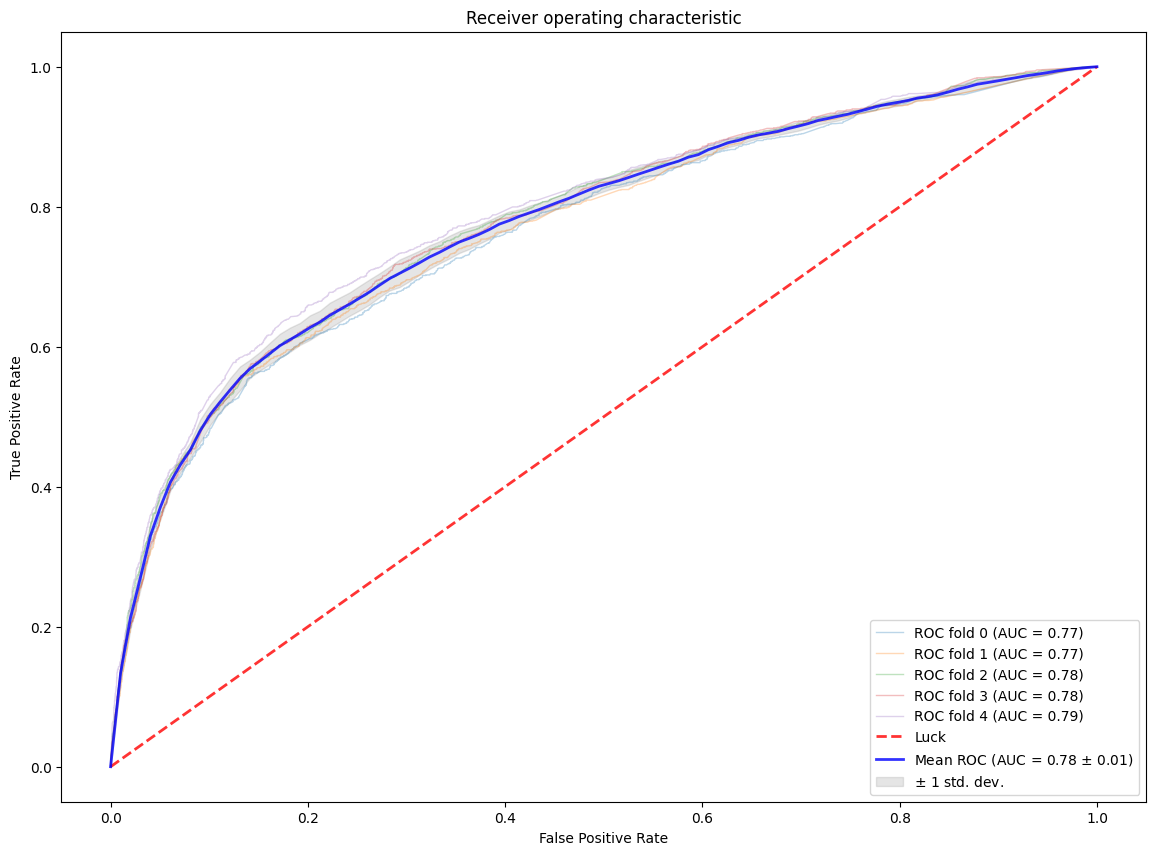

Accaracy list :  [0.8288915808600847, 0.8255602665051484, 0.8337371290127196, 0.8264688067837674, 0.8338885523924894]
equal opportunity for tpr :  [0.003633581946834996, 0.010137419908107848, 0.0011119347664937385, 0.0008551821955238847, 0.043223443223443236]
equal opportunity for fpr :  [0.001064231036038303, 0.001483726093575416, 0.0031098339719029394, 0.0004156651913431869, 0.00839899460589116]
odds difference list :  [0.0023489064914366496, 0.005810573000841632, 0.002110884369198339, 0.0006354236934335358, 0.0258112189146672]
The mean accuracy is  0.830 ± 0.004
The mean equal opportunity for tpr: (close to 0) 0.012 ± 0.016
The mean equal opportunity for fpr: (close to 0) 0.003 ± 0.003
The mean odds difference: (close to 0) 0.007 ± 0.009
The mean parity difference: (close to 0) 0.105 ± 0.052
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 114
---------------------------------------------------------------------------------------------------
Trial Number: 1

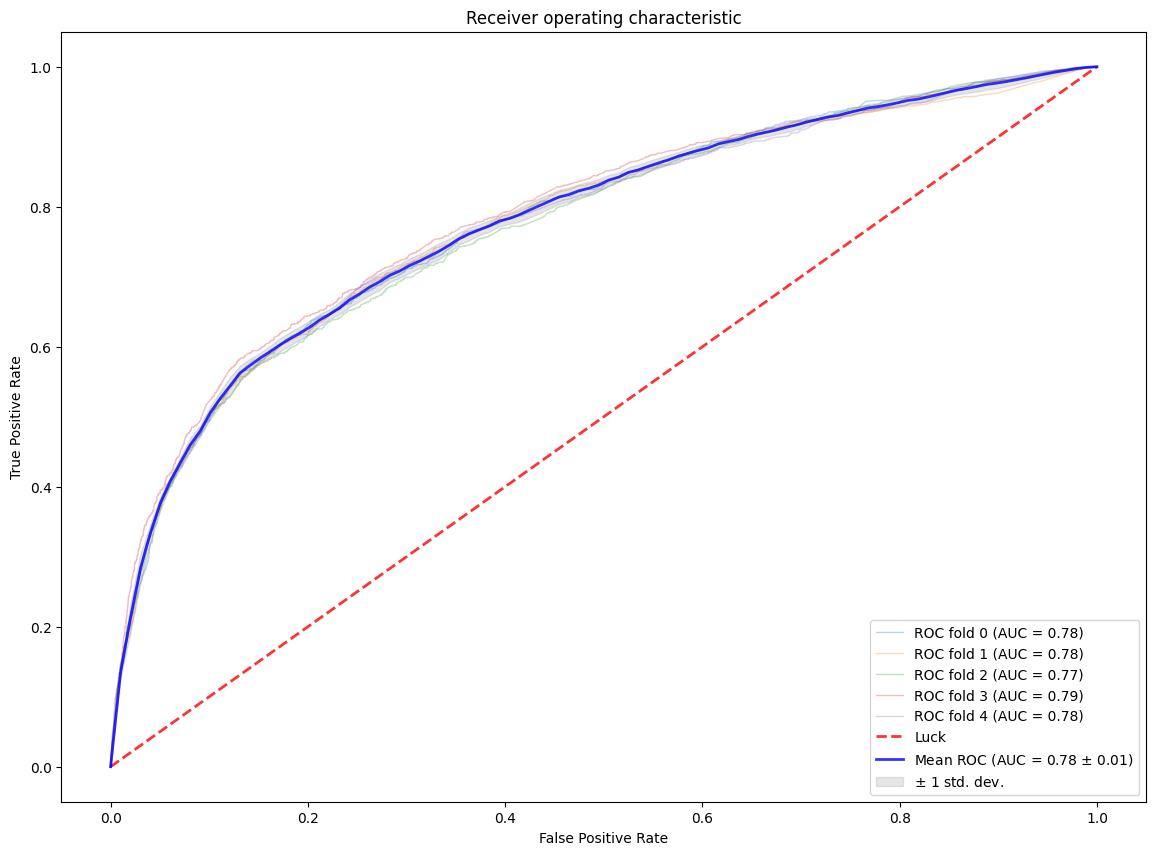

Accaracy list :  [0.8305662614882894, 0.8341239252890602, 0.8332097850259451, 0.841067457375834, 0.8314306893995552]
equal opportunity for tpr :  [0.026743911035795542, 0.005784024524263964, 0.009240190021143957, 0.01732837055417702, 0.02197973681145915]
equal opportunity for fpr :  [0.008015030987185468, 0.006693844227644952, 0.0002353909465020558, 0.006534577692476912, 0.004223302348284958]
odds difference list :  [0.017379471011490503, 0.006238934375954458, 0.004737790483823006, 0.011931474123326966, 0.013101519579872054]
The mean accuracy is  0.834 ± 0.004
The mean equal opportunity for tpr: (close to 0) 0.016 ± 0.008
The mean equal opportunity for fpr: (close to 0) 0.005 ± 0.003
The mean odds difference: (close to 0) 0.011 ± 0.005
The mean parity difference: (close to 0) 0.102 ± 0.049
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 121
---------------------------------------------------------------------------------------------------
Trial Number: 169
Va

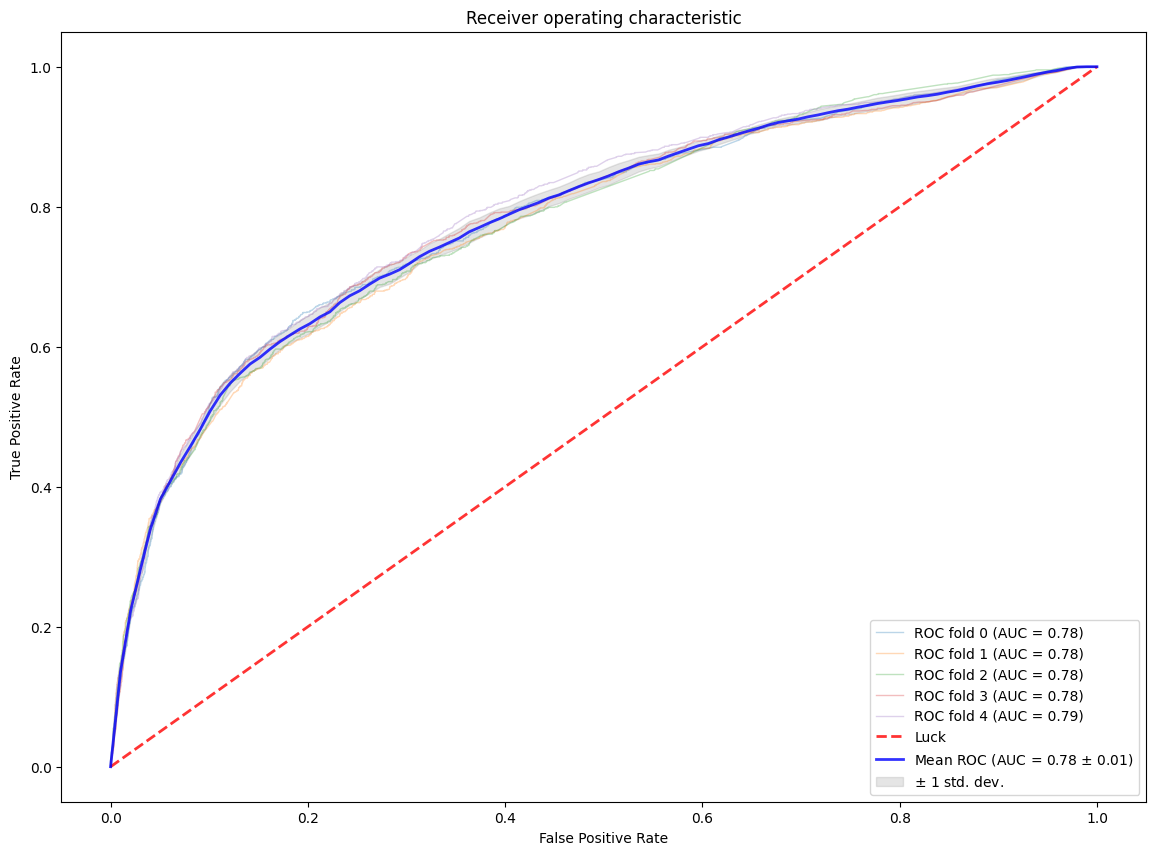

Accaracy list :  [0.8331166016471608, 0.8417858690940615, 0.8371622597890478, 0.8354284062996676, 0.832105187111689]
equal opportunity for tpr :  [0.003284524202723016, 0.006902731916509586, 0.002151459051250082, 0.011596286615923823, 0.02663533098315707]
equal opportunity for fpr :  [0.006885845754392071, 0.004355924256825829, 0.0012891245590839345, 0.004092920353982302, 0.0032837840327344693]
odds difference list :  [0.0050851849785575436, 0.005629328086667707, 0.0017202918051670082, 0.007844603484953062, 0.014959557507945769]
The mean accuracy is  0.836 ± 0.003
The mean equal opportunity for tpr: (close to 0) 0.010 ± 0.009
The mean equal opportunity for fpr: (close to 0) 0.004 ± 0.002
The mean odds difference: (close to 0) 0.007 ± 0.004
The mean parity difference: (close to 0) 0.115 ± 0.025
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 169
---------------------------------------------------------------------------------------------------
Trial Number: 56

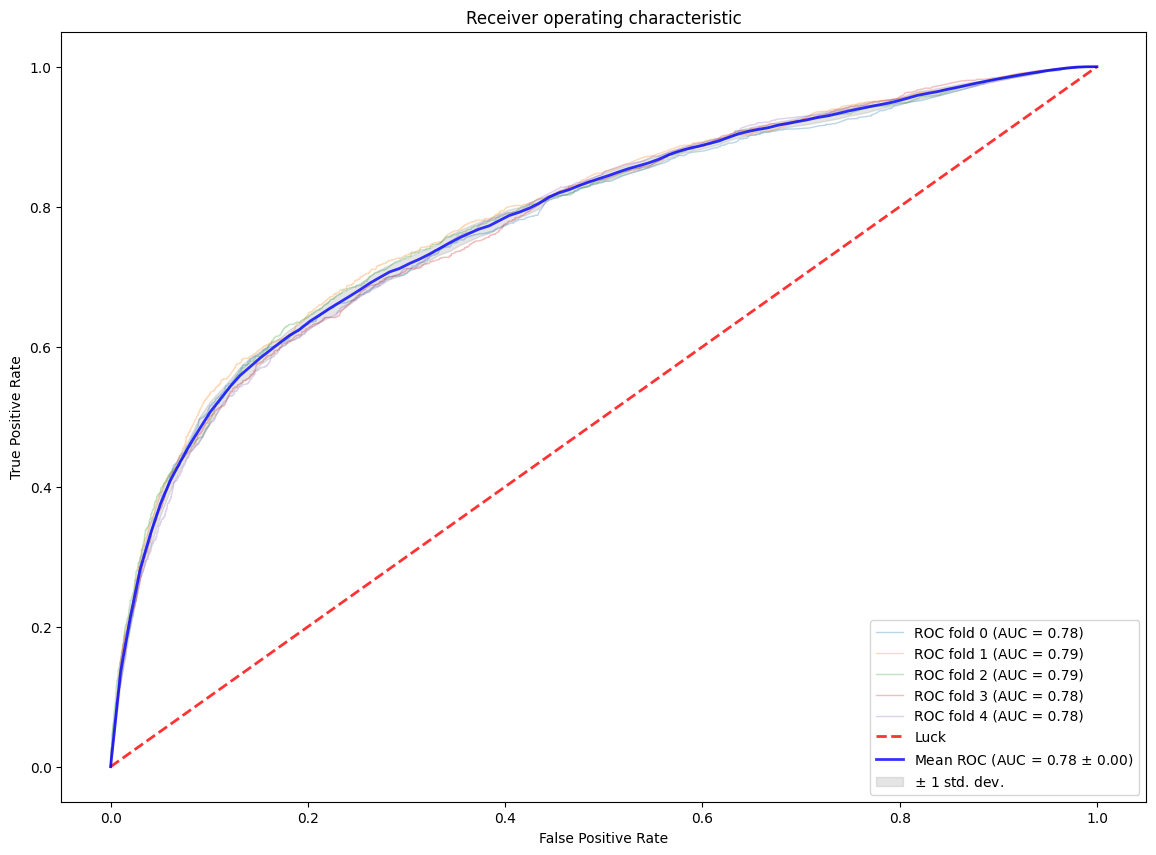

Accaracy list :  [0.8376873661670236, 0.8391149179157744, 0.8409707351891506, 0.8356887937187724, 0.8362364363221017]
equal opportunity for tpr :  [0.006199947746867662, 0.012911823027524638, 0.009317038756514462, 0.04239650764293096, 0.0002390514438707081]
equal opportunity for fpr :  [0.007203194433060629, 0.004427750206550726, 0.000709001478788749, 0.009045130508809764, 0.0019783081168180845]
odds difference list :  [0.006701571089964145, 0.008669786617037682, 0.0050130201176516054, 0.02572081907587036, 0.0011086797803443963]
The mean accuracy is  0.838 ± 0.002
The mean equal opportunity for tpr: (close to 0) 0.014 ± 0.015
The mean equal opportunity for fpr: (close to 0) 0.005 ± 0.003
The mean odds difference: (close to 0) 0.009 ± 0.009
The mean parity difference: (close to 0) 0.105 ± 0.020
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 56
---------------------------------------------------------------------------------------------------
Trial Number: 58


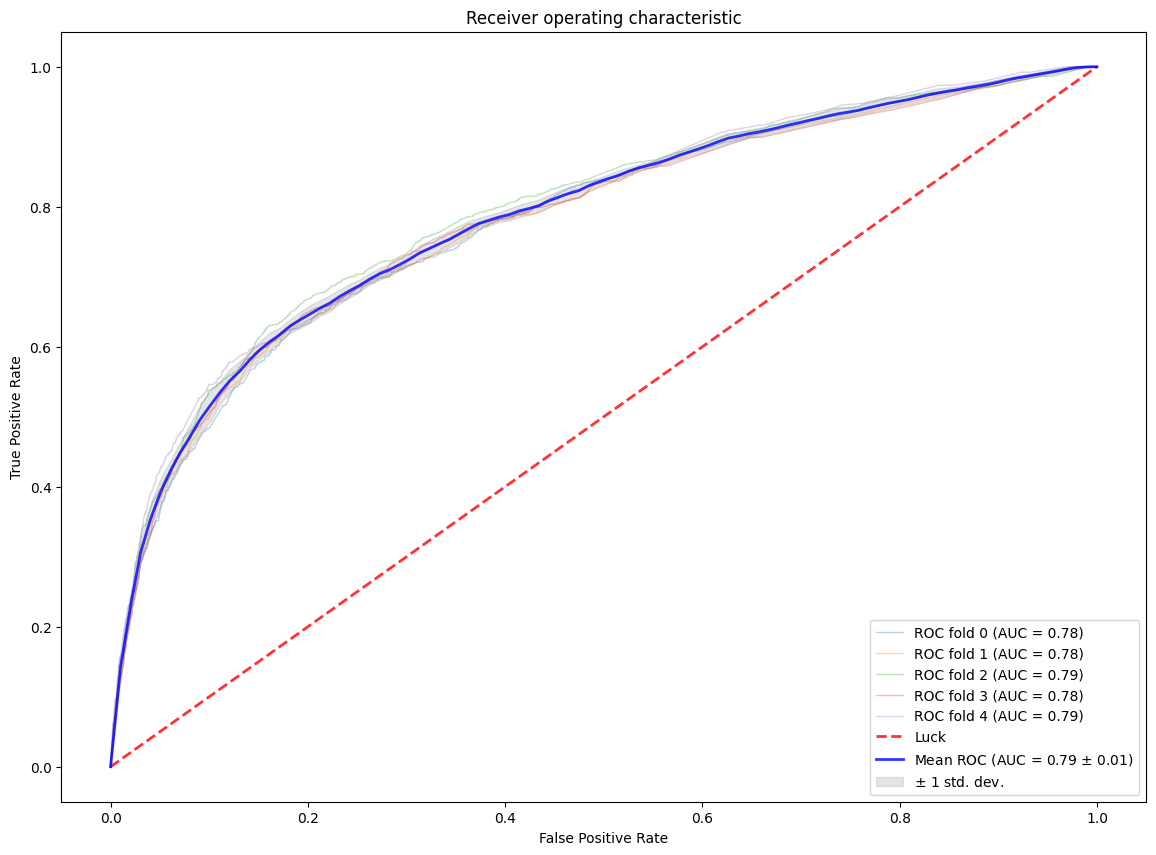

Accaracy list :  [0.8395707209686296, 0.8405338470005503, 0.8438359933957073, 0.8402586681342873, 0.8440897206550159]
equal opportunity for tpr :  [0.05083200839084001, 0.04620801552254783, 0.004782520618093811, 0.0003847183192827175, 0.01242119665316005]
equal opportunity for fpr :  [0.004247443548037515, 0.007300330365105787, 0.0022110610002107935, 0.018749835138060597, 0.00397414048143873]
odds difference list :  [0.027539725969438763, 0.026754172943826808, 0.003496790809152302, 0.009567276728671657, 0.00819766856729939]
The mean accuracy is  0.842 ± 0.002
The mean equal opportunity for tpr: (close to 0) 0.023 ± 0.021
The mean equal opportunity for fpr: (close to 0) 0.007 ± 0.006
The mean odds difference: (close to 0) 0.015 ± 0.010
The mean parity difference: (close to 0) 0.075 ± 0.043
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 58
---------------------------------------------------------------------------------------------------
Trial Number: 176
Valu

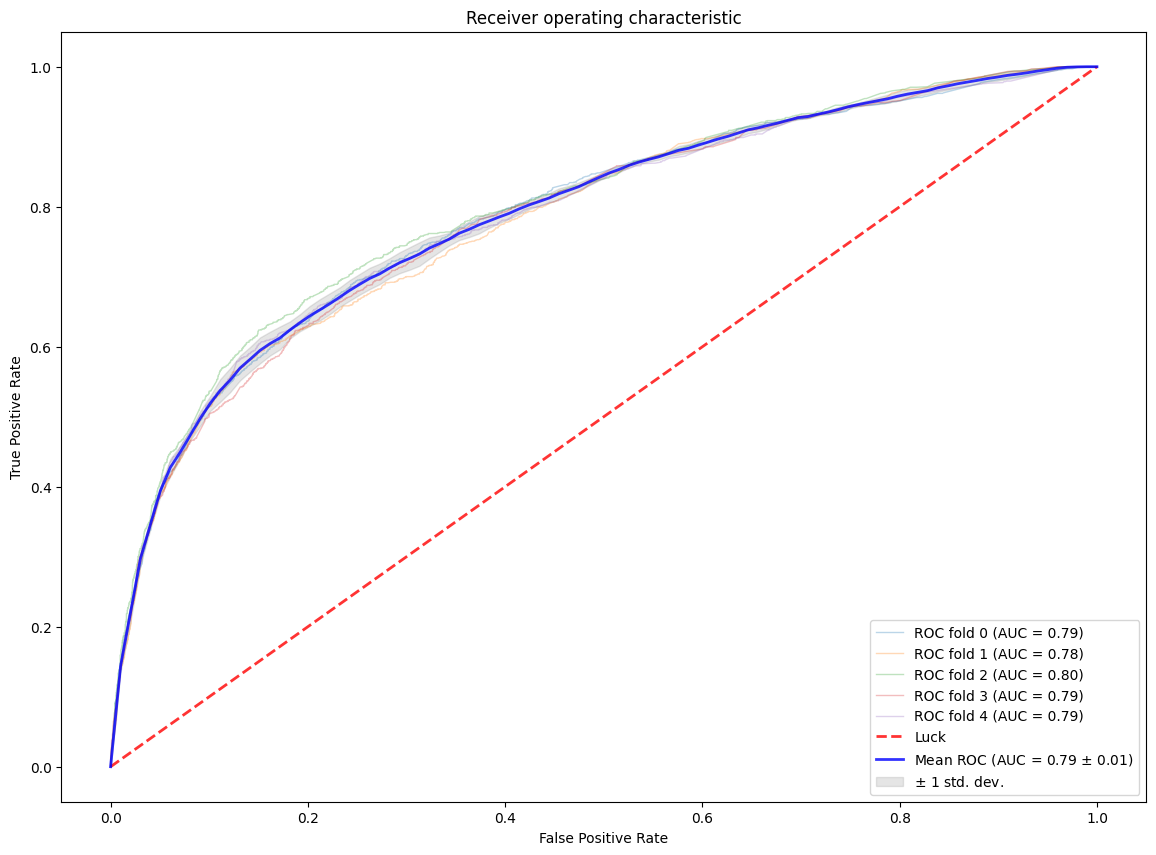

Accaracy list :  [0.8412093149938717, 0.8435244450497072, 0.8432520768078442, 0.8428435244450497, 0.8437968132915702]
equal opportunity for tpr :  [0.004372019077901412, 0.016373132673887125, 0.010458003456218695, 0.029033417175709675, 0.006696525633778316]
equal opportunity for fpr :  [0.006169134500305276, 0.003265859072133153, 0.008573822892851427, 0.003942343023363864, 0.01040714854820328]
odds difference list :  [0.005270576789103344, 0.00981949587301014, 0.00951591317453506, 0.01648788009953677, 0.008551837090990798]
The mean accuracy is  0.843 ± 0.001
The mean equal opportunity for tpr: (close to 0) 0.013 ± 0.009
The mean equal opportunity for fpr: (close to 0) 0.006 ± 0.003
The mean odds difference: (close to 0) 0.010 ± 0.004
The mean parity difference: (close to 0) 0.098 ± 0.033
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 176
---------------------------------------------------------------------------------------------------
Trial Number: 67
Value

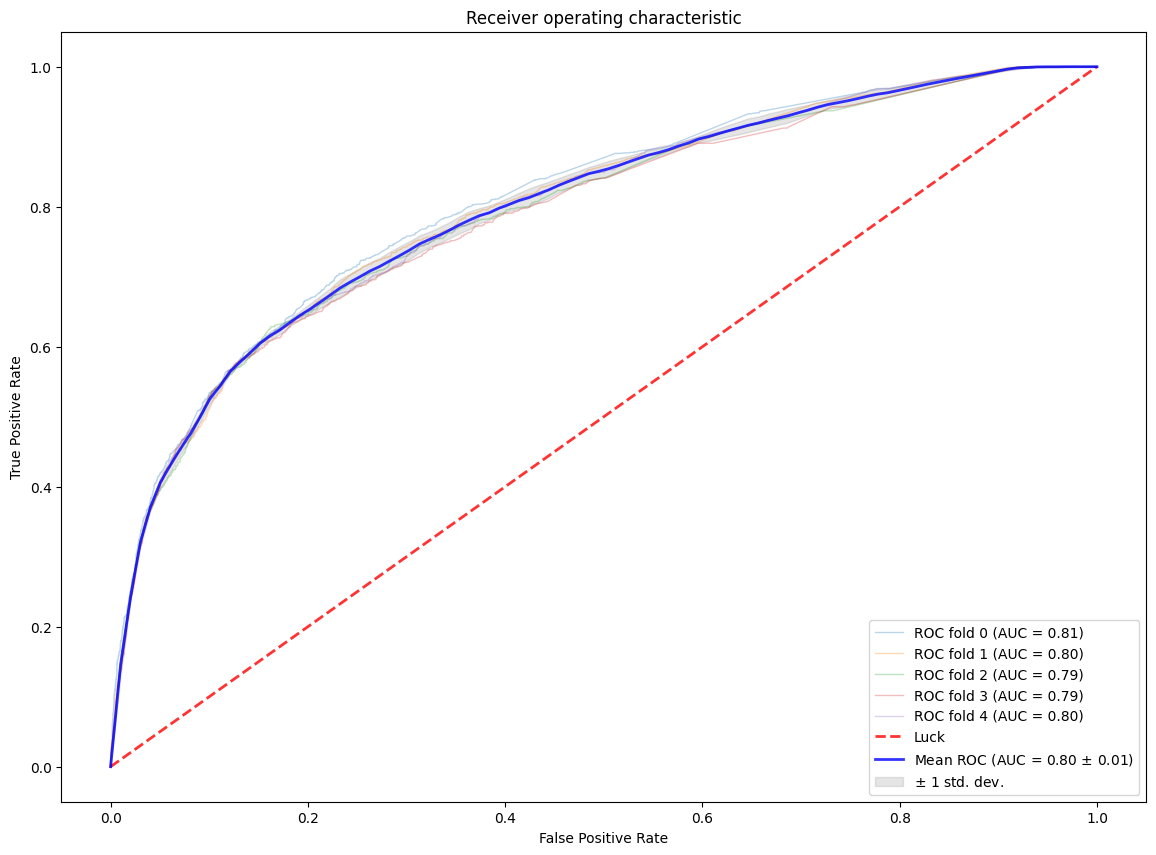

Accaracy list :  [0.8554320987654321, 0.8538271604938271, 0.8555555555555555, 0.8567901234567902, 0.8564020249413508]
equal opportunity for tpr :  [0.020571680598143405, 0.02646340742242606, 0.019011438943058512, 0.015310395514989916, 0.0267838544434289]
equal opportunity for fpr :  [0.004974469806053334, 0.006627277230000568, 0.009799697963573016, 0.018657829838032644, 0.020903617698655175]
odds difference list :  [0.01277307520209837, 0.016545342326213314, 0.014405568453315764, 0.01698411267651128, 0.023843736071042038]
The mean accuracy is  0.856 ± 0.001
The mean equal opportunity for tpr: (close to 0) 0.022 ± 0.004
The mean equal opportunity for fpr: (close to 0) 0.012 ± 0.006
The mean odds difference: (close to 0) 0.017 ± 0.004
The mean parity difference: (close to 0) 0.099 ± 0.072
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 67
---------------------------------------------------------------------------------------------------
Trial Number: 84
Values 

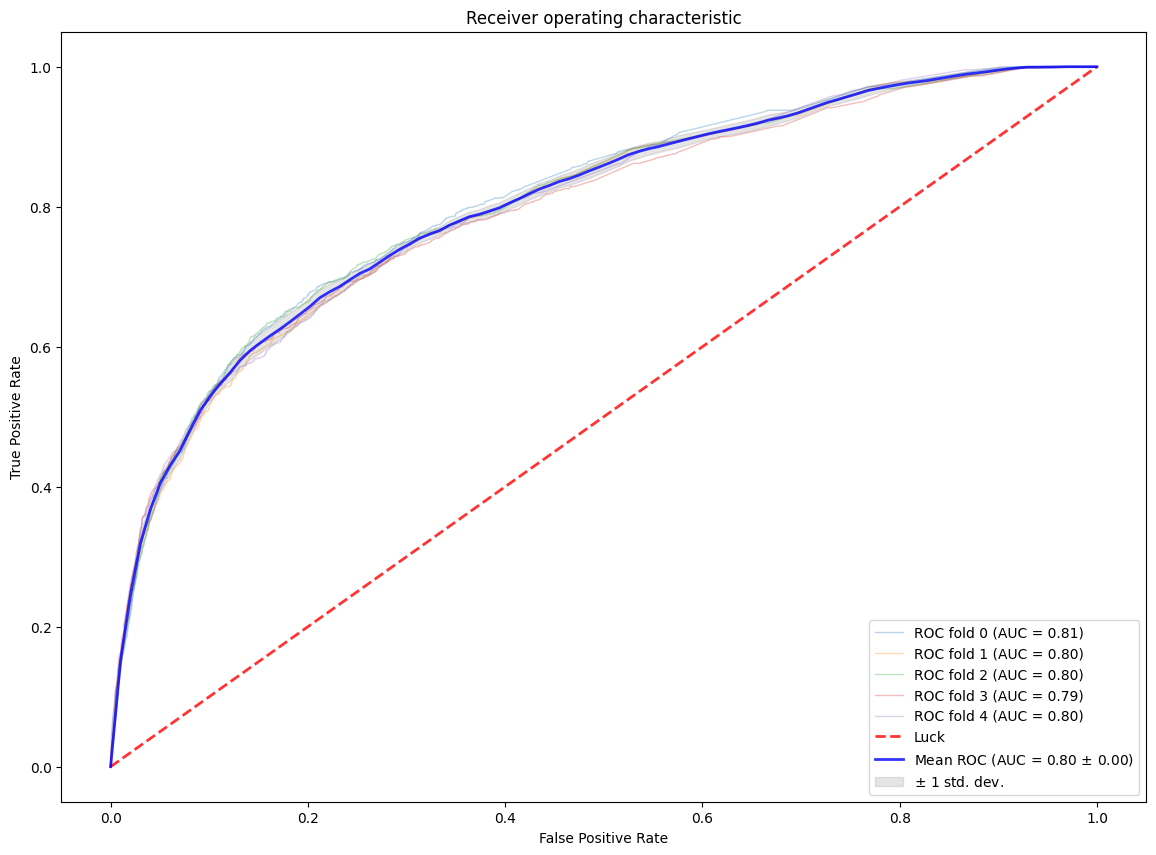

Accaracy list :  [0.8548367371896783, 0.8575097847358122, 0.8537181996086106, 0.8584882583170255, 0.8586105675146771]
equal opportunity for tpr :  [0.0007790657493795816, 0.03107555480798546, 0.01645493858902275, 0.005226418471451555, 0.023178260390254668]
equal opportunity for fpr :  [0.01750765543868992, 0.01754190403254786, 0.008286377107591215, 0.015559847113830103, 0.009970312844677975]
odds difference list :  [0.009143360594034752, 0.024308729420266663, 0.012370657848306982, 0.010393132792640829, 0.01657428661746632]
The mean accuracy is  0.857 ± 0.002
The mean equal opportunity for tpr: (close to 0) 0.015 ± 0.011
The mean equal opportunity for fpr: (close to 0) 0.014 ± 0.004
The mean odds difference: (close to 0) 0.015 ± 0.005
The mean parity difference: (close to 0) 0.116 ± 0.038
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 84
---------------------------------------------------------------------------------------------------
Trial Number: 24
Values

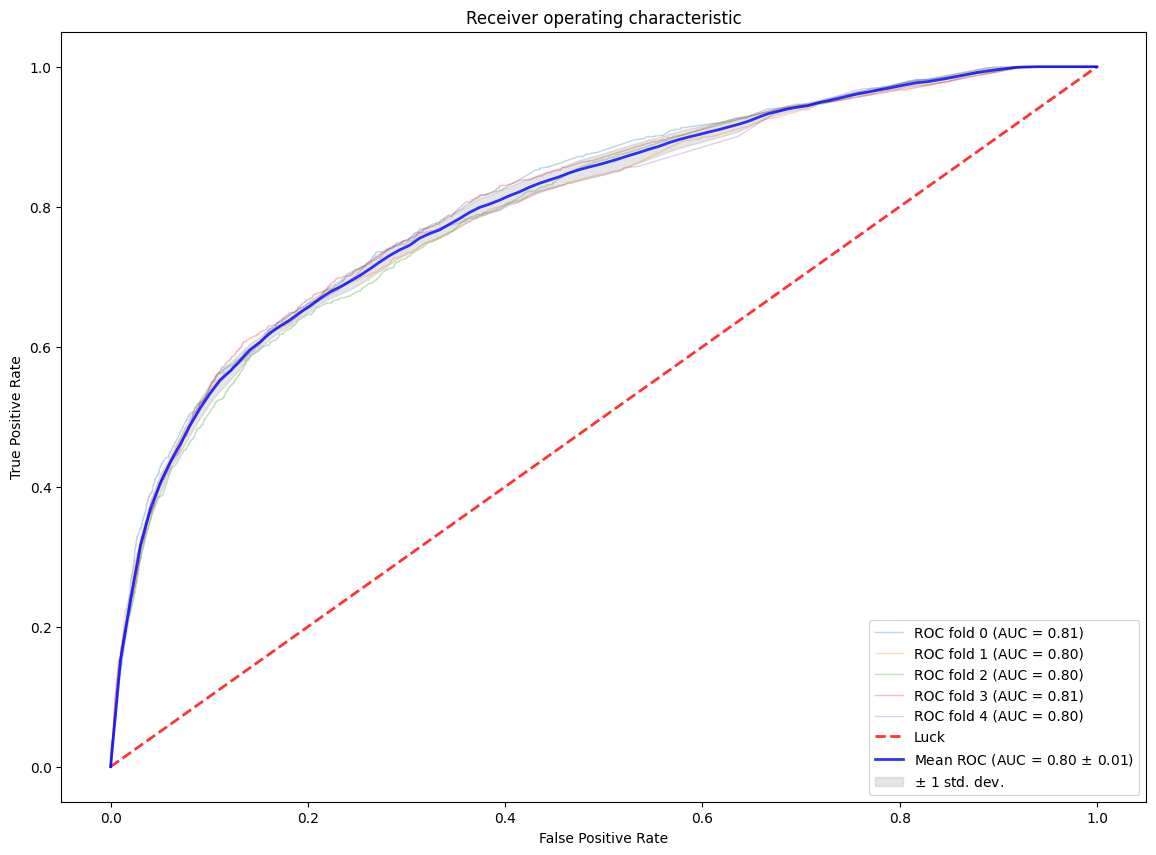

Accaracy list :  [0.8578257139355313, 0.8608898149283001, 0.8545164848633411, 0.8551293050618949, 0.8567050747732288]
equal opportunity for tpr :  [0.003001672422406121, 0.002824895530937177, 0.002035337290691497, 0.010850076464694436, 0.034642635582982306]
equal opportunity for fpr :  [0.011550508726115558, 0.01088079788512377, 0.009054443389168627, 0.014964860001747633, 0.01733238048307522]
odds difference list :  [0.007276090574260839, 0.006852846708030474, 0.005544890339930062, 0.012907468233221035, 0.025987508033028763]
The mean accuracy is  0.857 ± 0.002
The mean equal opportunity for tpr: (close to 0) 0.011 ± 0.012
The mean equal opportunity for fpr: (close to 0) 0.013 ± 0.003
The mean odds difference: (close to 0) 0.012 ± 0.008
The mean parity difference: (close to 0) 0.122 ± 0.040
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 24
---------------------------------------------------------------------------------------------------
Trial Number: 99
Valu

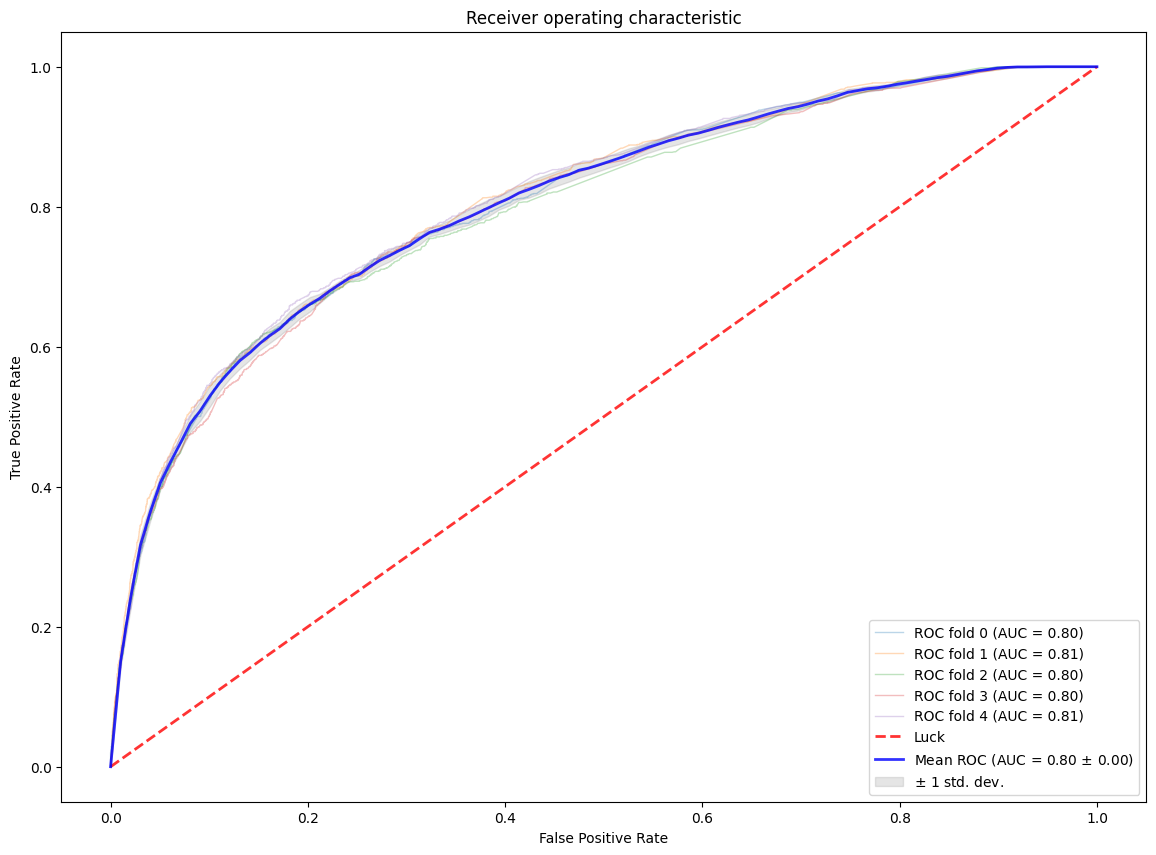

Accaracy list :  [0.8587076923076923, 0.8619076923076923, 0.8566153846153847, 0.8577230769230769, 0.8556129985228951]
equal opportunity for tpr :  [0.005819560000897062, 0.04684971373396979, 0.036640140825900336, 0.019395777985208584, 0.006883554533403585]
equal opportunity for fpr :  [0.013958983848890737, 0.008649792788836989, 0.014555855811461193, 0.014155090776400377, 0.011156915613479791]
odds difference list :  [0.0098892719248939, 0.027749753261403387, 0.025597998318680766, 0.01677543438080448, 0.009020235073441688]
The mean accuracy is  0.858 ± 0.002
The mean equal opportunity for tpr: (close to 0) 0.023 ± 0.016
The mean equal opportunity for fpr: (close to 0) 0.012 ± 0.002
The mean odds difference: (close to 0) 0.018 ± 0.008
The mean parity difference: (close to 0) 0.136 ± 0.027
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 99
---------------------------------------------------------------------------------------------------
Trial Number: 106
Value

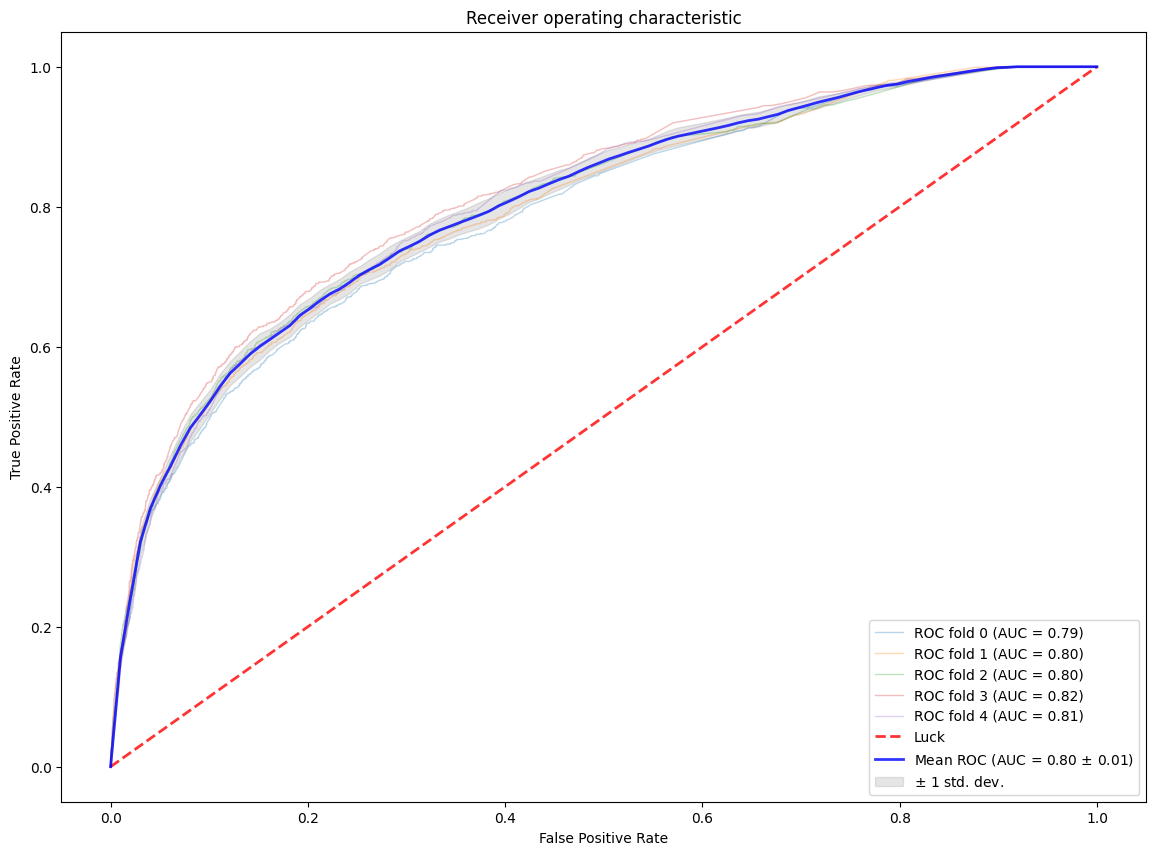

Accaracy list :  [0.8598986026956844, 0.8596512921973538, 0.8574078654464506, 0.8609943111550828, 0.8556764778629731]
equal opportunity for tpr :  [0.06221813834735643, 0.007915885036707648, 0.012519298882935237, 0.019903745115610494, 0.012638693455744948]
equal opportunity for fpr :  [0.0206275830267579, 0.011102108089475071, 0.01130685897280772, 0.010158636255143435, 0.009895432082526918]
odds difference list :  [0.04142286068705717, 0.00950899656309136, 0.011913078927871478, 0.015031190685376963, 0.011267062769135933]
The mean accuracy is  0.859 ± 0.002
The mean equal opportunity for tpr: (close to 0) 0.023 ± 0.020
The mean equal opportunity for fpr: (close to 0) 0.013 ± 0.004
The mean odds difference: (close to 0) 0.018 ± 0.012
The mean parity difference: (close to 0) 0.148 ± 0.059
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 106
---------------------------------------------------------------------------------------------------
Trial Number: 41
Values 

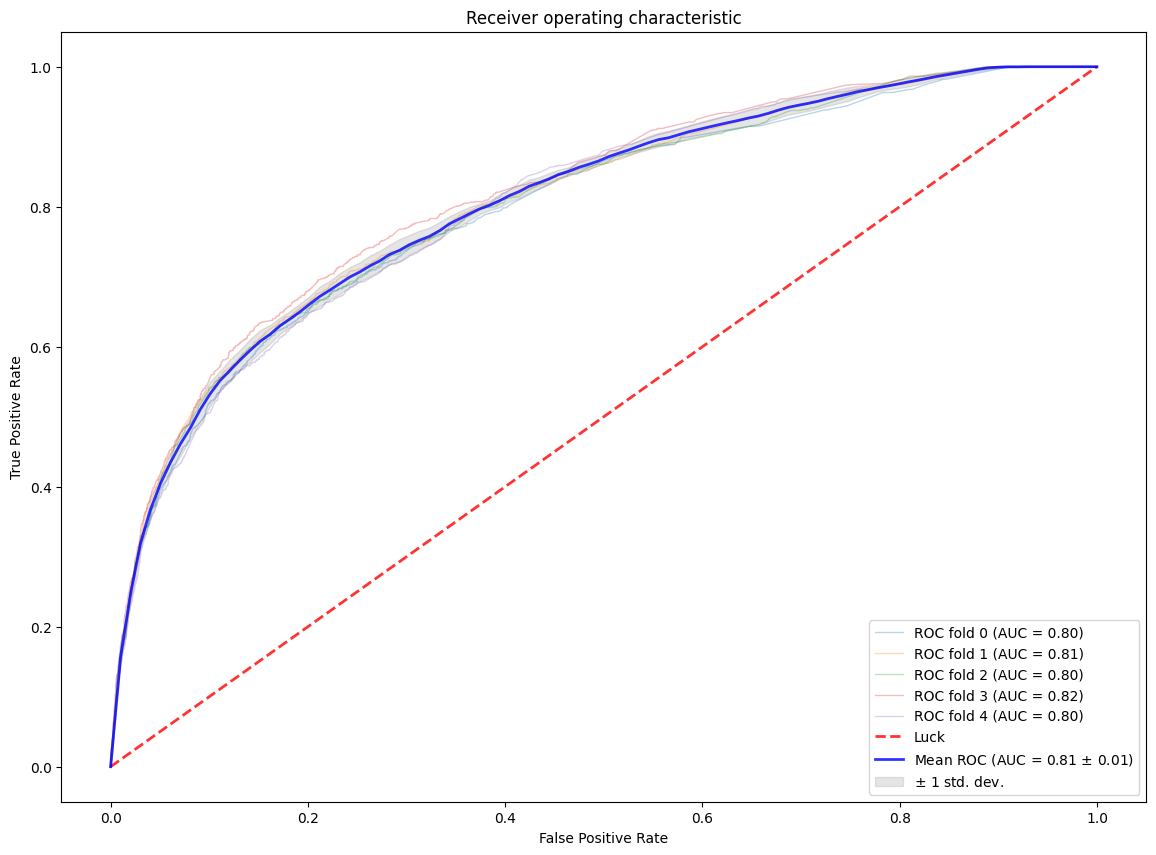

Accaracy list :  [0.8603386478803609, 0.8579903596588803, 0.8597206772957607, 0.8620519159456118, 0.857601977750309]
equal opportunity for tpr :  [0.005777886181855013, 0.0267119387854296, 0.031230569799589297, 0.010268912529550811, 0.022420857995038262]
equal opportunity for fpr :  [0.013608374384236453, 0.009065222520485198, 0.005892165592113027, 0.019573443168729415, 0.013623846024488788]
odds difference list :  [0.009693130283045734, 0.017888580652957398, 0.018561367695851164, 0.014921177849140113, 0.018022352009763525]
The mean accuracy is  0.860 ± 0.002
The mean equal opportunity for tpr: (close to 0) 0.019 ± 0.010
The mean equal opportunity for fpr: (close to 0) 0.012 ± 0.005
The mean odds difference: (close to 0) 0.016 ± 0.003
The mean parity difference: (close to 0) 0.139 ± 0.023
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 41
---------------------------------------------------------------------------------------------------
Trial Number: 109
Valu

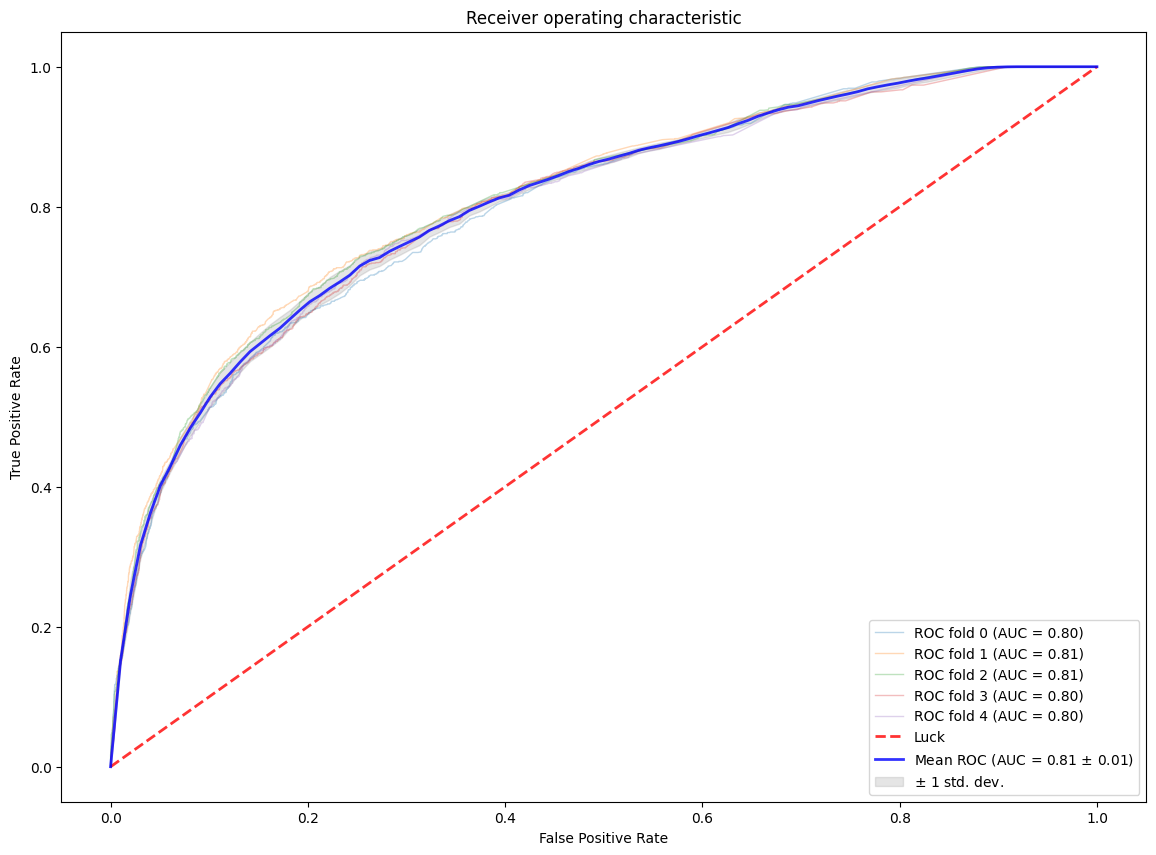

Accaracy list :  [0.8571780046746217, 0.8657891499569442, 0.8593922991757904, 0.8577755905511811, 0.8580216535433071]
equal opportunity for tpr :  [0.0045321077492659345, 0.05763295673739324, 0.06344248561229693, 0.04023831389265822, 9.201409655990034e-06]
equal opportunity for fpr :  [0.010733806566104703, 0.011561160637484956, 0.012262728515556147, 0.01265047709347053, 0.01895378808252368]
odds difference list :  [0.007632957157685319, 0.0345970586874391, 0.03785260706392654, 0.026444395493064377, 0.009481494746089836]
The mean accuracy is  0.860 ± 0.003
The mean equal opportunity for tpr: (close to 0) 0.033 ± 0.026
The mean equal opportunity for fpr: (close to 0) 0.013 ± 0.003
The mean odds difference: (close to 0) 0.023 ± 0.013
The mean parity difference: (close to 0) 0.152 ± 0.067
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 109
---------------------------------------------------------------------------------------------------
Trial Number: 94
Values 

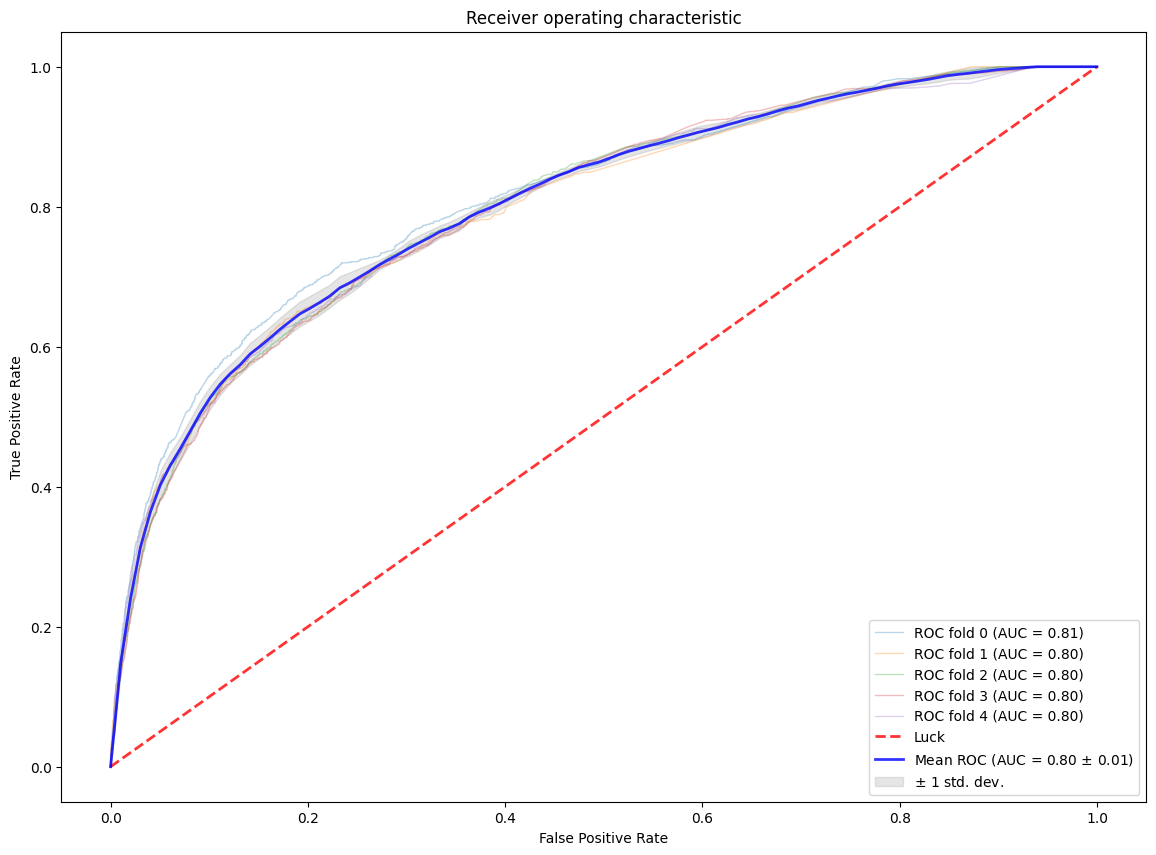

Accaracy list :  [0.8613326788563014, 0.8600883652430045, 0.8549337260677466, 0.854074619538537, 0.8597201767304861]
equal opportunity for tpr :  [0.02920216542421017, 0.04213161901539503, 0.0001564931232450606, 0.00958188153310105, 0.03521921341070278]
equal opportunity for fpr :  [0.012271407066324272, 0.017585955482813956, 0.007545059779762813, 0.02114179766789979, 0.010476290516766103]
odds difference list :  [0.02073678624526722, 0.02985878724910449, 0.003850776451503937, 0.01536183960050042, 0.02284775196373444]
The mean accuracy is  0.858 ± 0.003
The mean equal opportunity for tpr: (close to 0) 0.023 ± 0.016
The mean equal opportunity for fpr: (close to 0) 0.014 ± 0.005
The mean odds difference: (close to 0) 0.019 ± 0.009
The mean parity difference: (close to 0) 0.156 ± 0.043
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 94
---------------------------------------------------------------------------------------------------


In [33]:
# Record the end time
end_time = time.time()
# Calculate the elapsed time in minutes
elapsed_time_minutes = (end_time - start_time) / 60

pareto_front_trials = study.best_trials
pareto_front_trials = sorted(pareto_front_trials, key=lambda trial: trial.values[0])


trail_list = []
fairness_values_list = []

acc_values_list = []
growth_list = []

# Process each trial in the Pareto front
for trial in pareto_front_trials:
   trail_list.append(trial.number)
   fairness_values_list.append(trial.values[0])
   acc_values_list.append(trial.values[1])

   lambda1 = trial.params['lambda_0']
   lambda2 = trial.params['lambda_1']
   upsampled_df = Upsampling_Dataset(lambda1,lambda2)
   growth_list.append((len(upsampled_df) - len(orig_data))/ len(orig_data) * 100 )

   print("Trial Number:", trial.number)
   print("Values (Objectives):", trial.values)
   print("Parameters:", trial.params)
   print("Dataset Growth Percent :", (len(upsampled_df) - len(orig_data))/ len(orig_data) * 100)
   print('---------------------------------------------------------------------------------------------------')
   y_debias = upsampled_df[TARGET_COL]
   upsampled_df_features = upsampled_df.loc[:, feature_columns]
   upsampled_acc ,upsampled_op_diff, upsampled_op_diff_fpr, upsampled_od_diff, upsampled_par_diff , upsampled_dis_impact  = fairness_metrics_roc_auc_std(upsampled_df_features, y_debias )

   print("End Of Trial Number:", trial.number)
   print('---------------------------------------------------------------------------------------------------')



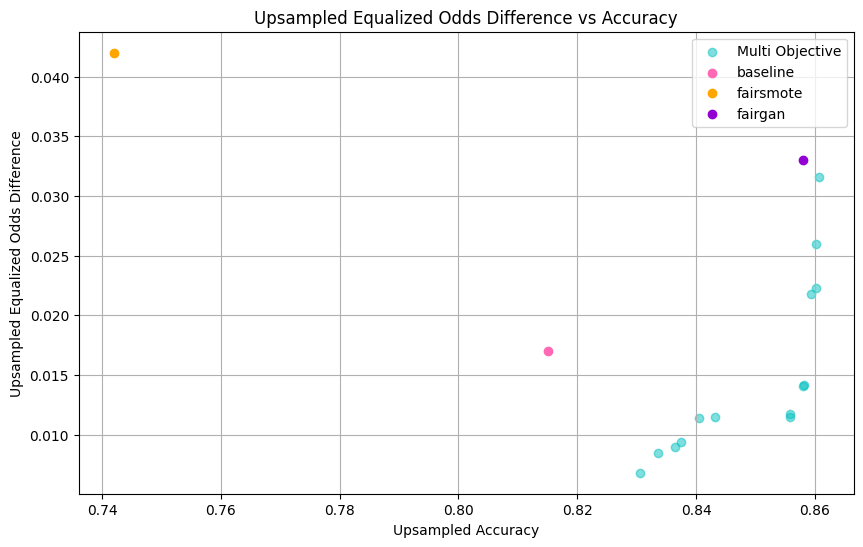

In [34]:
import matplotlib.pyplot as plt

# Plot upsampled_op_diff against upsampled_acc
plt.figure(figsize=(10, 6))
plt.scatter(acc_values_list,fairness_values_list, alpha=0.5,color = 'c', label = 'Multi Objective')

# Add the three additional points
plt.scatter(0.815, 0.017, color='hotpink', label='baseline')  # Baseline point
plt.scatter(0.742, 0.042, color='orange', label='fairsmote')  # Fairsmote point
plt.scatter(0.858, 0.033, color='darkviolet', label='fairgan')  # Fairgan point

plt.xlabel('Upsampled Accuracy')
plt.ylabel('Upsampled Equalized Odds Difference')
plt.title('Upsampled Equalized Odds Difference vs Accuracy')
plt.grid(True)
plt.legend()  # Show legend with labels
plt.show()

conf matrix:
  [[4508  164]
 [ 918  410]] 
accuracy:  0.8196666666666667 precision:  0.7142857142857143 recall:  0.30873493975903615 fpr:  0.0351027397260274 tpr:  0.30873493975903615 fn+fp 1082
conf matrix:
  [[2791   98]
 [ 510  241]] 
accuracy:  0.832967032967033 precision:  0.7109144542772862 recall:  0.3209054593874834 fpr:  0.033921772239529246 tpr:  0.3209054593874834 fn+fp 608
conf matrix:
  [[1717   66]
 [ 408  169]] 
accuracy:  0.7991525423728814 precision:  0.7191489361702128 recall:  0.292894280762565 fpr:  0.03701626472237801 tpr:  0.292894280762565 fn+fp 474
conf matrix:
  [[4482  191]
 [ 923  404]] 
accuracy:  0.8143333333333334 precision:  0.6789915966386555 recall:  0.3044461190655614 fpr:  0.04087310079178258 tpr:  0.3044461190655614 fn+fp 1114
conf matrix:
  [[1716   89]
 [ 386  174]] 
accuracy:  0.7991543340380549 precision:  0.6615969581749049 recall:  0.3107142857142857 fpr:  0.049307479224376734 tpr:  0.3107142857142857 fn+fp 475
conf matrix:
  [[2766  102]
 [ 53

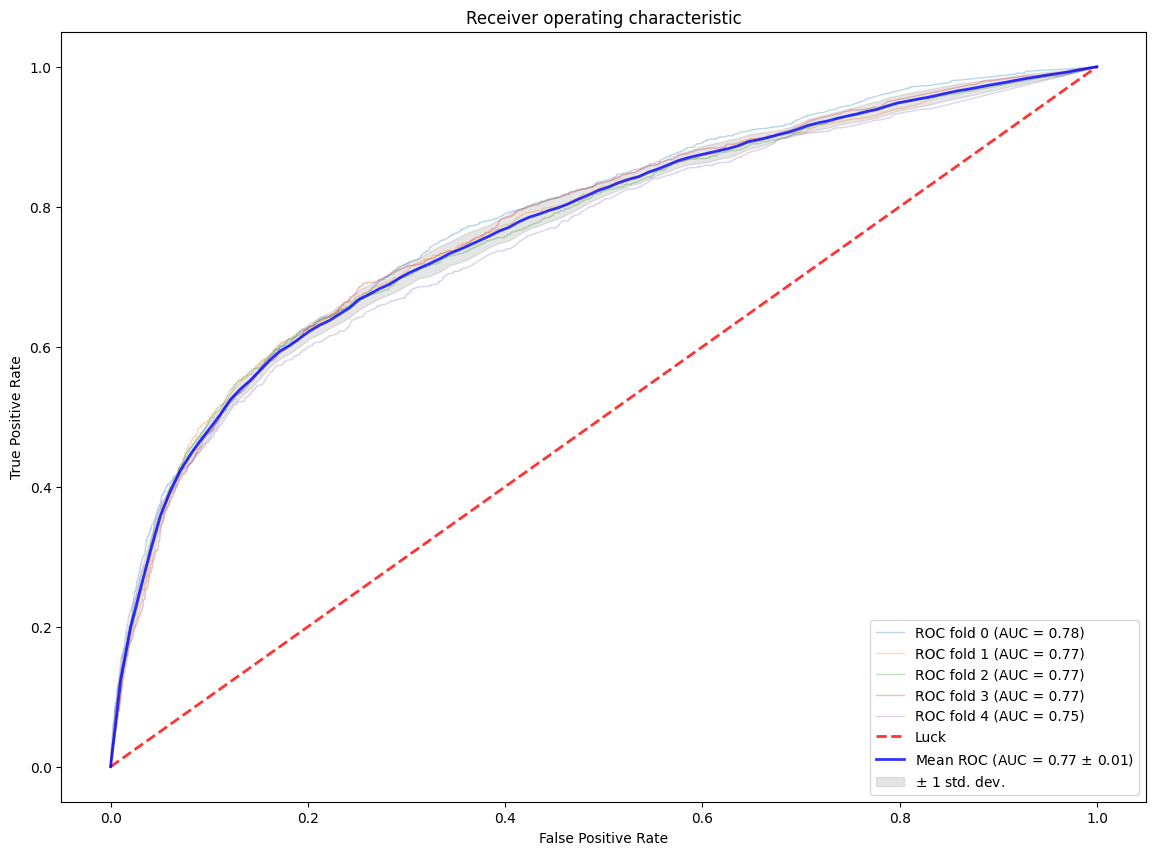

Accaracy list :  [0.8196666666666667, 0.8143333333333334, 0.813, 0.8103333333333333, 0.8176666666666667]
equal opportunity for tpr :  [0.028011178624918365, 0.010844663810765487, 0.045343154126798346, 0.032509783144177073, 0.0025901942645698006]
equal opportunity for fpr :  [0.003094492482848765, 0.013742625667891376, 0.011347021339599202, 0.011929758316816773, 0.009701962152741703]
odds difference list :  [0.015552835553883565, 0.012293644739328431, 0.028345087733198774, 0.022219770730496923, 0.006146078208655752]
The mean accuracy is  0.815 ± 0.003
The mean equal opportunity for tpr: (close to 0) 0.024 ± 0.015
The mean equal opportunity for fpr: (close to 0) 0.010 ± 0.004
The mean odds difference: (close to 0) 0.017 ± 0.008
The mean parity difference: (close to 0) 0.110 ± 0.049
The mean disperate impact: (close to 1) 1.000 ± 0.000


In [35]:
orig_acc ,orig_op_diff, orig_op_diff_fpr, orig_od_diff, orig_par_diff , orig_dis_impact  = fairness_metrics_roc_auc(orig_data_encoded, y_orig )

In [36]:
print('Running time is: ',elapsed_time_minutes)

Running time is:  17.210875801245372
